# 2 EDA

## 2.1 Frecuencias y estructura general
	•	Histogramas Scatterplots y boxplots de todas las variables numéricas.
	•	Heatmap de correlaciones entre todas las numéricas.
	•	Tablas de frecuencias y gráficos de barras para variables categóricas.

## 2.2 Relaciones de variables meta con variable numéricas

	•	Histogramas, scatterplots y boxplots de variables meta (Views, Target Engagement y Mostpopular) con resto de variables.
	•	Heatmap de correlaciones entre variables meta y variables numéricas relevantes

## 2.3 Relaciones de variables meta con variables categóricas
	•	Test Chi-Square de variables meta (Views, Target Engagement y Mostpopular) con variables categóricas 
	•	Barras o boxplots para las categorías significativas.
    
 ## 2.3 Conclusiones EDA
	•	Tabla resumen de: 
    •	Variables altamente correlacionadas 
    •	Variables sin varianza o redundantes.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, StandardScaler, Normalizer
from sentence_transformers import SentenceTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import time
import pickle
import joblib, json, os
from sklearn.base import BaseEstimator, TransformerMixin
import seaborn as sns

/opt/anaconda3/envs/yt-ml-spvd/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
df=pd.read_parquet('df_TFMYouTube_embeddings_UMAP5_CLUSTERS_UMAP2.parquet')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17825 entries, 0 to 17824
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   video_id                 17825 non-null  object 
 1   title                    17825 non-null  object 
 2   description              14298 non-null  object 
 3   duration_minutes         17825 non-null  float64
 4   definition               17825 non-null  int64  
 5   licensed_content         17825 non-null  Int64  
 6   has_caption              17825 non-null  Int64  
 7   category_id              17825 non-null  float64
 8   views                    17825 non-null  int64  
 9   likes                    17825 non-null  int64  
 10  comments                 17825 non-null  int64  
 11  tags                     9952 non-null   object 
 12  tags_count               17825 non-null  int64  
 13  views_per_day            17825 non-null  int64  
 14  video_age_days        

In [4]:
num_cols = [
    'duration_minutes', 'views', 'likes', 'comments', 'tags_count',
    'subscriber_count', 'channel_video_count',
    'channel_views', 'channel_age_days', 'engagement_rate', 'efficiency',
    'engagement_subscribers', 'frecuencia_videos', 'views_rate_video',
    'likes_per_view', 'comments_per_view'
]

### 2.1.1.1 Histograma escala lineal

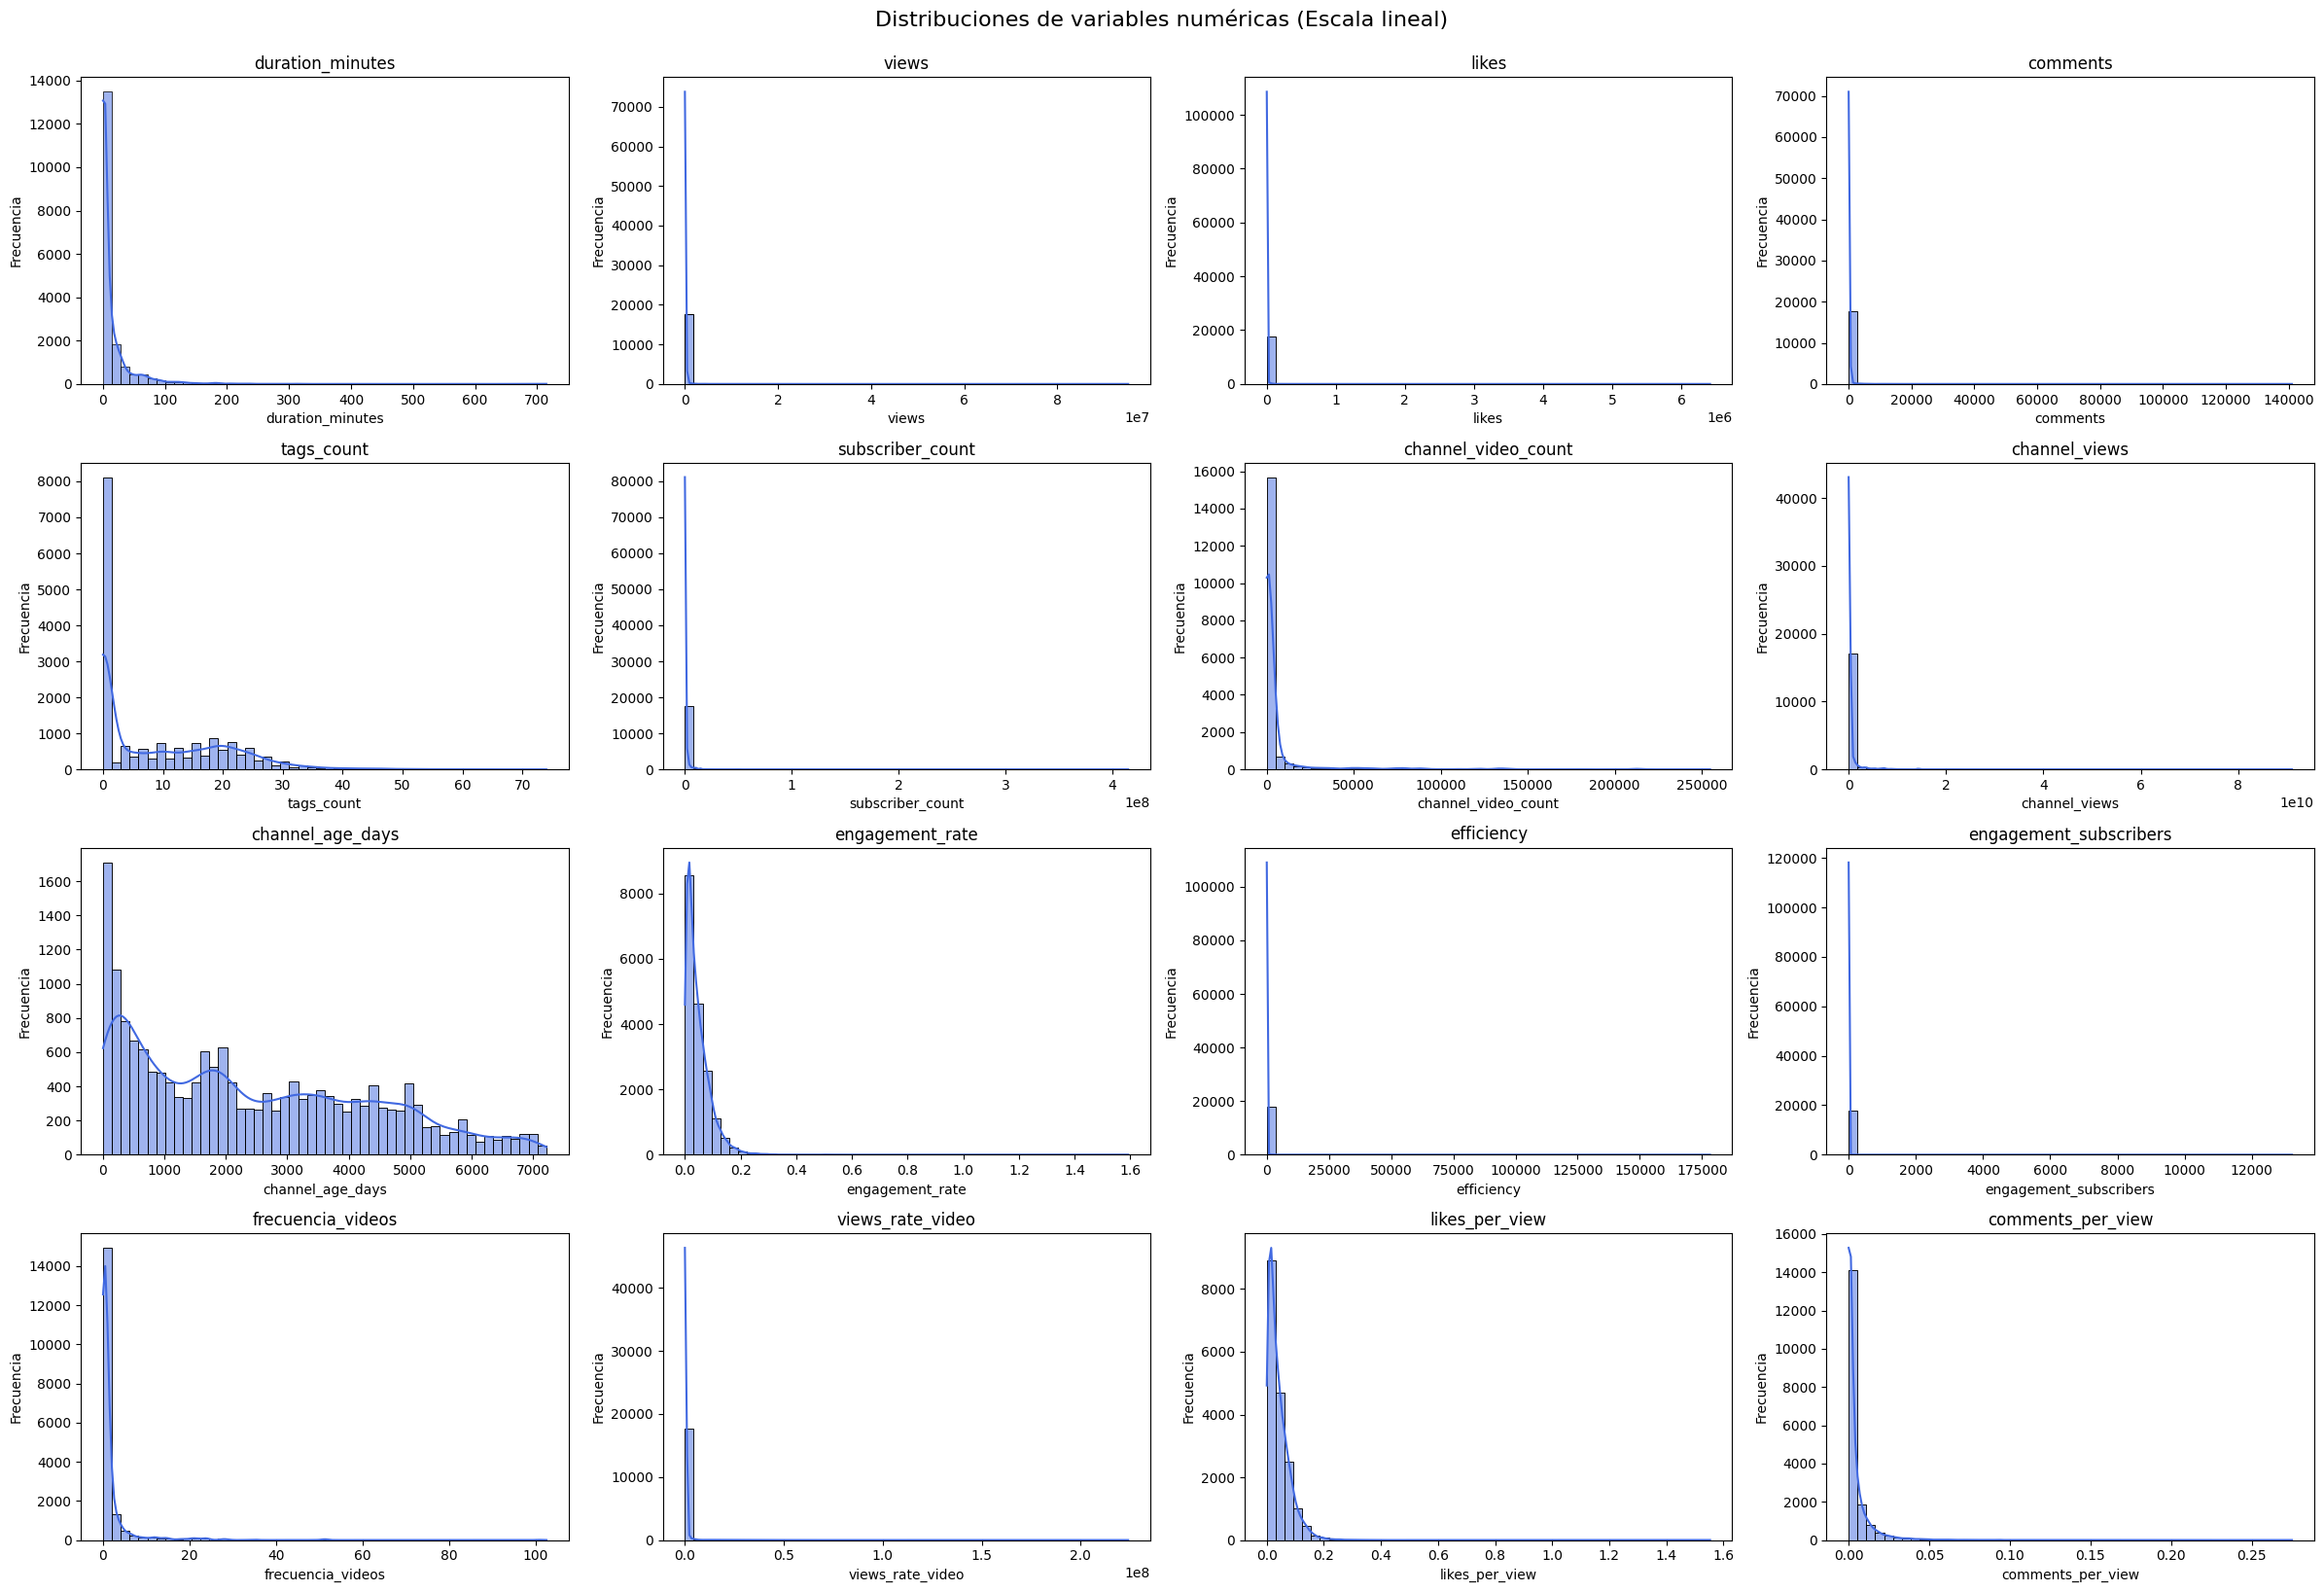

In [5]:
n_cols = 4
n_rows = int(np.ceil(len(num_cols) / n_cols))

# --- Escala lineal ---
plt.figure(figsize=(n_cols*6, n_rows*4))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col].dropna(), bins=50, kde=True, color="royalblue")
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
plt.suptitle("Distribuciones de variables numéricas (Escala lineal)", fontsize=16, y=1.02)
plt.show()

### 2.1.1.2 Histograma escala logarítimica

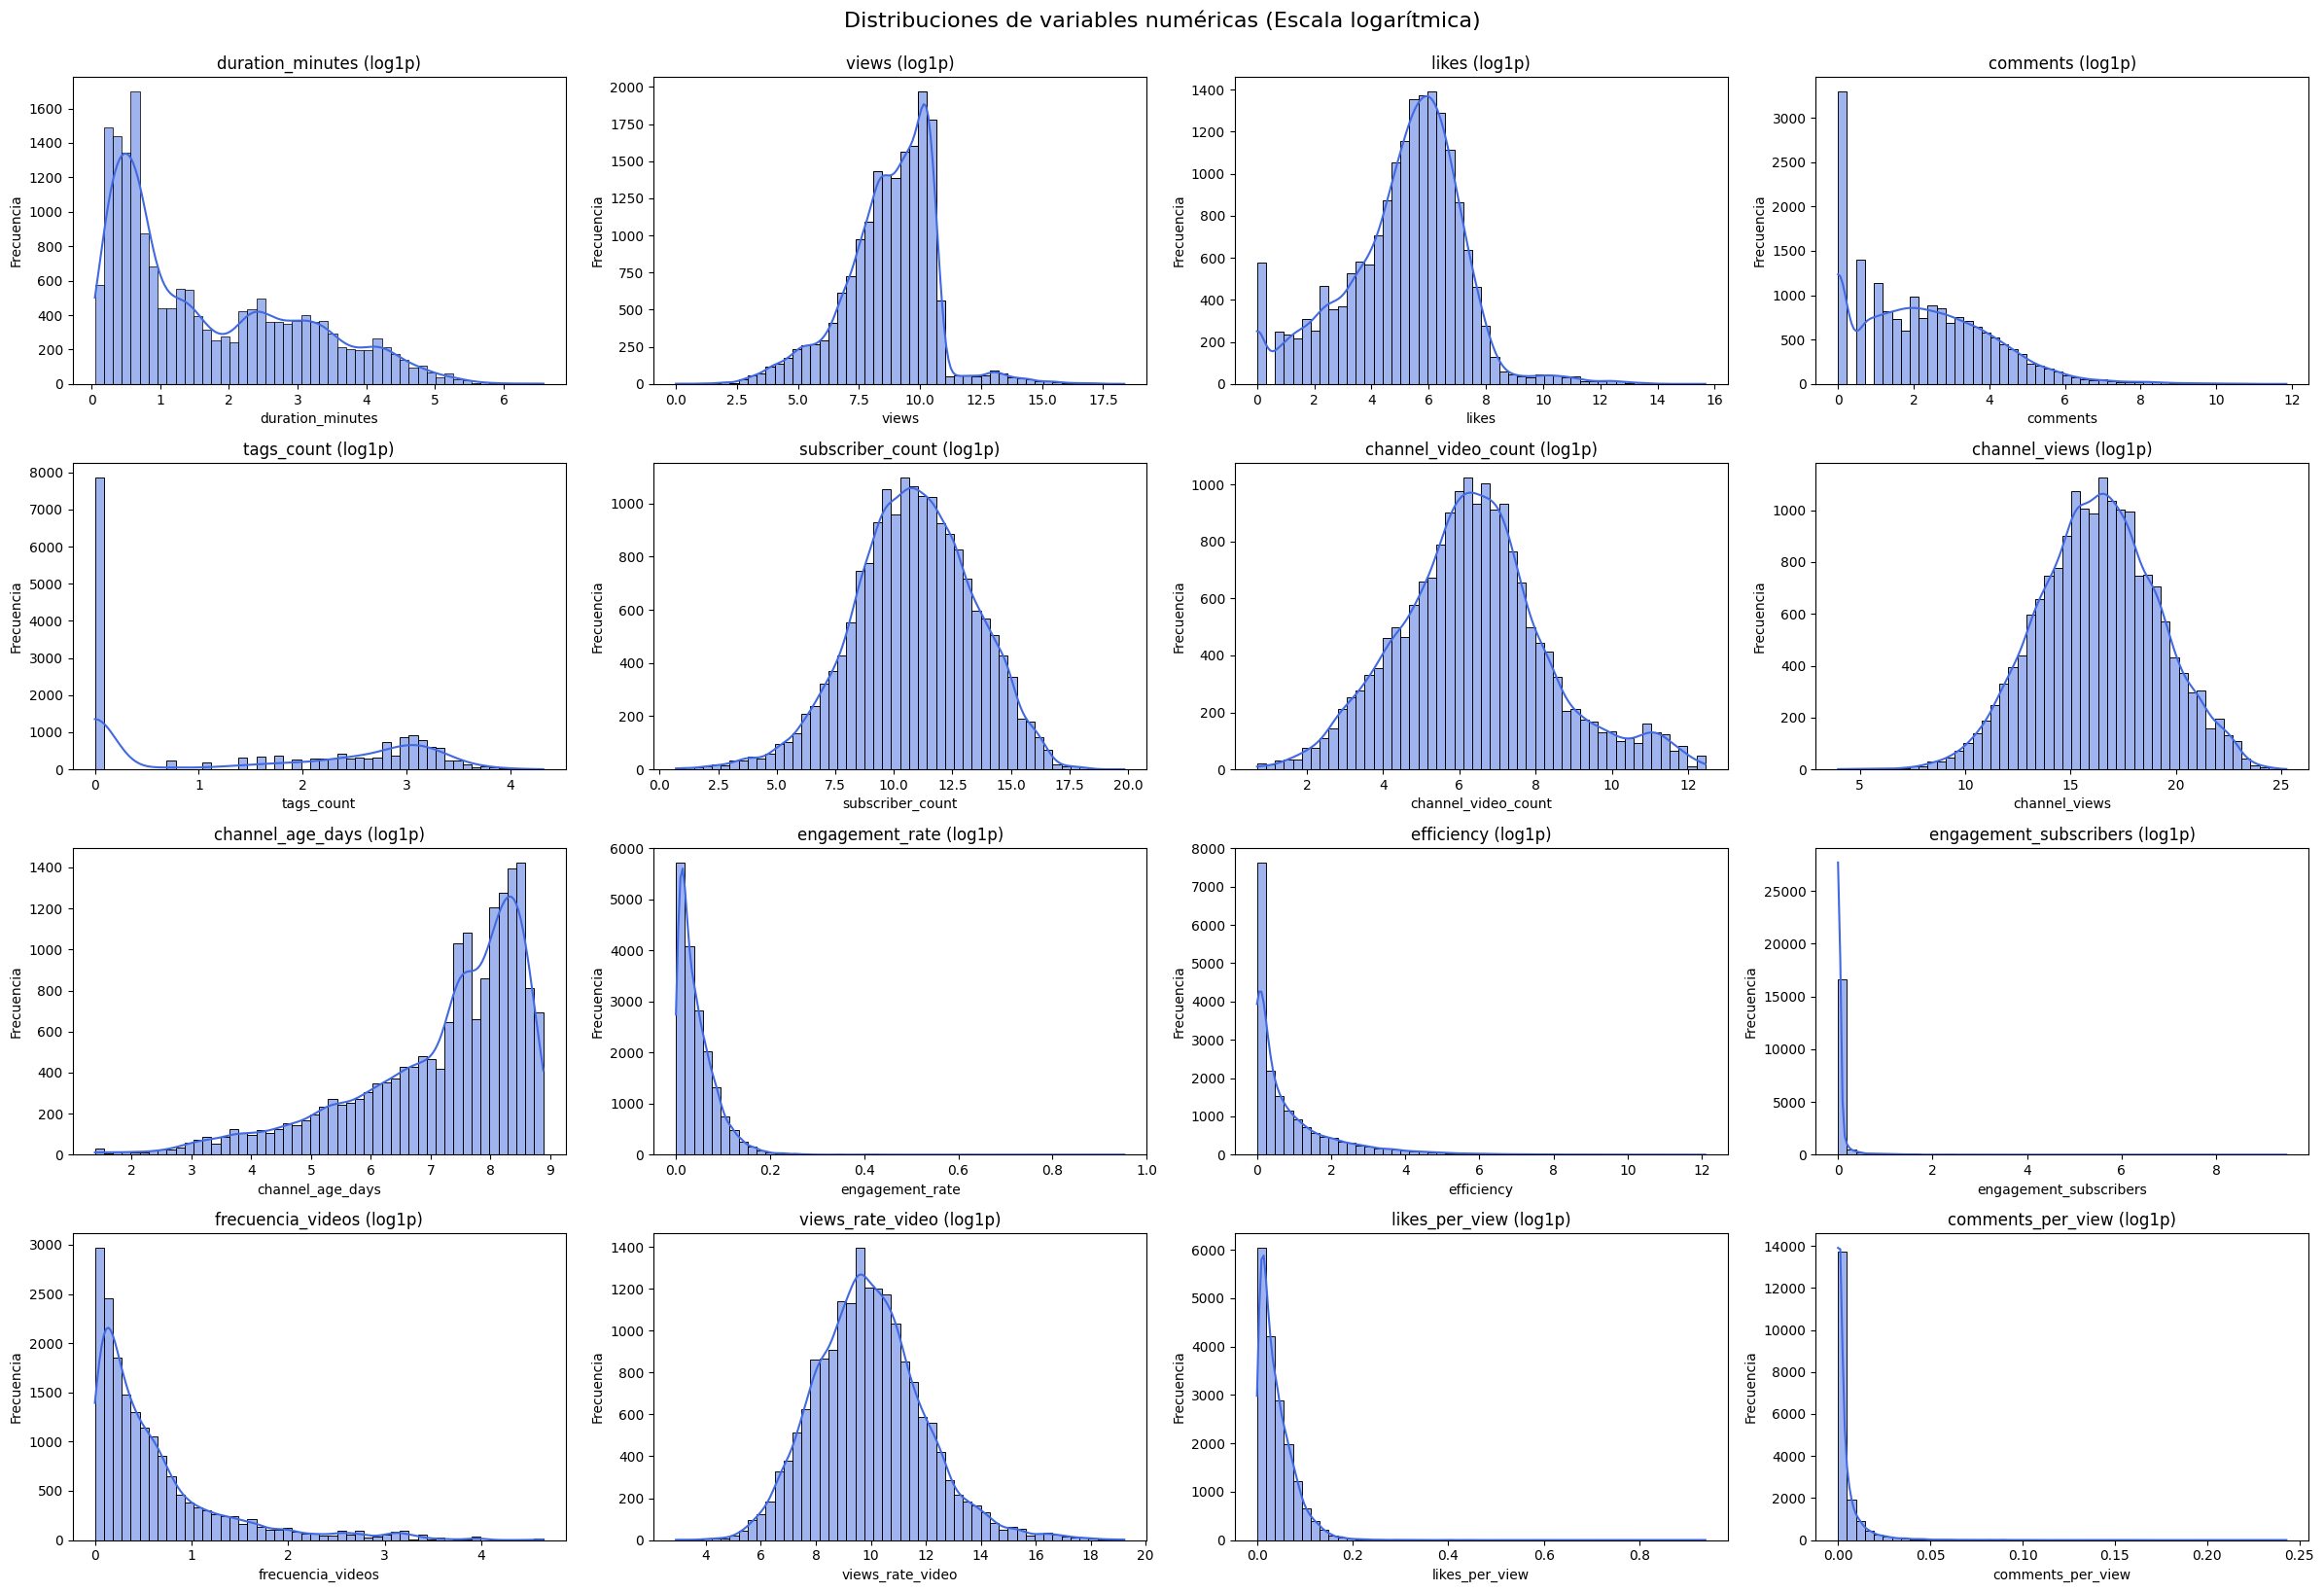

In [6]:
n_cols = 4
n_rows = int(np.ceil(len(num_cols) / n_cols))
plt.figure(figsize=(n_cols*6, n_rows*4))
df_log = df.copy()
for c in num_cols:
    df_log[c] = np.log1p(df_log[c])  # aplicar log1p a cada variable

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df_log[col].dropna(), bins=50, kde=True, color="royalblue")
    plt.title(f"{col} (log1p)")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
plt.suptitle("Distribuciones de variables numéricas (Escala logarítmica)", fontsize=16, y=1.02)
plt.show()

### 2.1.2.1 Boxplot escala lineal

<Figure size 2400x1600 with 0 Axes>

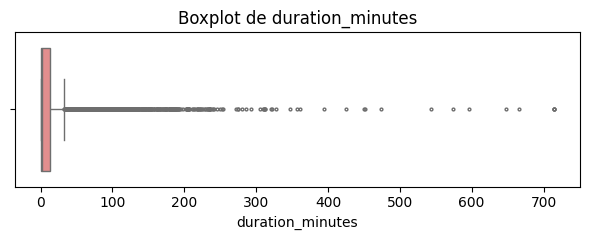

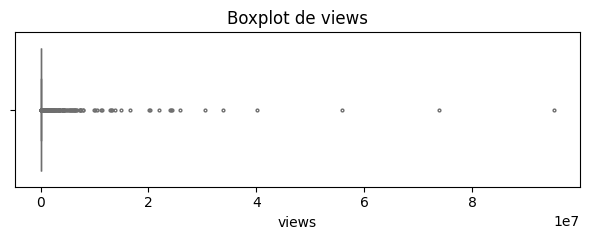

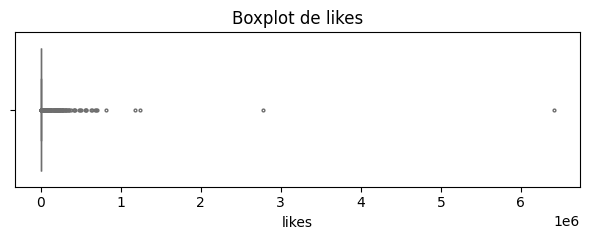

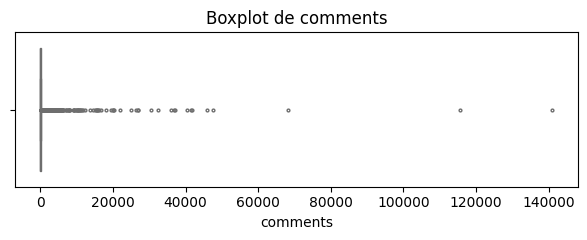

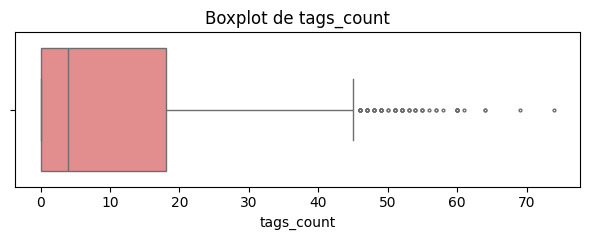

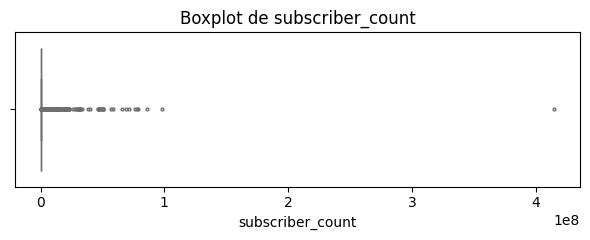

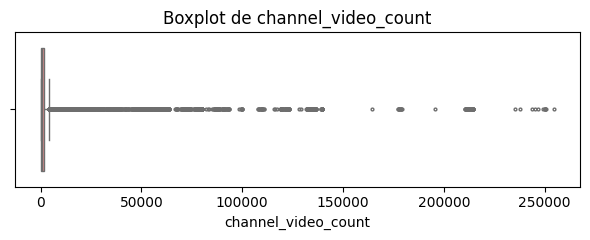

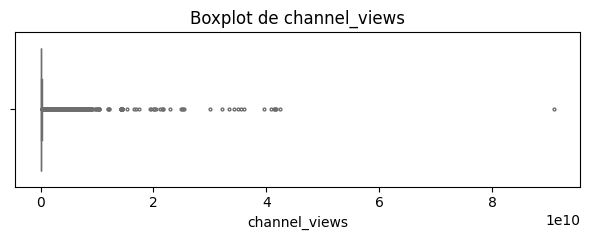

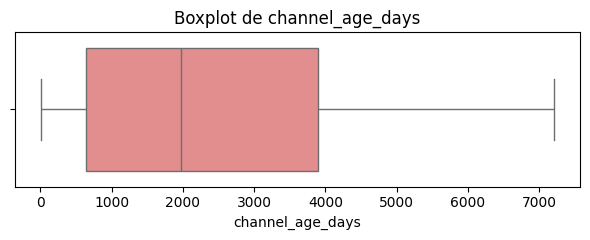

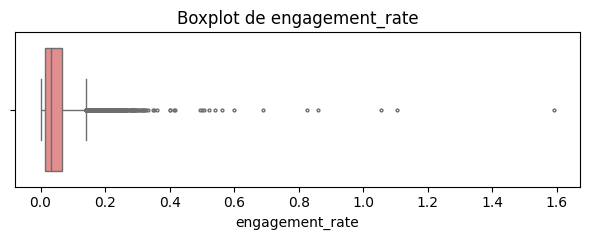

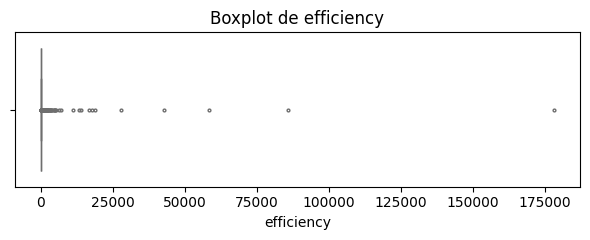

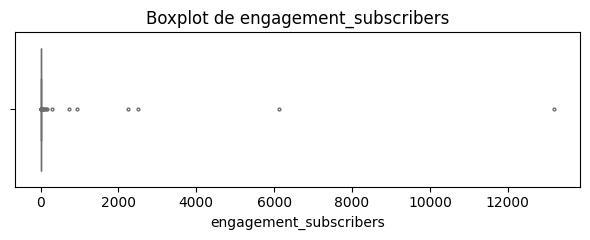

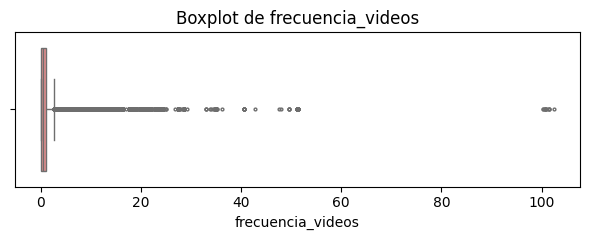

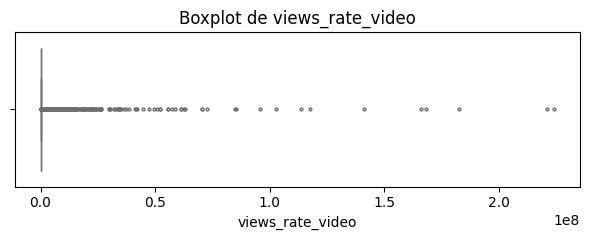

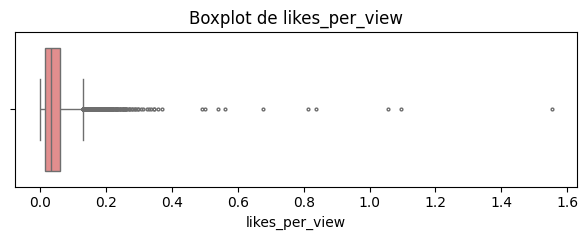

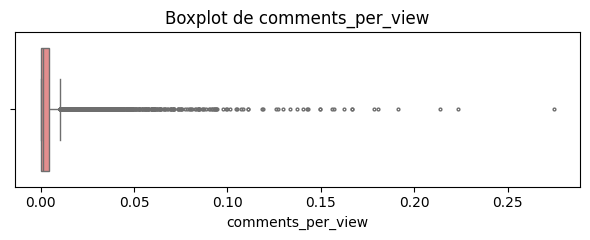

In [7]:
plt.figure(figsize=(n_cols*6, n_rows*4))
for col in num_cols:
    plt.figure(figsize=(6, 2.5))
    sns.boxplot(x=df[col], color="lightcoral", fliersize=2)
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

### 2.1.2.2 Boxplot escala logarítmica

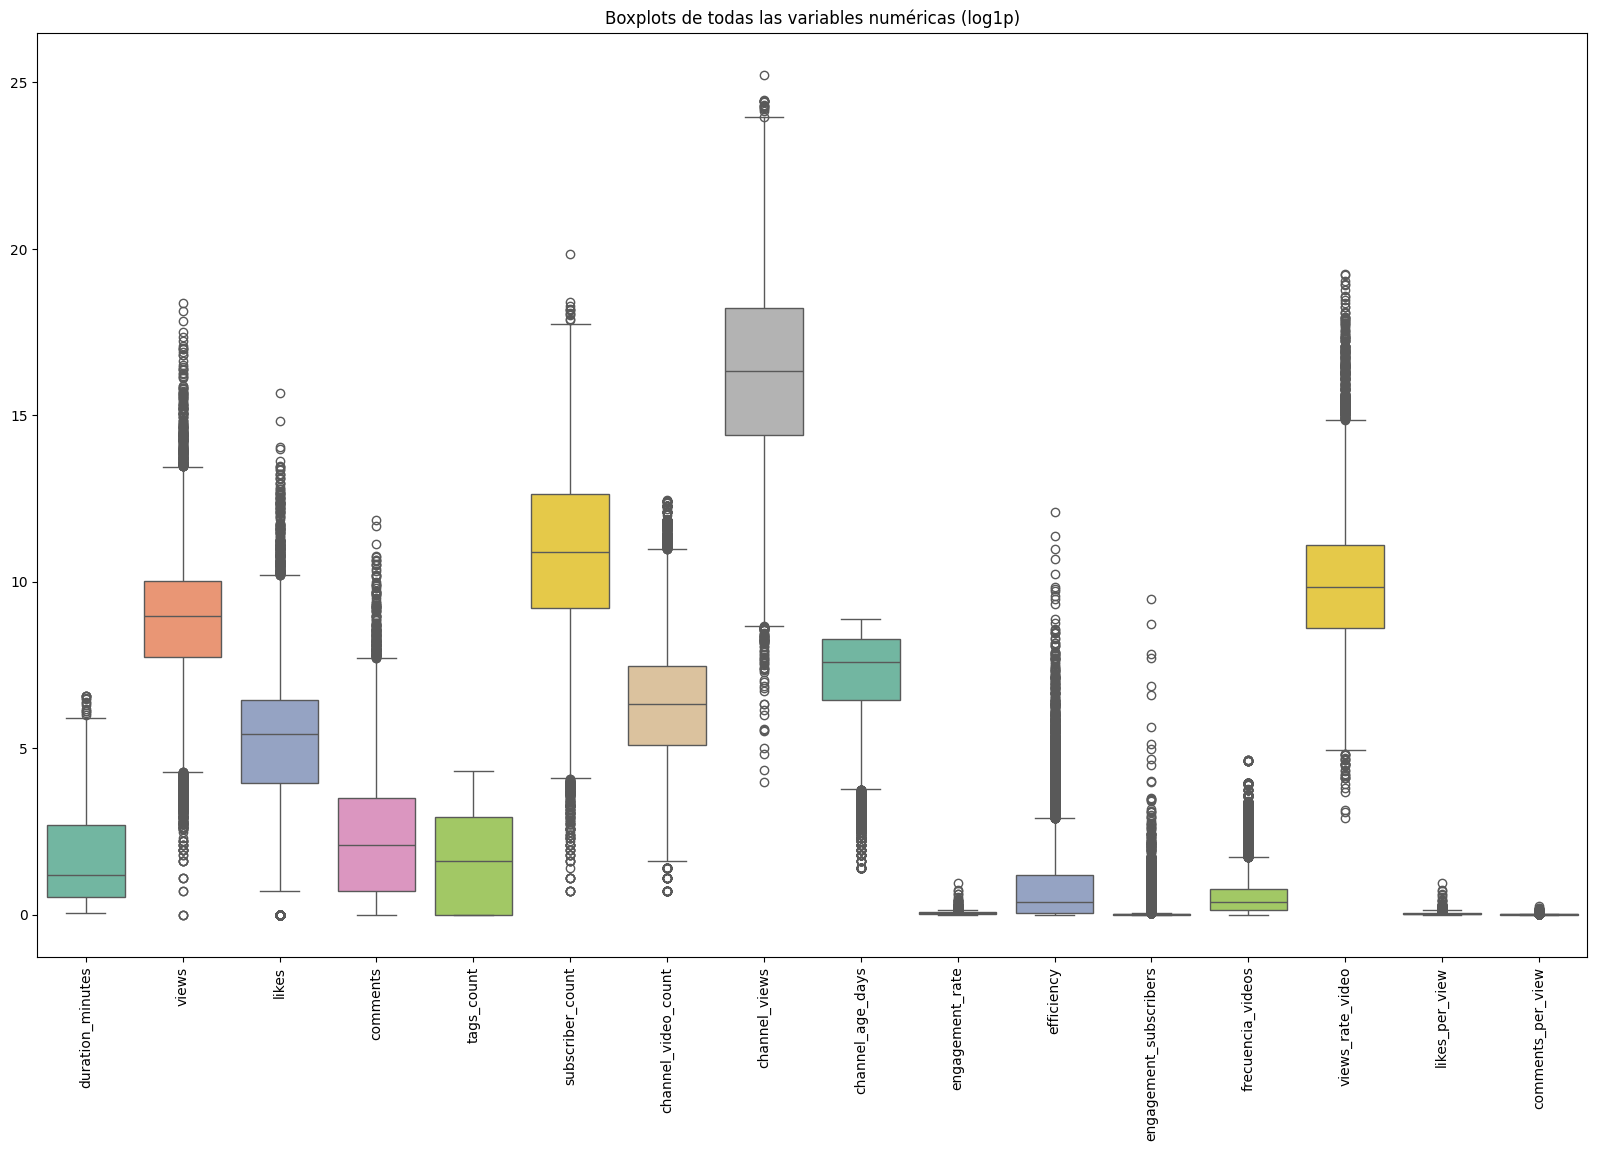

In [8]:
df_num = df[num_cols]

plt.figure(figsize=(20,12))  # Crear figura grande primero
sns.boxplot(data=np.log1p(df_num), orient='v', palette='Set2')  # Boxplot con log
plt.xticks(rotation=90)  # Rotar nombres de columnas
plt.title("Boxplots de todas las variables numéricas (log1p)")
plt.show()

### 2.1.3 Correlaciones entre variables numéricas

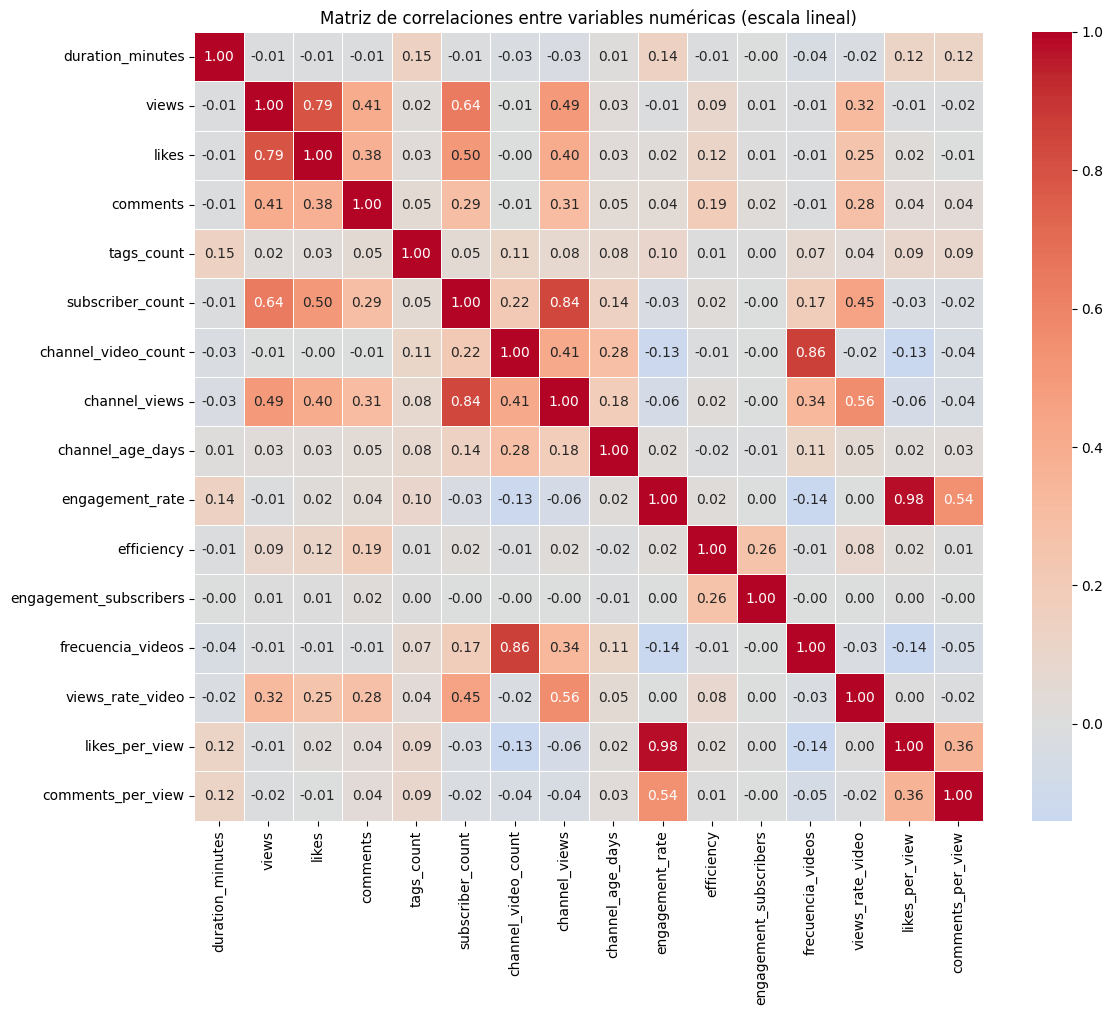

In [9]:

# === 4) Heatmap escala normal ===
corr_matrix = df[num_cols].corr()

# === 3) Graficar heatmap ===
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=True,       # muestra los valores numéricos
    fmt=".2f",        # formato decimal
    square=True,
    linewidths=0.5
)
plt.title("Matriz de correlaciones entre variables numéricas (escala lineal)")
plt.tight_layout()
plt.show()
# === 6) Correlaciones ordenadas respecto a 'views' (para análisis de importancia) ===


In [10]:
corr_matrix = df[num_cols].corr().abs()

# === 3) Eliminar autocorrelaciones (diagonal) ===
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# === 4) Filtrar correlaciones altas (por ejemplo, > 0.8) ===
high_corr = (
    upper_tri.stack()
    .reset_index()
    .rename(columns={'level_0': 'var1', 'level_1': 'var2', 0: 'correlation'})
    .query('correlation > 0.8')
    .sort_values(by='correlation', ascending=False)
)

print("🔎 Correlaciones altas entre variables numéricas")
display(high_corr)

🔎 Correlaciones altas entre variables numéricas


var1               var2  correlation
103      engagement_rate     likes_per_view     0.979331
80   channel_video_count  frecuencia_videos     0.862984
66      subscriber_count      channel_views     0.838919

Pensar en generar un cociente de 	a partir de channel_views / subscriber_count, en views_per_subscriber para capturar eficiencia del canal y reducir colinealidad.

### 2.1.4 Variables categóricas

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17825 entries, 0 to 17824
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   video_id                 17825 non-null  object 
 1   title                    17825 non-null  object 
 2   description              14298 non-null  object 
 3   duration_minutes         17825 non-null  float64
 4   definition               17825 non-null  int64  
 5   licensed_content         17825 non-null  Int64  
 6   has_caption              17825 non-null  Int64  
 7   category_id              17825 non-null  float64
 8   views                    17825 non-null  int64  
 9   likes                    17825 non-null  int64  
 10  comments                 17825 non-null  int64  
 11  tags                     9952 non-null   object 
 12  tags_count               17825 non-null  int64  
 13  views_per_day            17825 non-null  int64  
 14  video_age_days        

In [12]:
p75 = df["engagement_rate"].quantile(0.75)

# Crear columna indicador: 1 si está en el top 25%, 0 en caso contrario
df["target_engagement"] = (df["engagement_rate"] >= p75).astype(int)
print("Threshold P75:", p75)
print(df["target_engagement"].value_counts(normalize=True))

Threshold P75: 0.06544668954123777
target_engagement
0    0.749958
1    0.250042
Name: proportion, dtype: float64



📊 Variable: definition
definition
1    17687
0      138
Name: count, dtype: int64
Moda: 1
----------------------------------------

📊 Variable: licensed_content
licensed_content
1    12744
0     5081
Name: count, dtype: Int64
Moda: 1
----------------------------------------

📊 Variable: has_caption
has_caption
0    17297
1      528
Name: count, dtype: Int64
Moda: 0
----------------------------------------

📊 Variable: category_name
category_name
People & Blogs           4611
Entertainment            3148
Education                2832
Gaming                   1992
News & Politics          1273
Howto & Style             871
Music                     830
Sports                    757
Science & Technology      677
Film & Animation          310
Autos & Vehicles          171
Pets & Animals            111
Comedy                    103
Travel & Events            80
Nonprofits & Activism      59
Name: count, dtype: int64
Moda: People & Blogs
----------------------------------------

📊 Variable

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/2423730344.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", edgecolor="black")


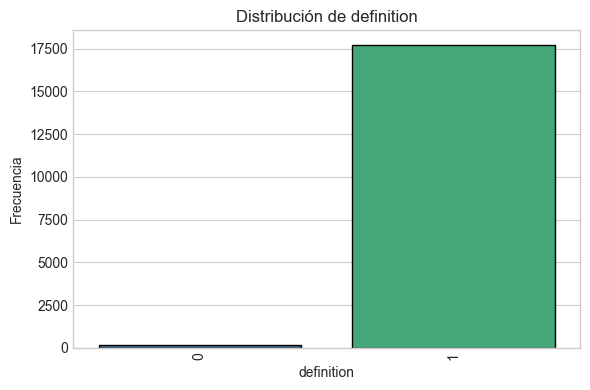

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/2423730344.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", edgecolor="black")


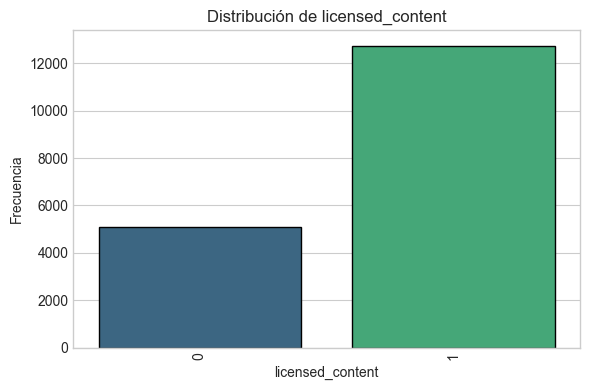

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/2423730344.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", edgecolor="black")


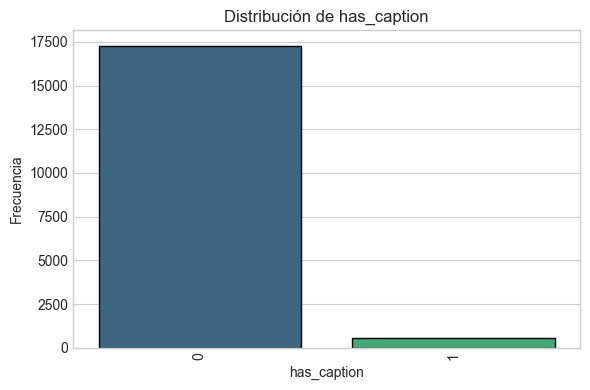

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/2423730344.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", edgecolor="black")


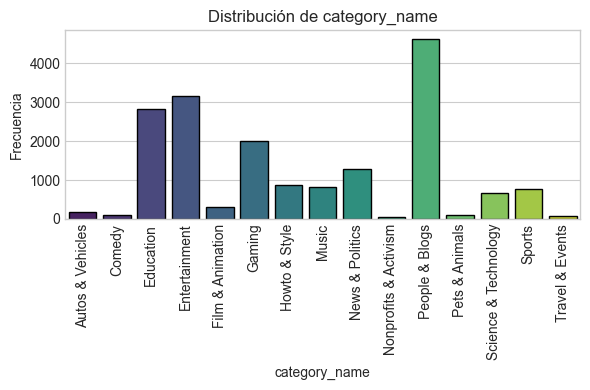

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/2423730344.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", edgecolor="black")


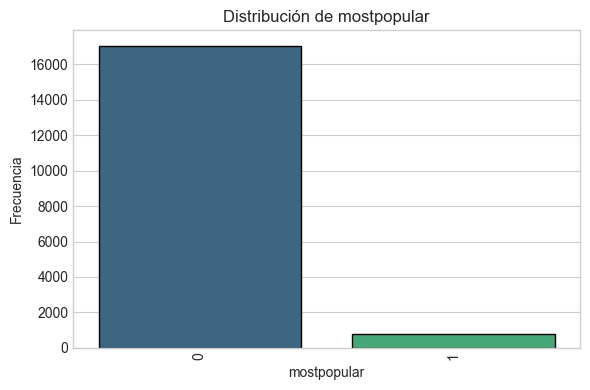

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/2423730344.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", edgecolor="black")


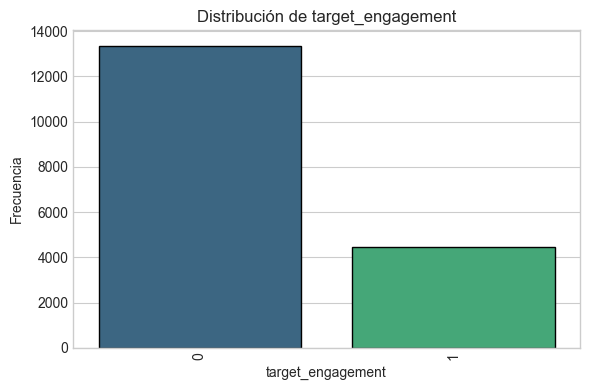

In [13]:

category_map = {
    1:  "Film & Animation",
    2:  "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    19: "Travel & Events",
    20: "Gaming",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism"
}
df['category_name'] = df['category_id'].map(category_map)
df['category_name'] = df['category_name'].astype('category') #dado que category_name tiene varias dimensiones la transformamos a variable categórica
# Posteriormente se hará un OHE con esta. Con las otras dado que son booleanas no es necesario convertirlas.
cat_cols = ['definition', 'licensed_content', 'has_caption', 'category_name', 'mostpopular', 'target_engagement']
plt.style.use("seaborn-v0_8-whitegrid")

# === 2) Estadísticos básicos y moda ===
for col in cat_cols:
    print(f"\n📊 Variable: {col}")
    print(df[col].value_counts(dropna=False))
    print(f"Moda: {df[col].mode()[0]}")
    print("-" * 40)

# === 3) Gráficos de distribución (barras) ===
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette="viridis", edgecolor="black")
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

### 2.1.4.2 Correlación entre variables categóricas

In [14]:
def cramers_v(x, y):
    """Calcula Cramér's V entre dos variables categóricas"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# # === Variables categóricas del dataset ===
cat_cols = ['definition', 'licensed_content', 'has_caption', 'category_name',"mostpopular", "target_engagement"]

# === Calcular matriz de Cramér's V ===
cramers_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

for var1 in cat_cols:
    for var2 in cat_cols:
        cramers_matrix.loc[var1, var2] = cramers_v(df[var1], df[var2])

display(cramers_matrix)

definition  licensed_content  has_caption  category_name  \
definition           0.996348          0.000000     0.011286       0.053457   
licensed_content     0.000000          0.999862     0.036630       0.174333   
has_caption          0.011286          0.036630     0.999024       0.125468   
category_name        0.053457          0.174333     0.125468       1.000000   
mostpopular          0.015386          0.076501     0.102440       0.615294   
target_engagement    0.007126          0.064414     0.023661       0.155019   

                   mostpopular  target_engagement  
definition            0.015386           0.007126  
licensed_content      0.076501           0.064414  
has_caption           0.102440           0.023661  
category_name         0.615294           0.155019  
mostpopular           0.999316           0.022134  
target_engagement     0.022134           0.999850

La alta correlación 0.541608 de category_name con el target no solo no es un problema, sino que es señal de que esta variable es predictiva

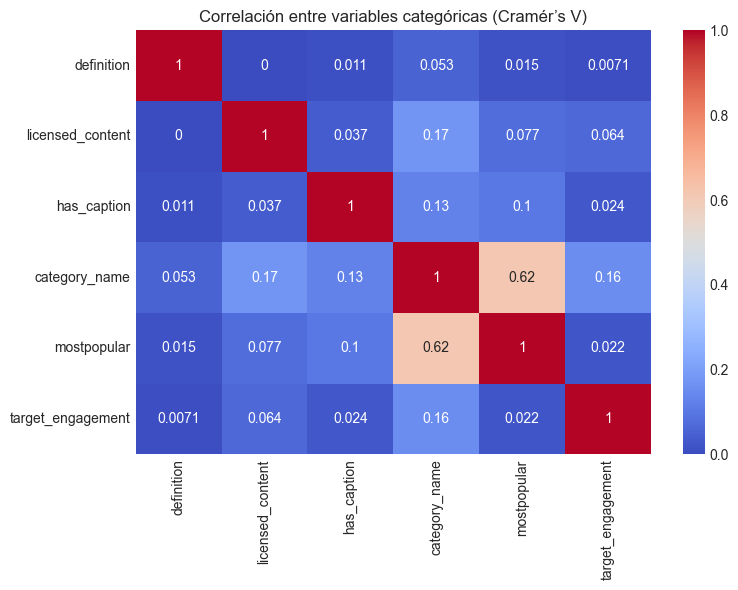

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(cramers_matrix.astype(float), annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Correlación entre variables categóricas (Cramér’s V)")
plt.tight_layout()
plt.show()

### 2.2.1 Views 

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=col, ax=axes[2], palette="viridis")


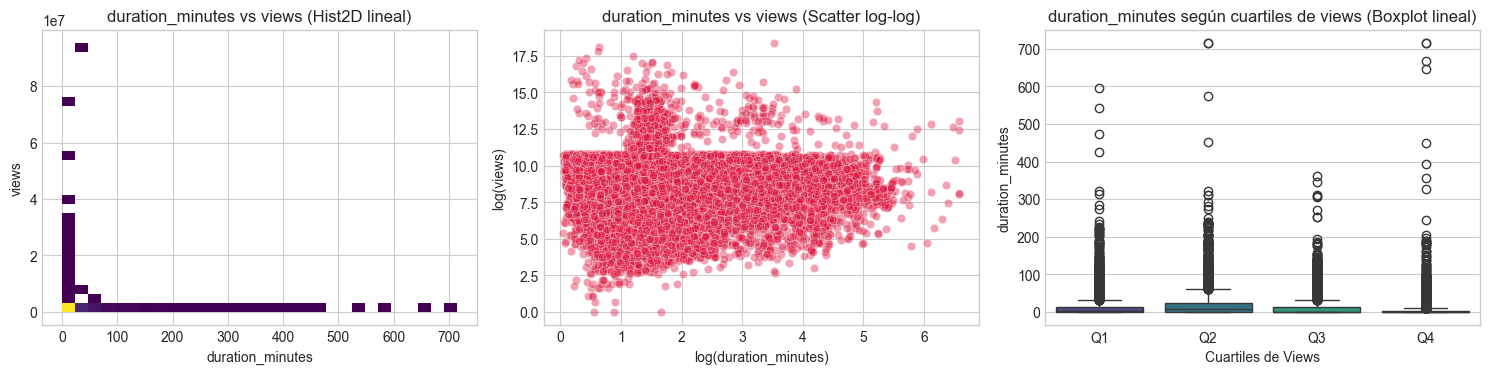

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=f'{col}_log', palette="magma")


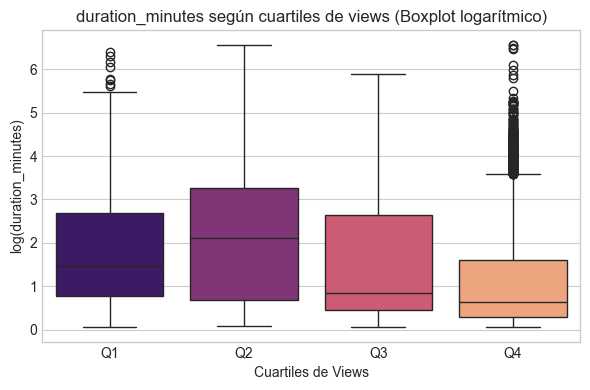

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=col, ax=axes[2], palette="viridis")


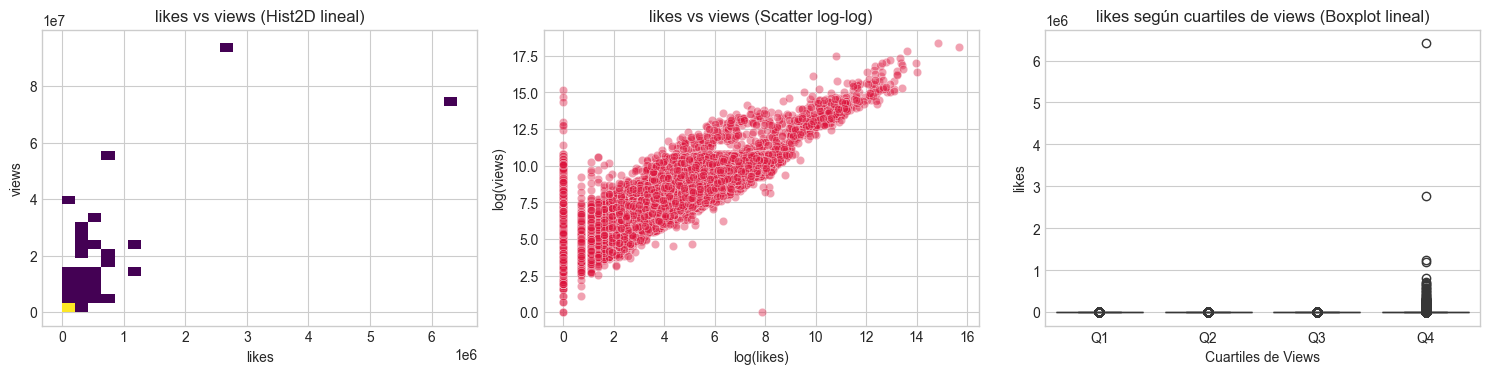

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=f'{col}_log', palette="magma")


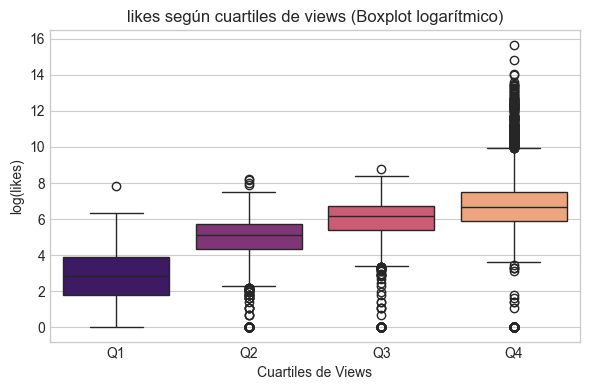

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=col, ax=axes[2], palette="viridis")


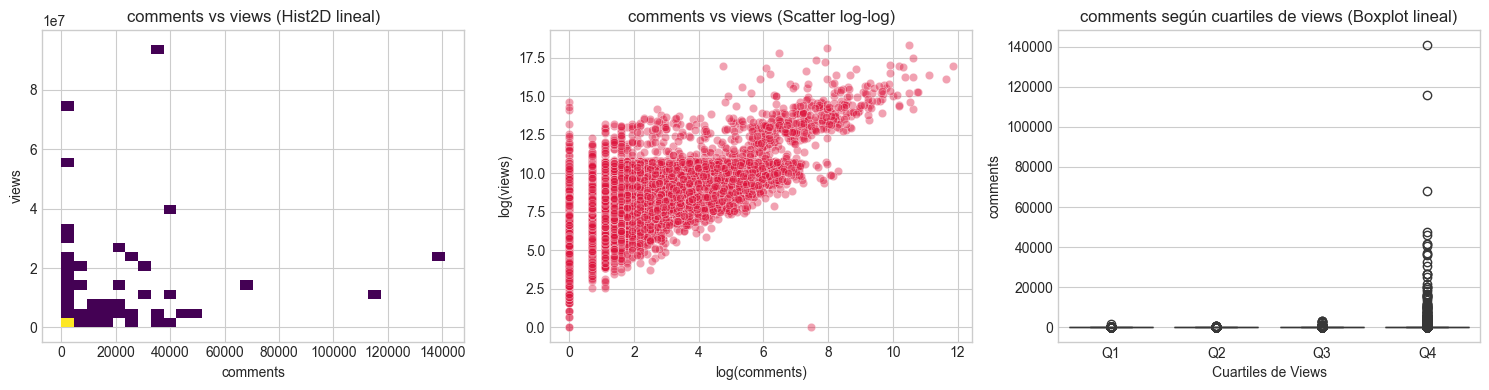

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=f'{col}_log', palette="magma")


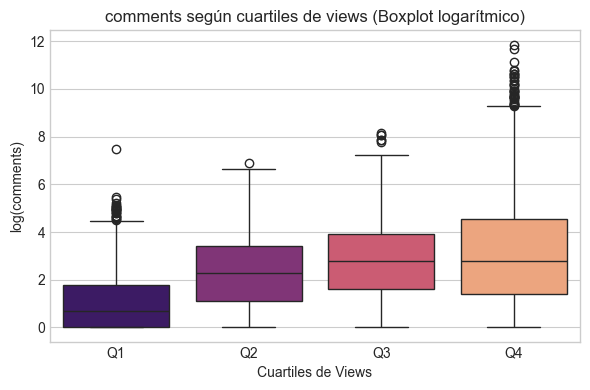

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=col, ax=axes[2], palette="viridis")


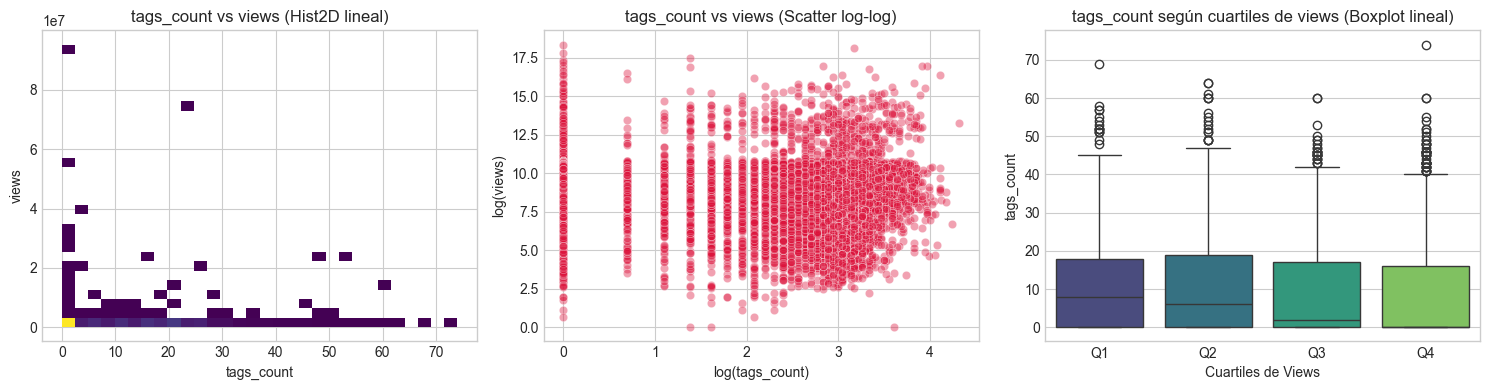

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=f'{col}_log', palette="magma")


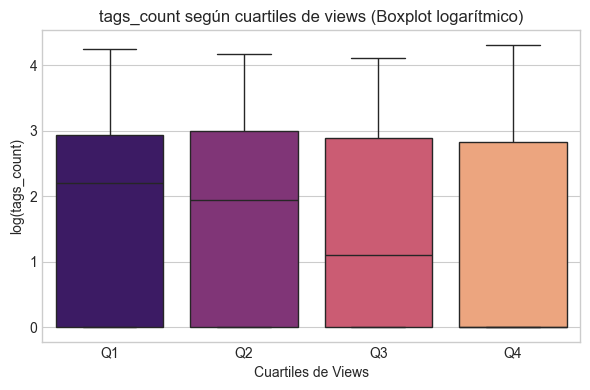

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=col, ax=axes[2], palette="viridis")


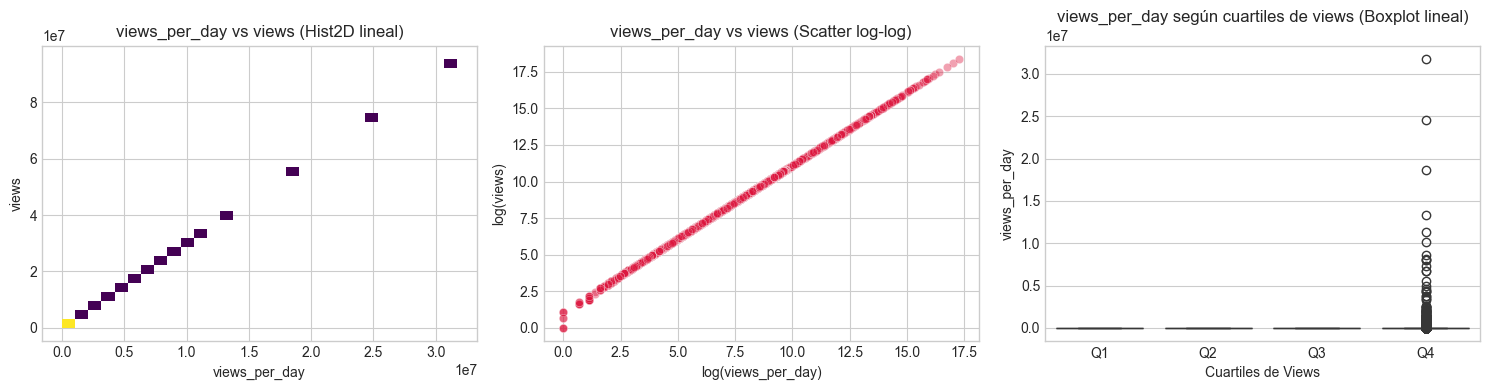

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=f'{col}_log', palette="magma")


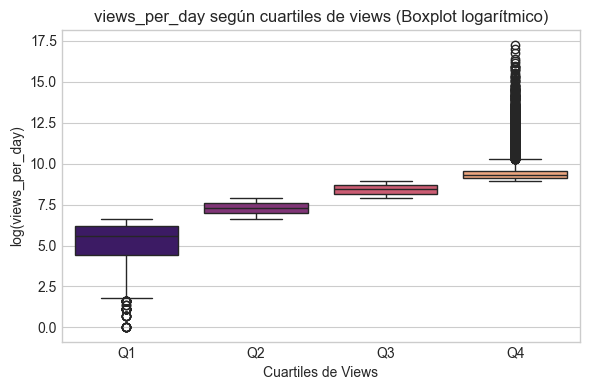

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=col, ax=axes[2], palette="viridis")


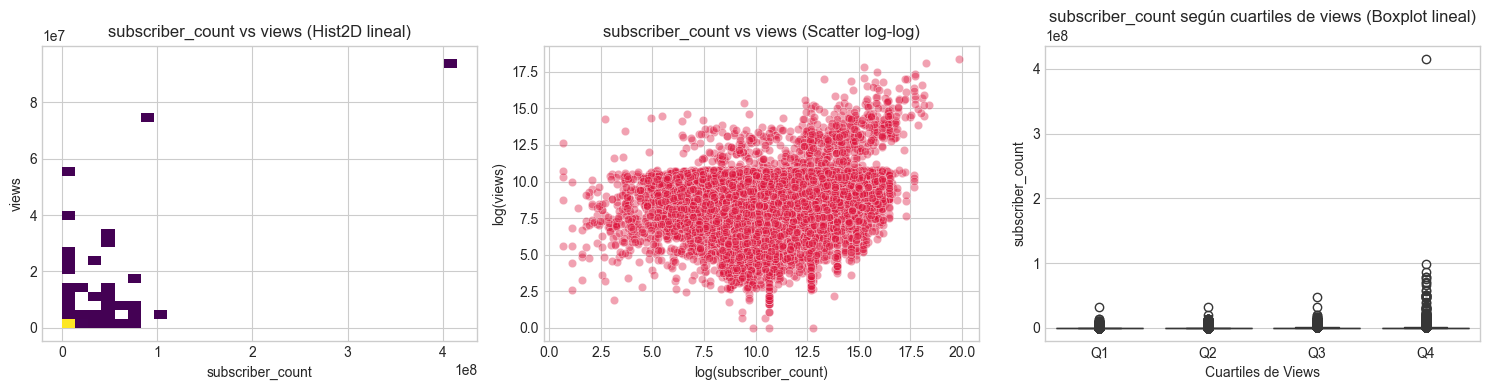

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=f'{col}_log', palette="magma")


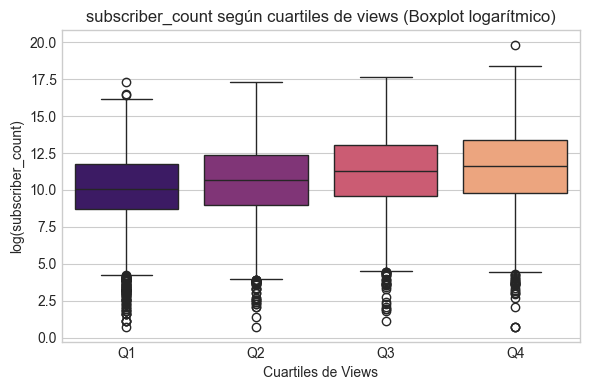

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=col, ax=axes[2], palette="viridis")


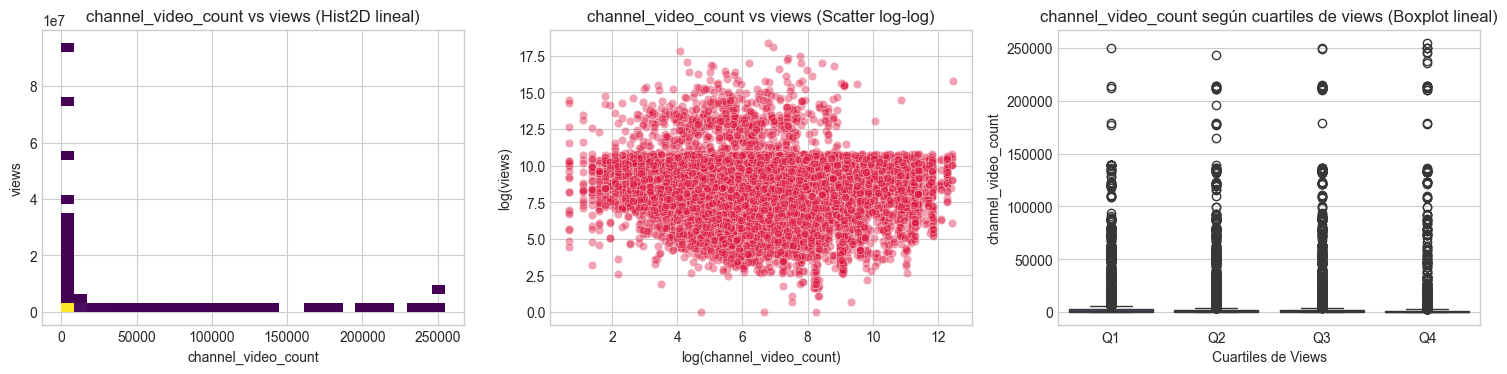

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=f'{col}_log', palette="magma")


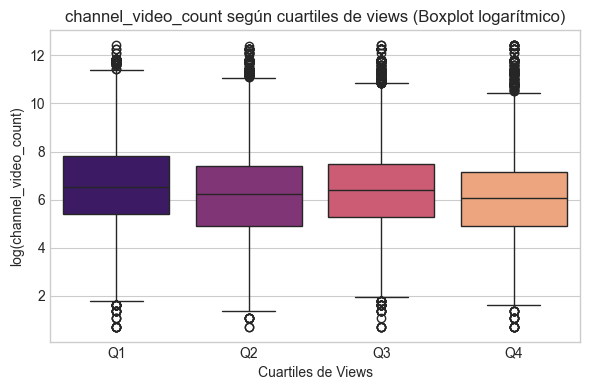

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=col, ax=axes[2], palette="viridis")


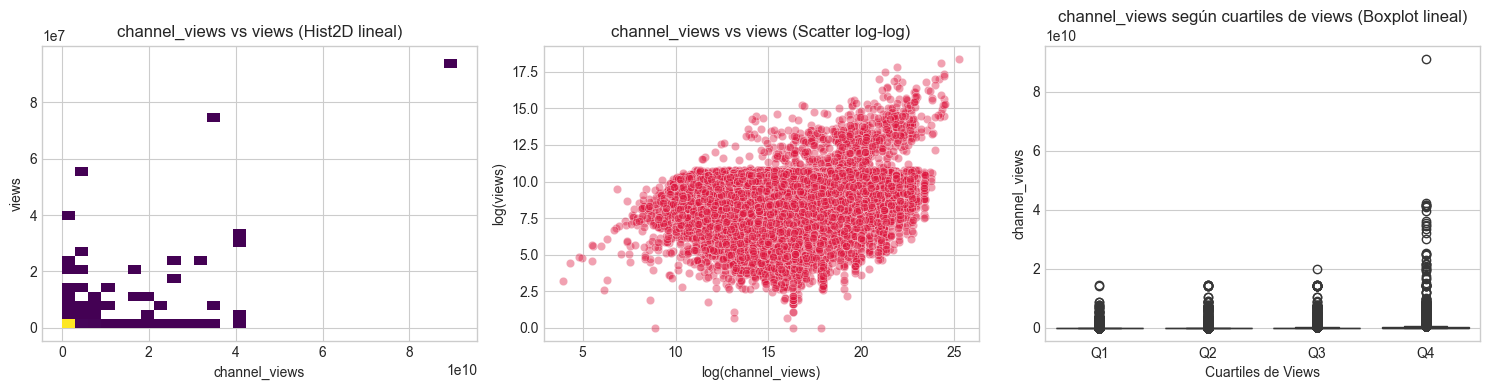

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=f'{col}_log', palette="magma")


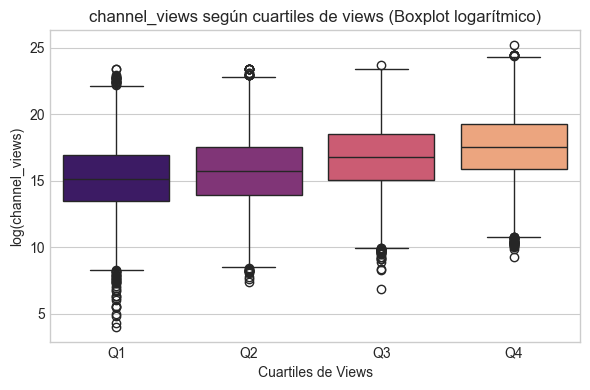

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=col, ax=axes[2], palette="viridis")


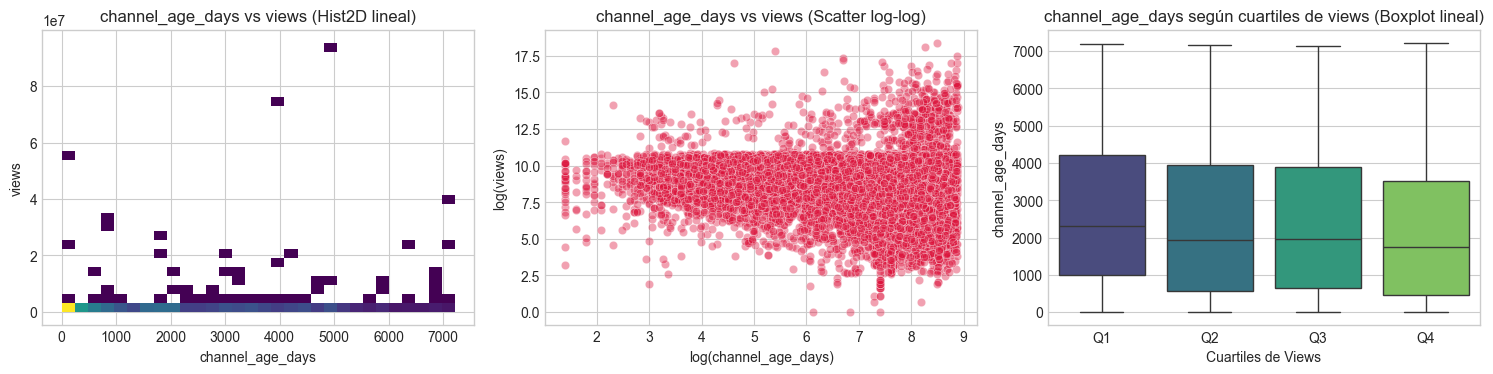

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=f'{col}_log', palette="magma")


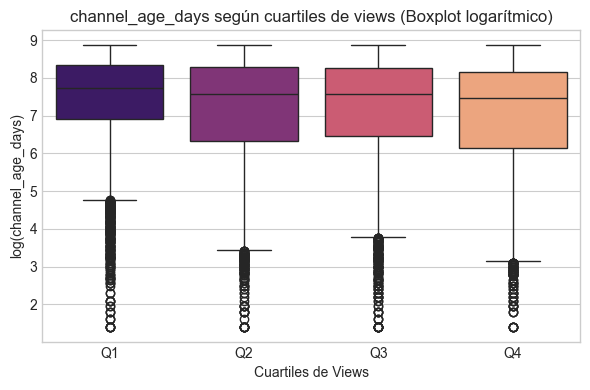

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=col, ax=axes[2], palette="viridis")


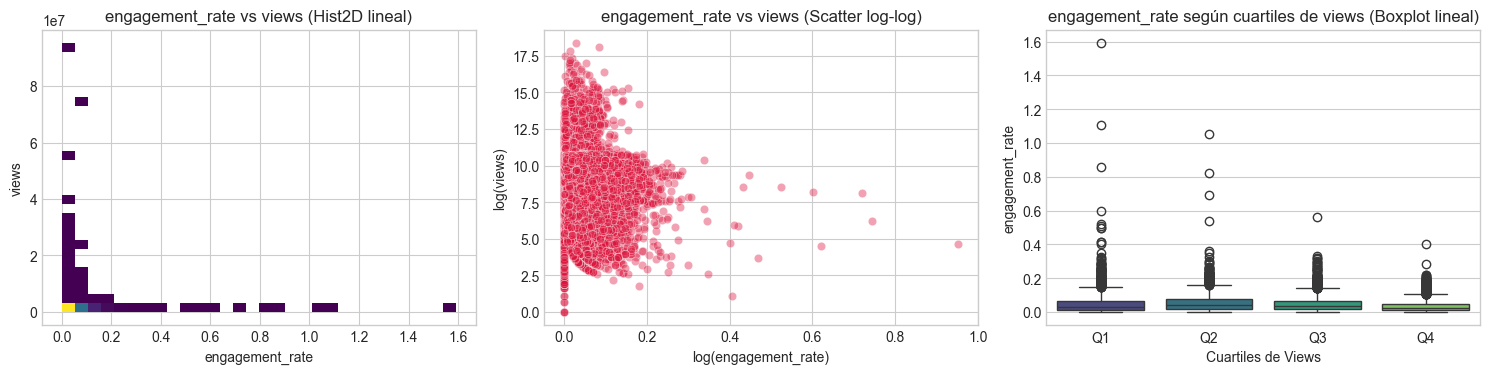

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=f'{col}_log', palette="magma")


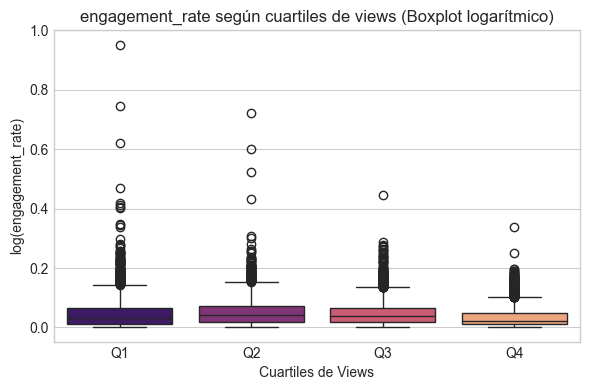

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=col, ax=axes[2], palette="viridis")


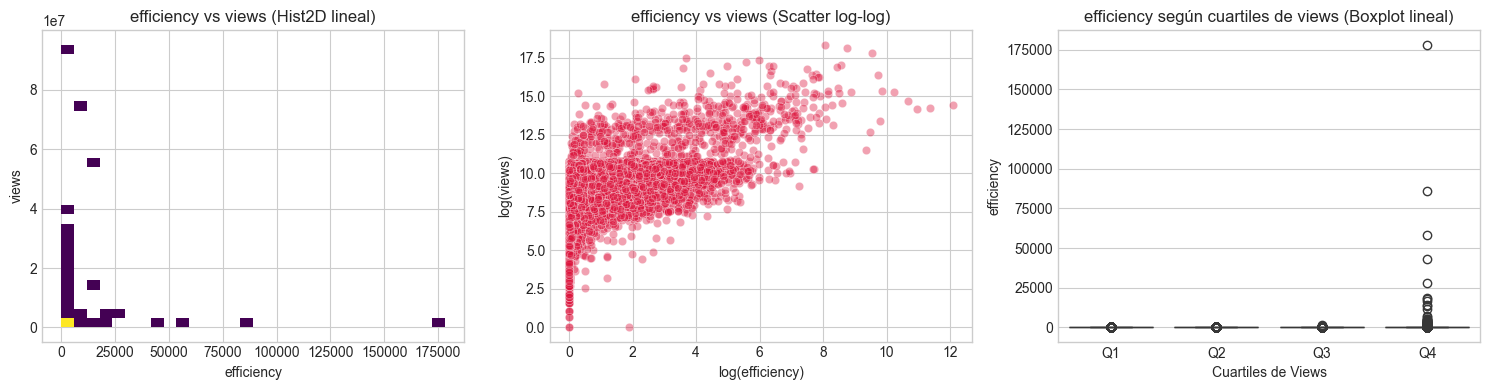

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=f'{col}_log', palette="magma")


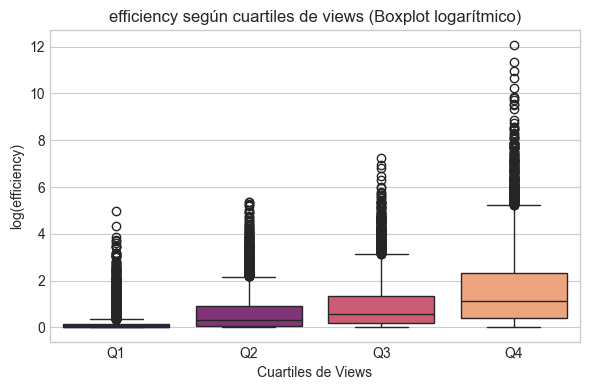

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=col, ax=axes[2], palette="viridis")


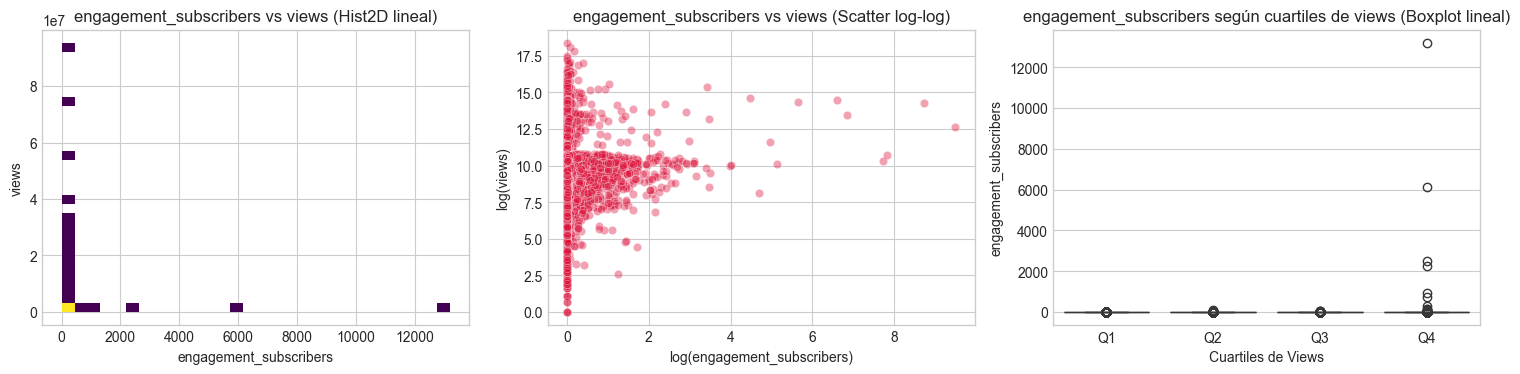

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=f'{col}_log', palette="magma")


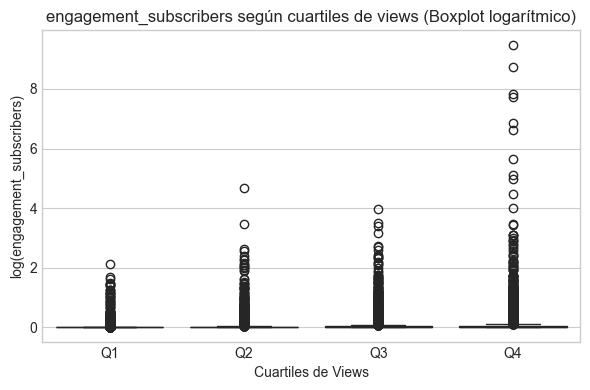

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=col, ax=axes[2], palette="viridis")


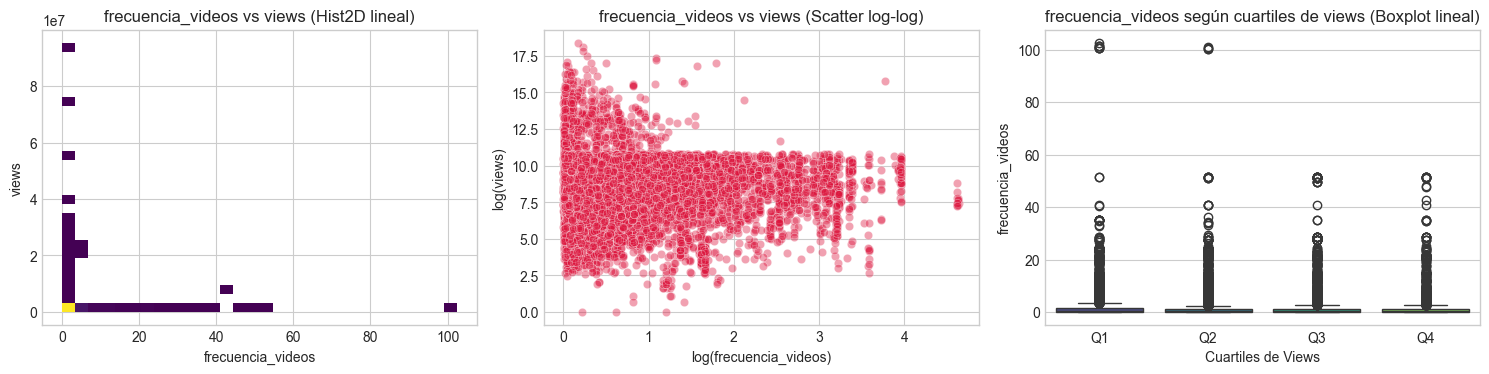

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=f'{col}_log', palette="magma")


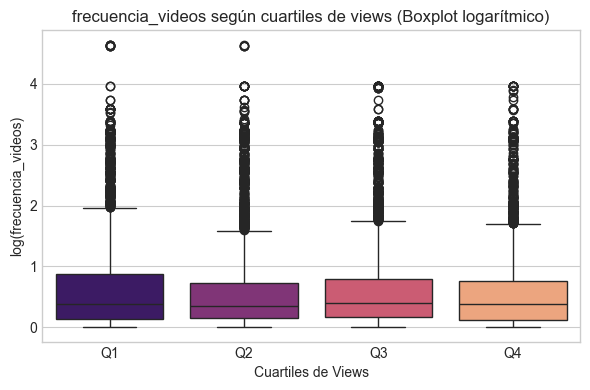

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=col, ax=axes[2], palette="viridis")


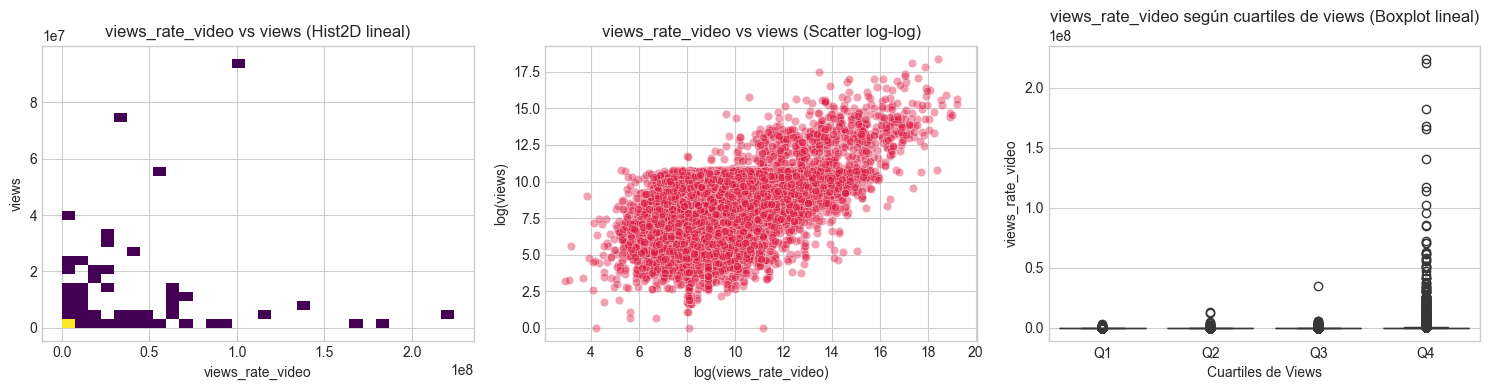

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=f'{col}_log', palette="magma")


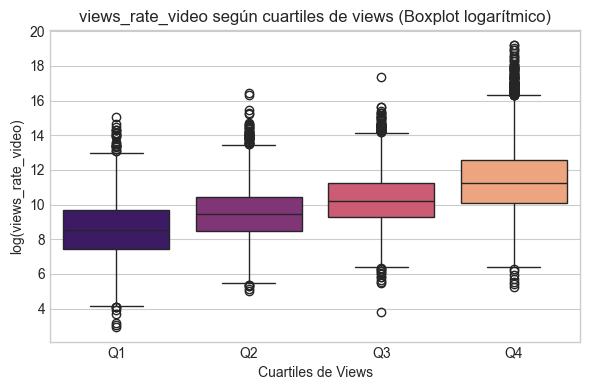

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=col, ax=axes[2], palette="viridis")


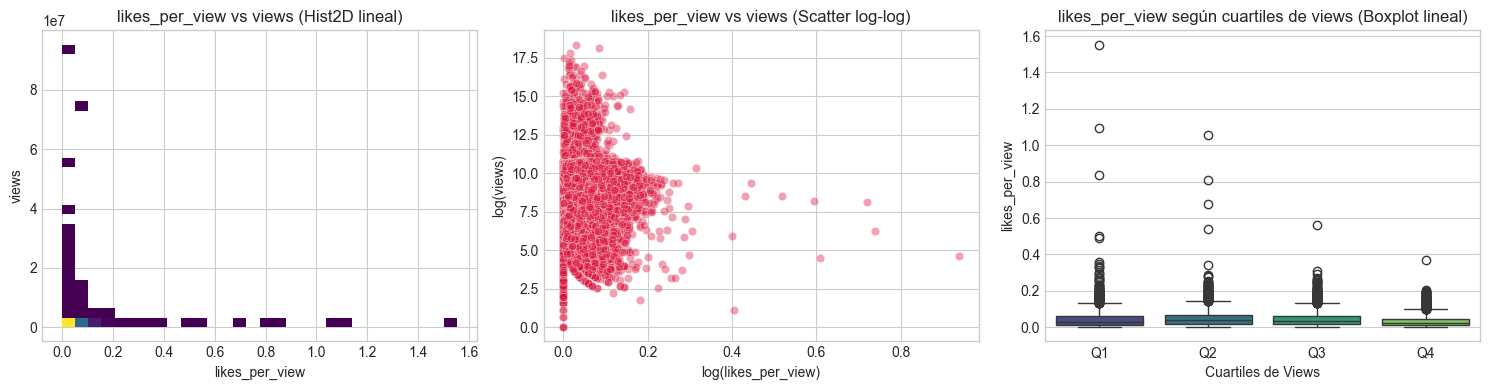

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=f'{col}_log', palette="magma")


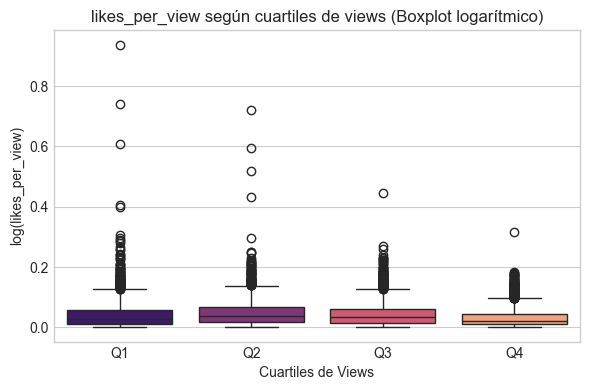

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=col, ax=axes[2], palette="viridis")


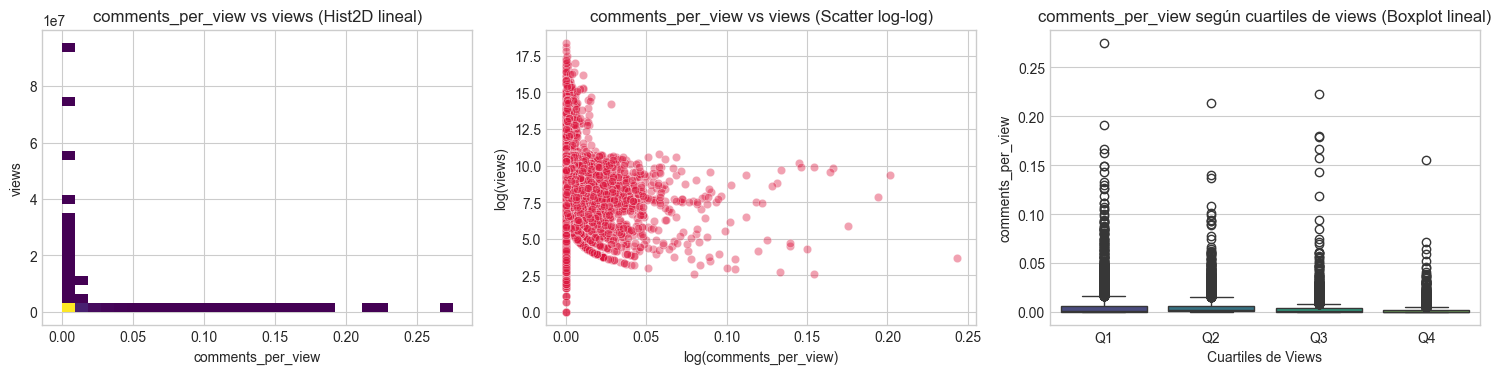

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=f'{col}_log', palette="magma")


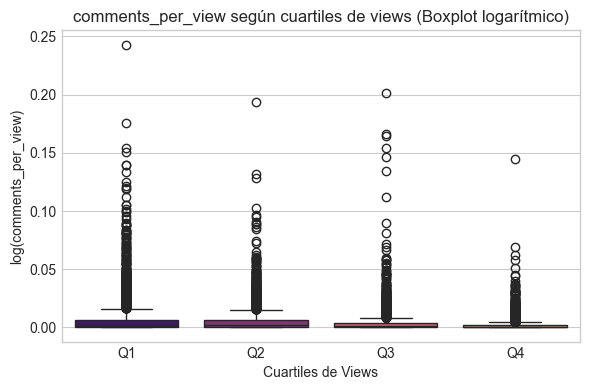

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=col, ax=axes[2], palette="viridis")


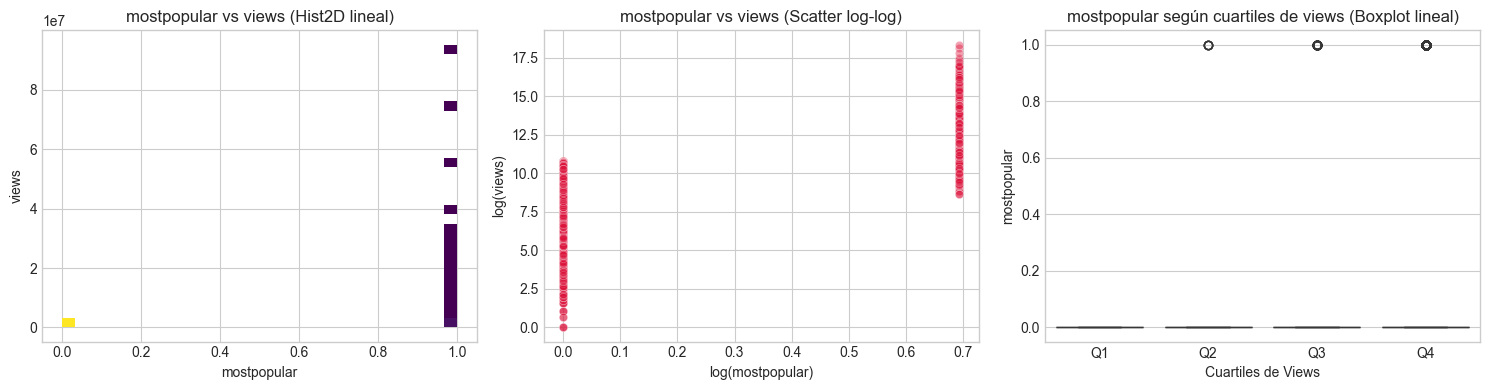

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/415562102.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='views_quartile', y=f'{col}_log', palette="magma")


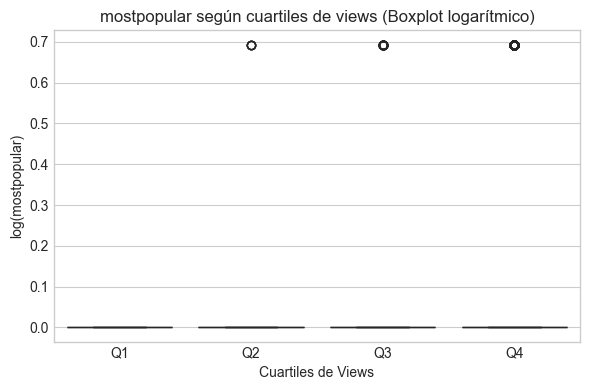

In [16]:
num_cols_sin_video = [
    'duration_minutes', 'likes', 'comments', 'tags_count',
    'views_per_day', 'subscriber_count', 'channel_video_count',
    'channel_views', 'channel_age_days', 'engagement_rate', 'efficiency',
    'engagement_subscribers', 'frecuencia_videos', 'views_rate_video',
    'likes_per_view', 'comments_per_view', 'mostpopular'
]

# === 2) Crear columnas logarítmicas ===
df['views_log'] = np.log1p(df['views'])
for col in num_cols_sin_video:
    df[f'{col}_log'] = np.log1p(df[col])

# === 3) Cuartiles de views para boxplots ===
df['views_quartile'] = pd.qcut(df['views'], q=4, labels=['Q1','Q2','Q3','Q4'])

# === 4) Visualizaciones ===
for col in num_cols_sin_video:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # --- (1) Histograma 2D (lineal) ---
    sns.histplot(data=df, x=col, y='views', bins=30, cmap='viridis', ax=axes[0])
    axes[0].set_title(f"{col} vs views (Hist2D lineal)")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("views")

    # --- (2) Scatterplot log–log ---
    sns.scatterplot(
        data=df,
        x=f'{col}_log',
        y='views_log',
        alpha=0.4, color='crimson', ax=axes[1]
    )
    axes[1].set_title(f"{col} vs views (Scatter log-log)")
    axes[1].set_xlabel(f"log({col})")
    axes[1].set_ylabel("log(views)")

    # --- (3) Boxplot lineal ---
    sns.boxplot(data=df, x='views_quartile', y=col, ax=axes[2], palette="viridis")
    axes[2].set_title(f"{col} según cuartiles de views (Boxplot lineal)")
    axes[2].set_xlabel("Cuartiles de Views")
    axes[2].set_ylabel(col)

    plt.tight_layout()
    plt.show()

    # --- (4) Boxplot logarítmico ---
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='views_quartile', y=f'{col}_log', palette="magma")
    plt.title(f"{col} según cuartiles de views (Boxplot logarítmico)")
    plt.xlabel("Cuartiles de Views")
    plt.ylabel(f"log({col})")
    plt.tight_layout()
    plt.show()

<Axes: >

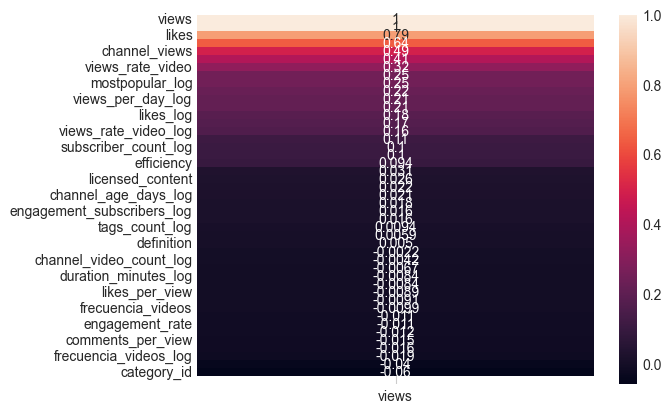

In [17]:
sns.heatmap(df.corr(numeric_only=True)[['views']].sort_values(by='views', ascending=False), annot=True)

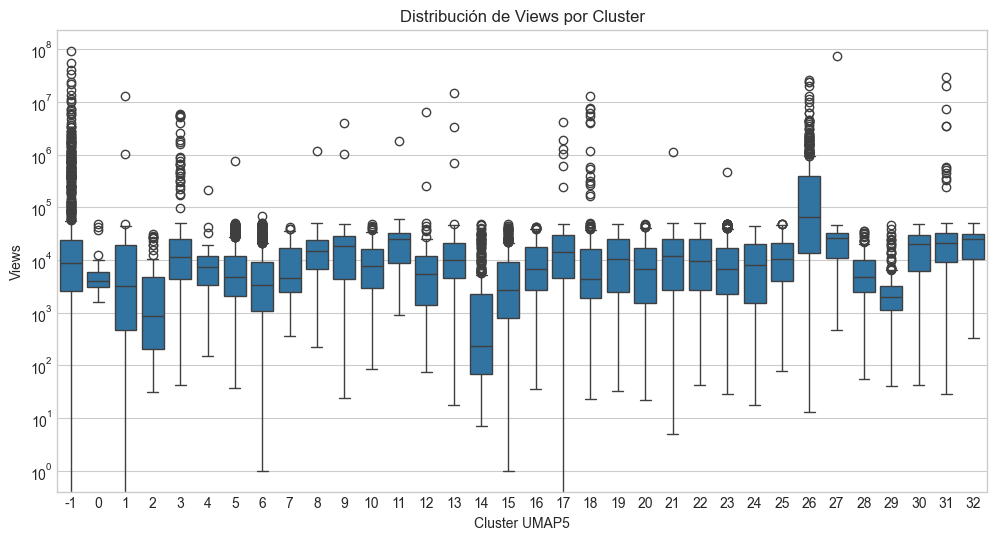

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(x="cluster_umap5", y="views", data=df)
plt.yscale("log")  # opcional para escalas muy dispersas
plt.title("Distribución de Views por Cluster")
plt.xlabel("Cluster UMAP5")
plt.ylabel("Views")
plt.show()

### 2.2.2 Target Engagement

In [19]:
p75 = df["engagement_rate"].quantile(0.75)

# Crear columna indicador: 1 si está en el top 25%, 0 en caso contrario
df["target_engagement"] = (df["engagement_rate"] >= p75).astype(int)
print("Threshold P75:", p75)
print(df["target_engagement"].value_counts(normalize=True))

Threshold P75: 0.06544668954123777
target_engagement
0    0.749958
1    0.250042
Name: proportion, dtype: float64


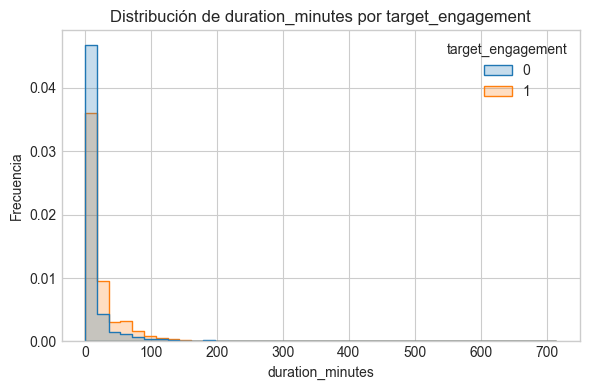

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=col, palette="viridis")


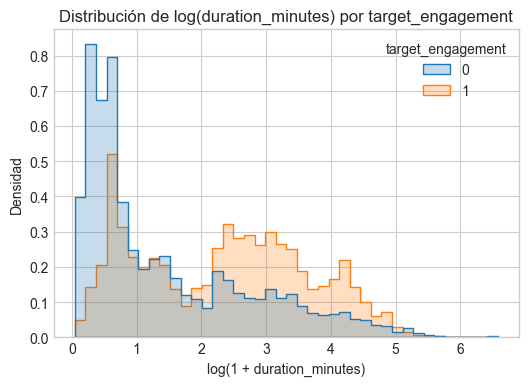

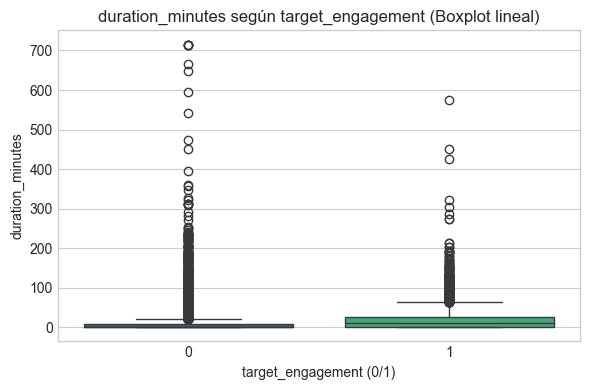

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=log_col, palette="magma")


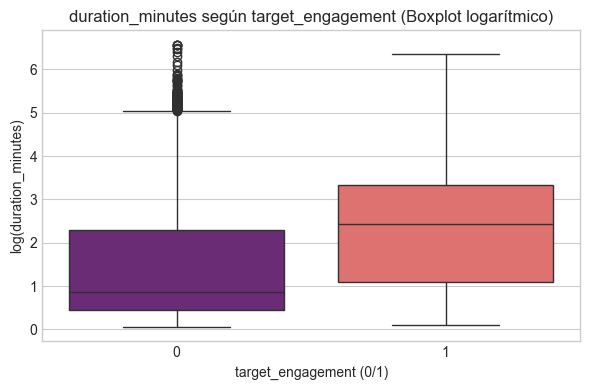

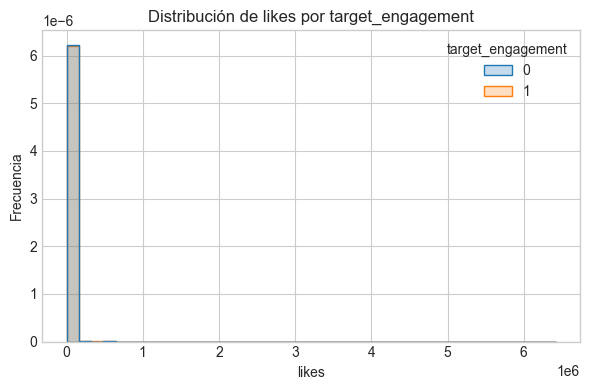

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=col, palette="viridis")


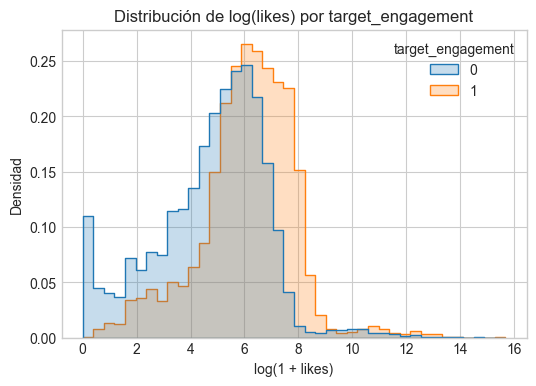

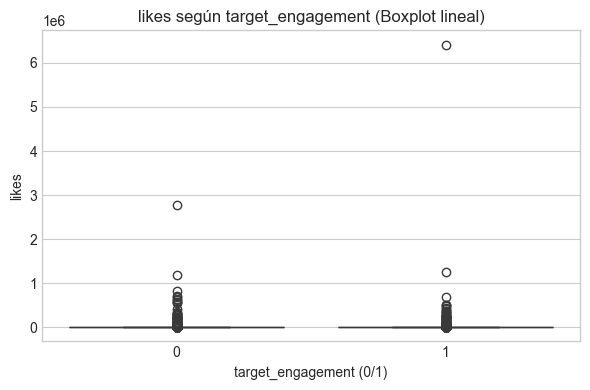

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=log_col, palette="magma")


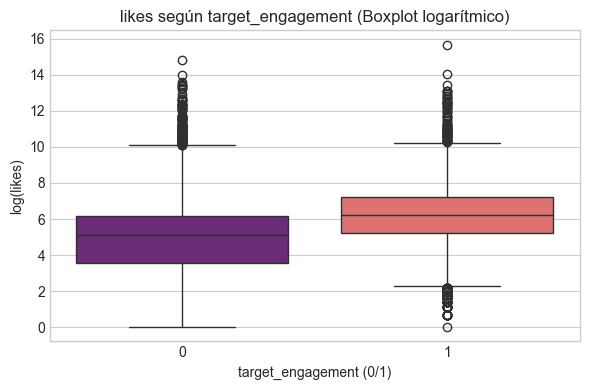

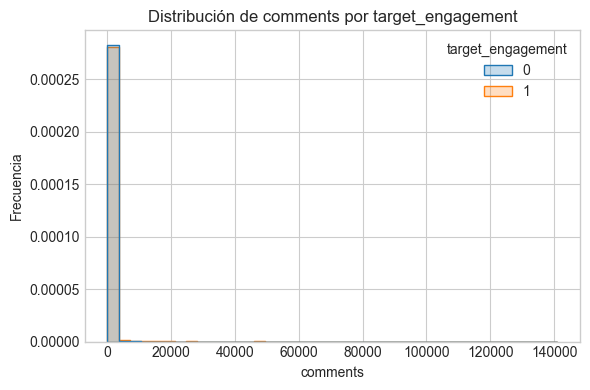

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=col, palette="viridis")


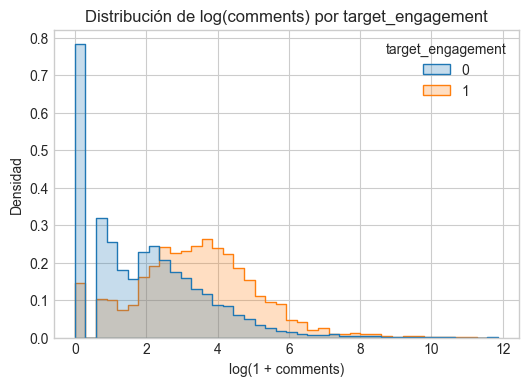

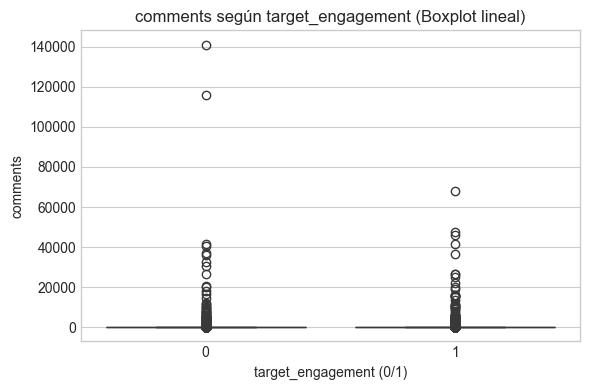

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=log_col, palette="magma")


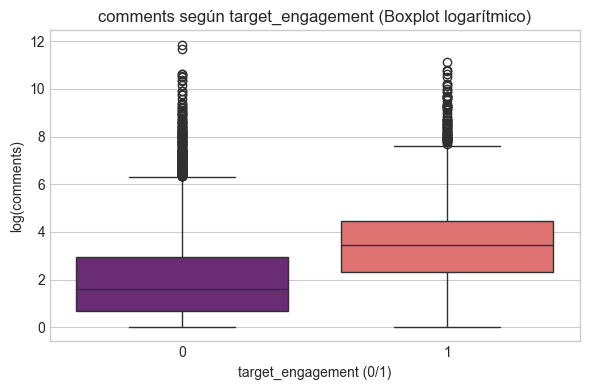

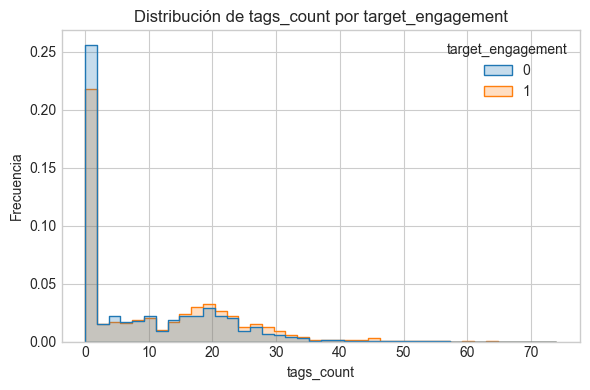

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=col, palette="viridis")


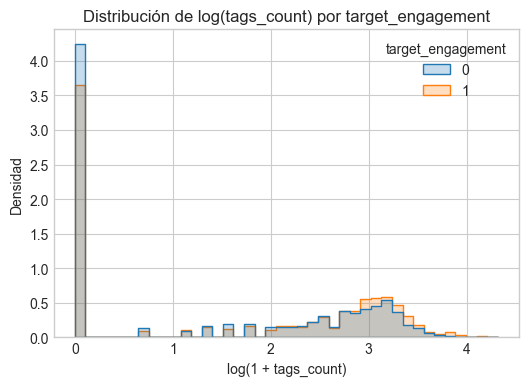

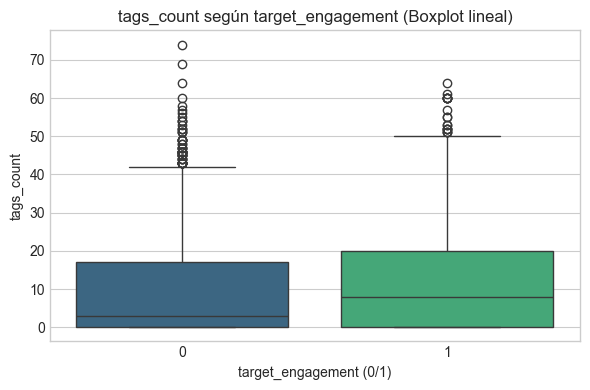

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=log_col, palette="magma")


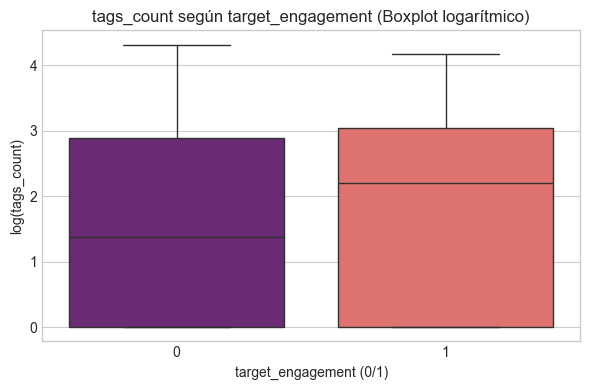

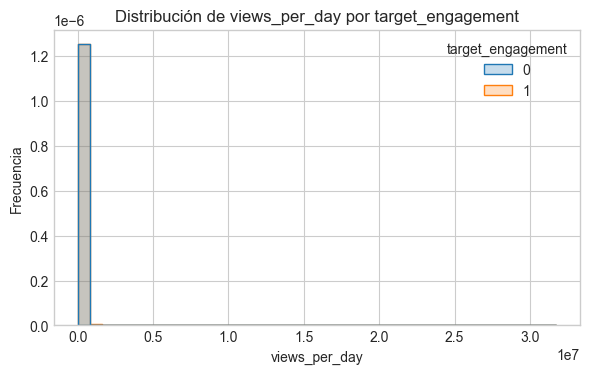

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=col, palette="viridis")


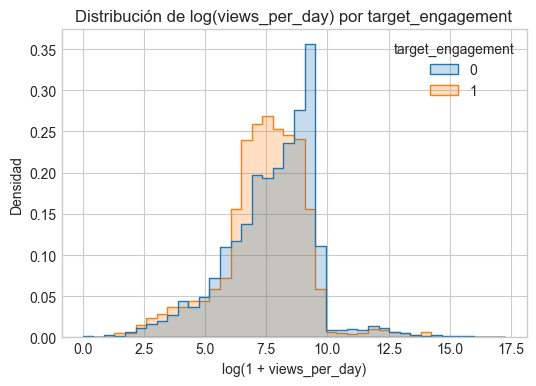

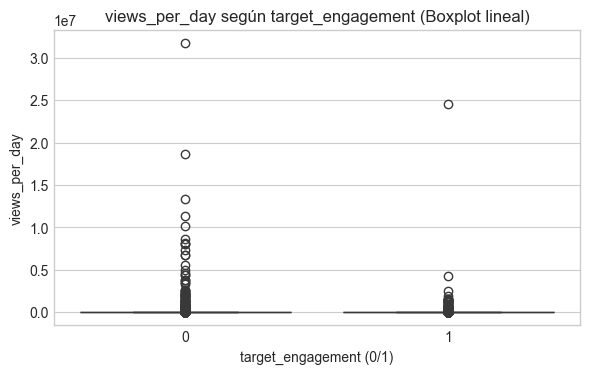

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=log_col, palette="magma")


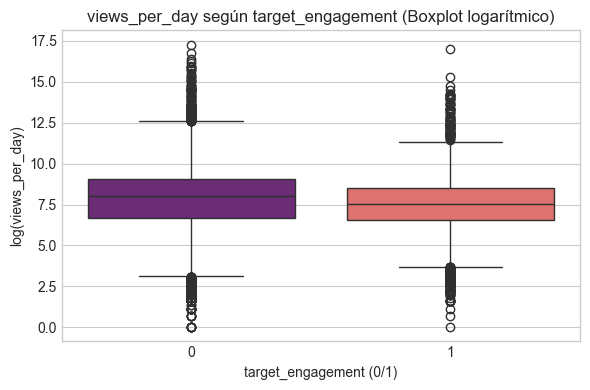

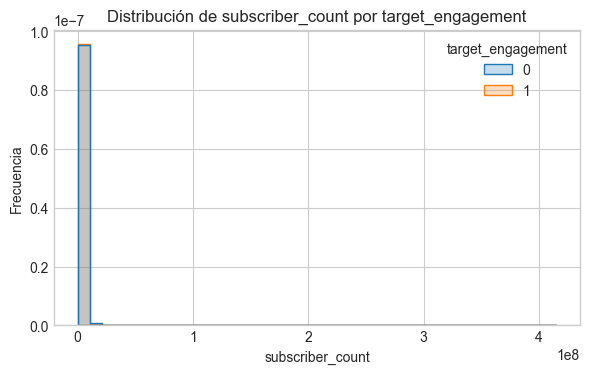

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=col, palette="viridis")


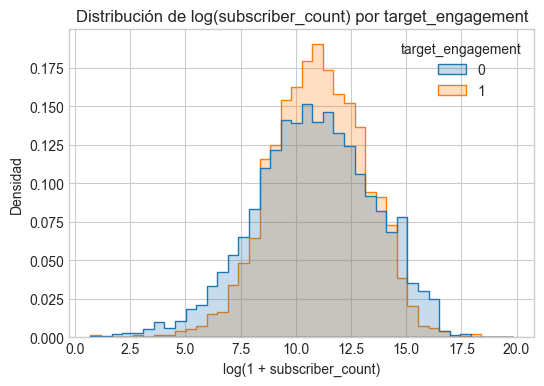

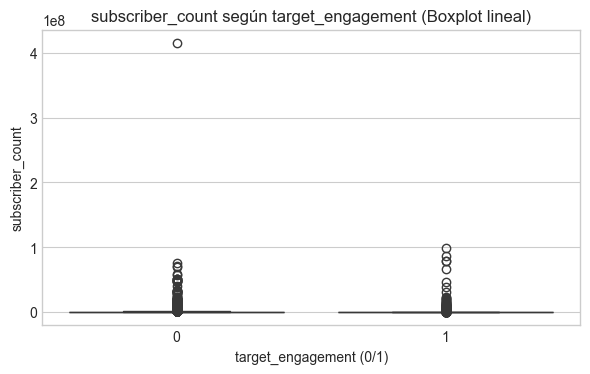

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=log_col, palette="magma")


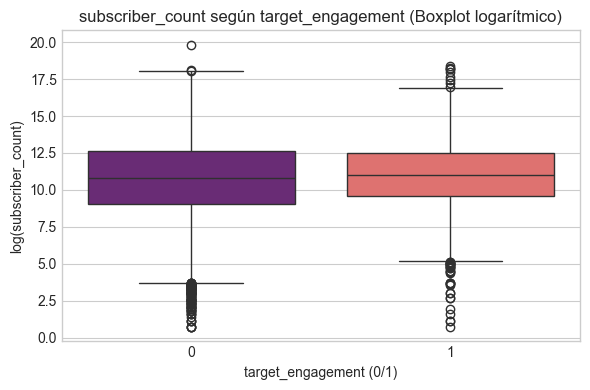

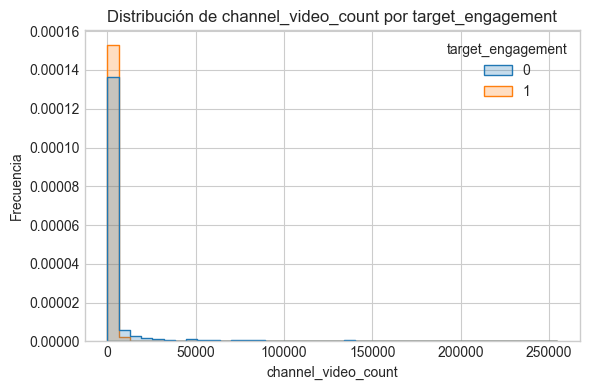

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=col, palette="viridis")


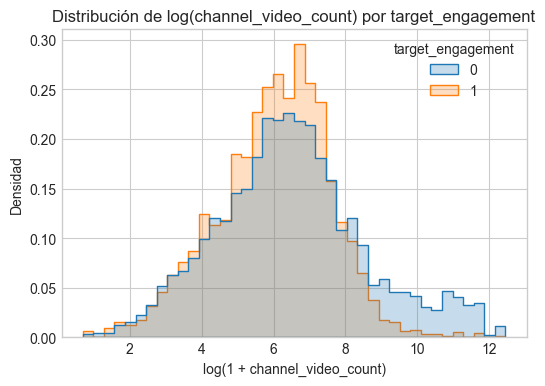

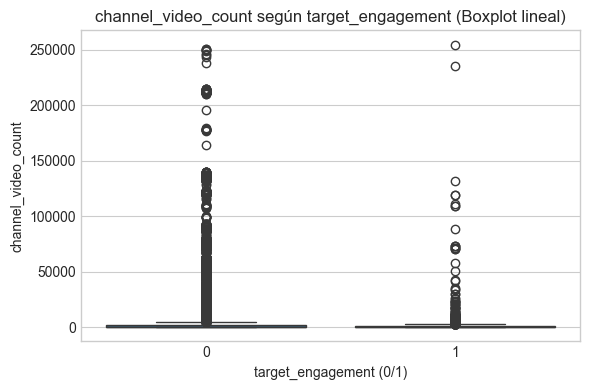

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=log_col, palette="magma")


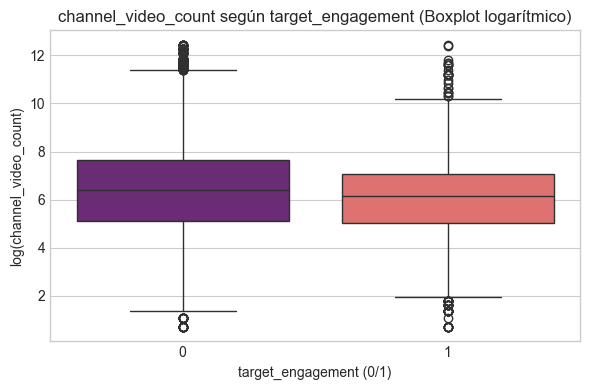

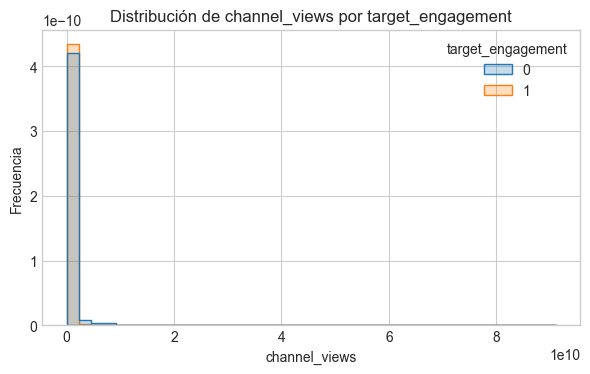

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=col, palette="viridis")


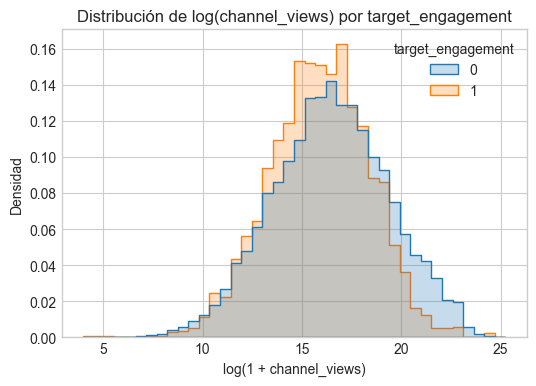

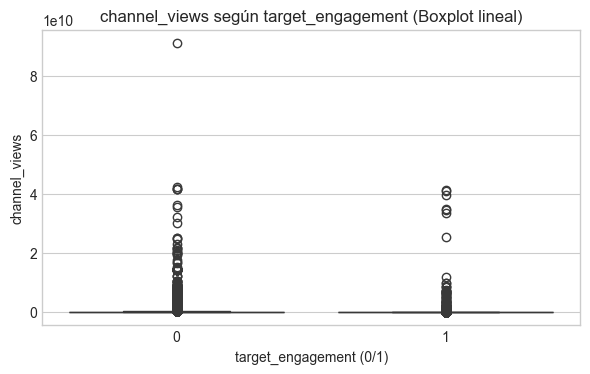

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=log_col, palette="magma")


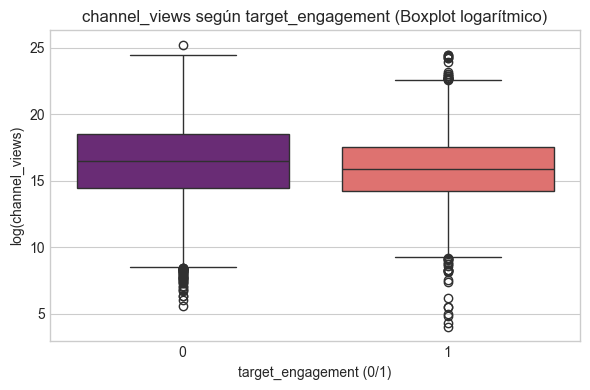

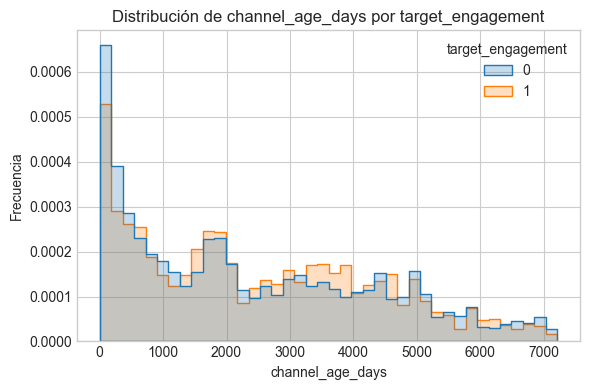

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=col, palette="viridis")


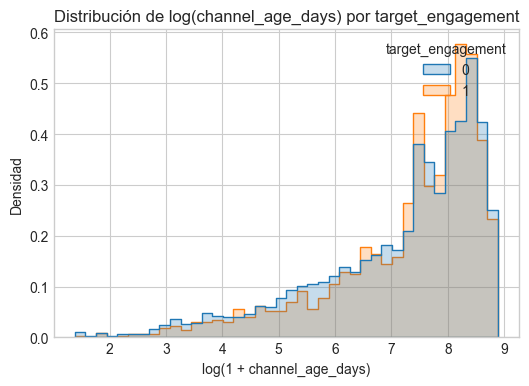

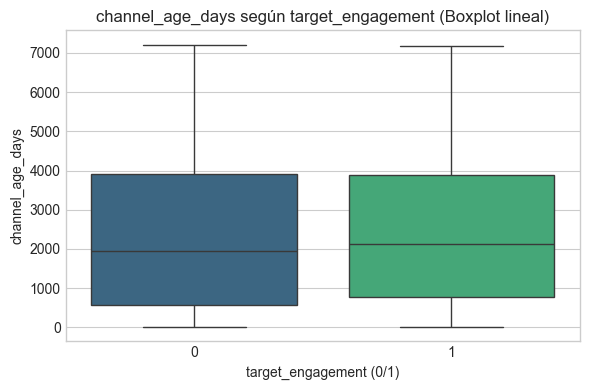

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=log_col, palette="magma")


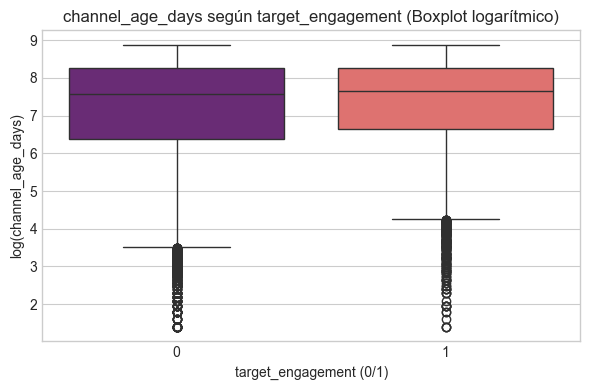

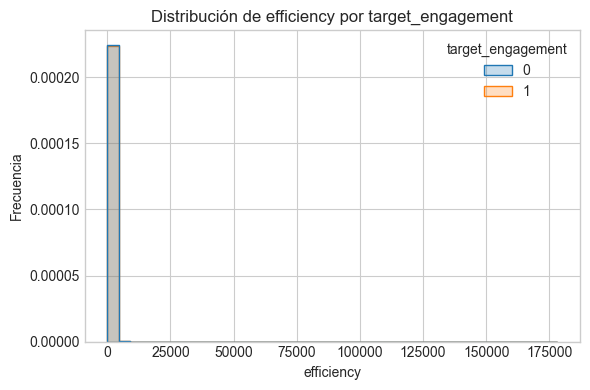

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=col, palette="viridis")


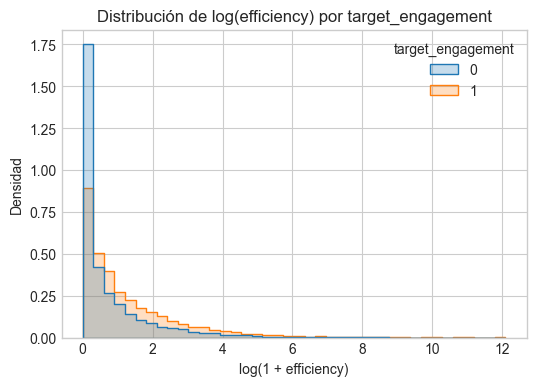

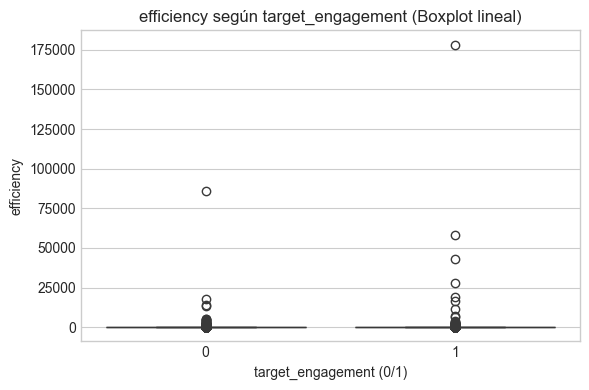

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=log_col, palette="magma")


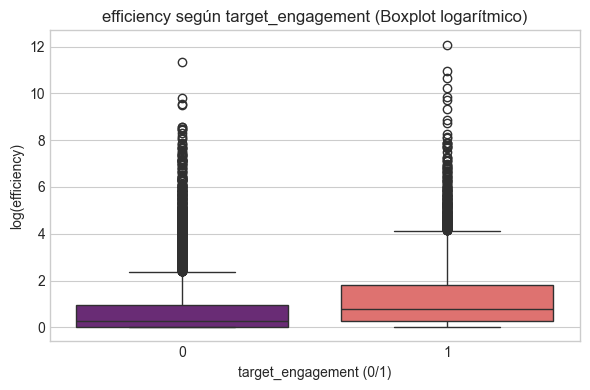

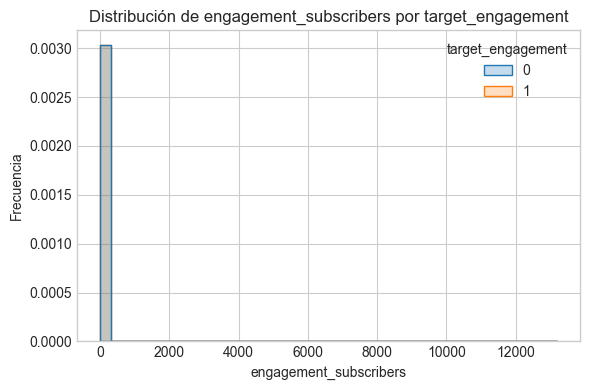

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=col, palette="viridis")


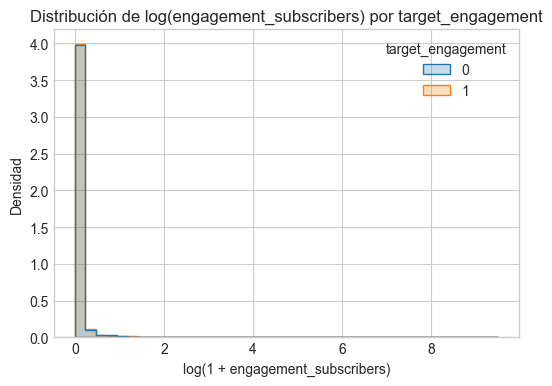

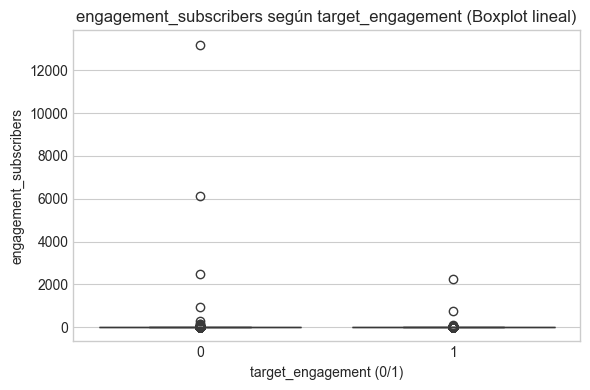

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=log_col, palette="magma")


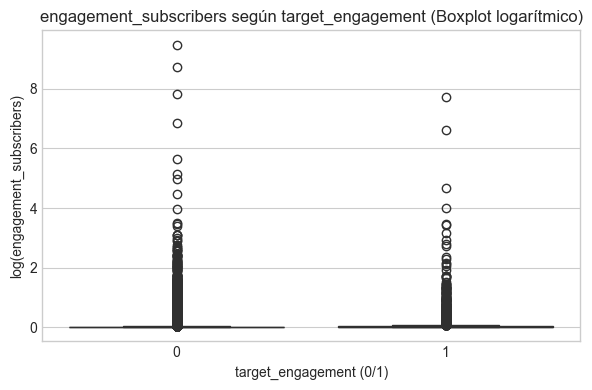

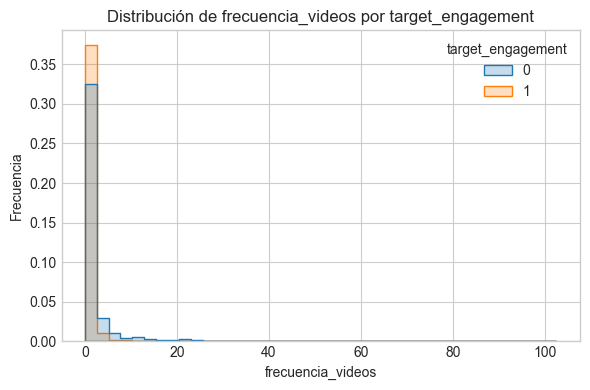

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=col, palette="viridis")


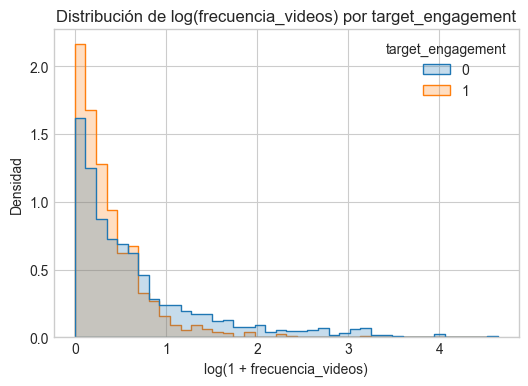

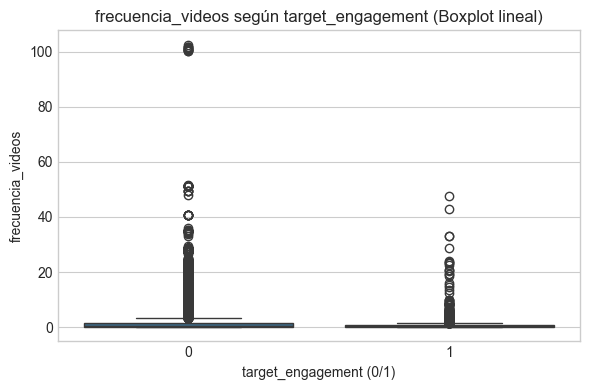

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=log_col, palette="magma")


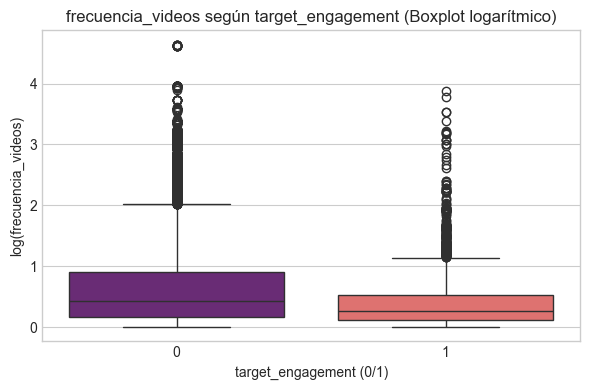

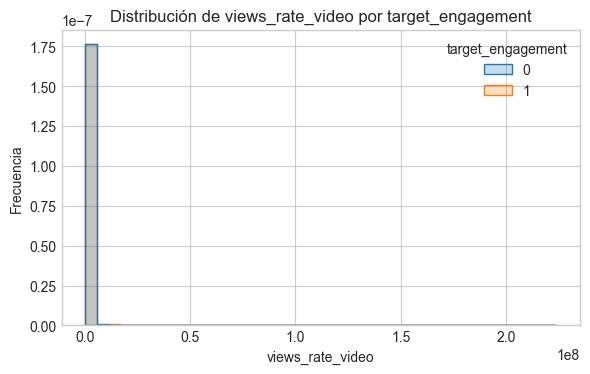

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=col, palette="viridis")


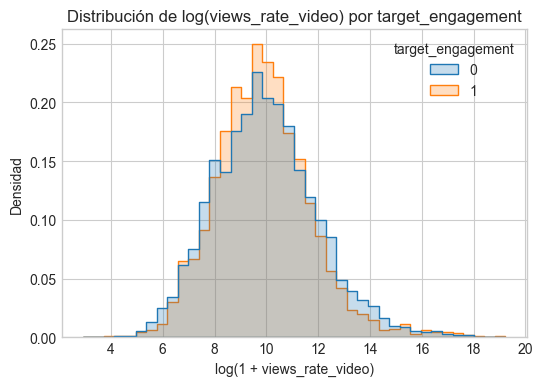

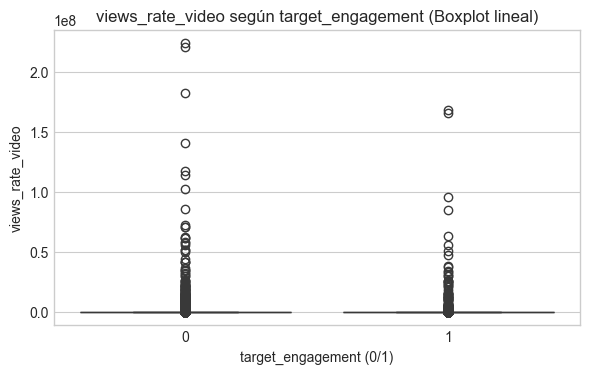

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=log_col, palette="magma")


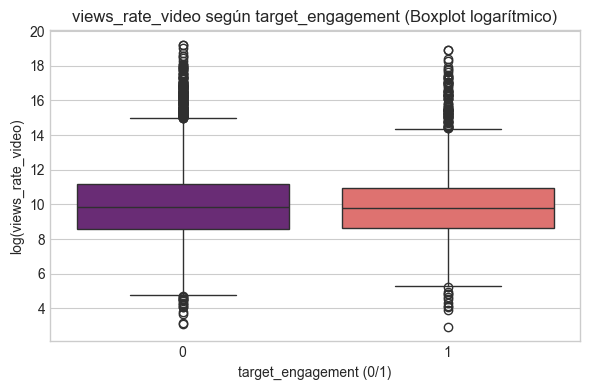

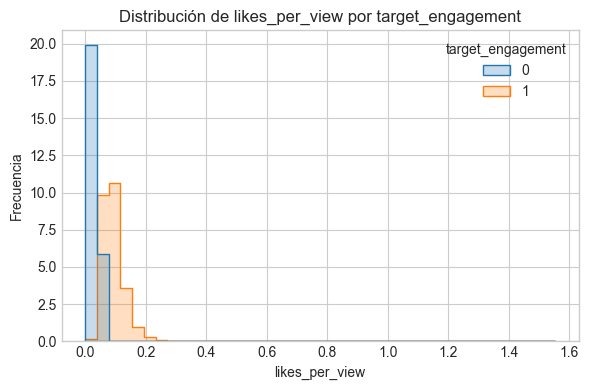

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=col, palette="viridis")


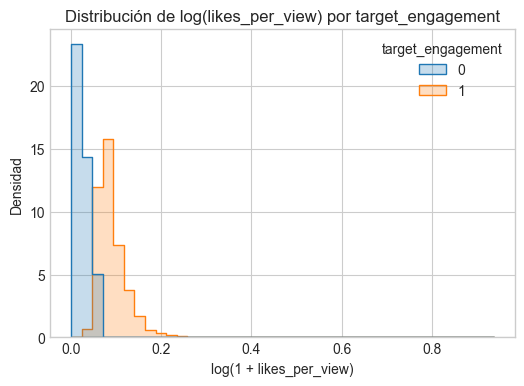

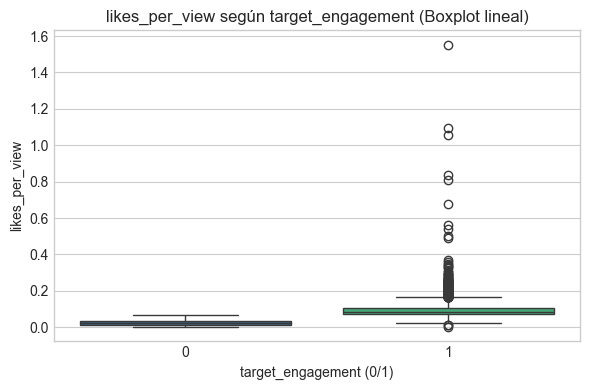

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=log_col, palette="magma")


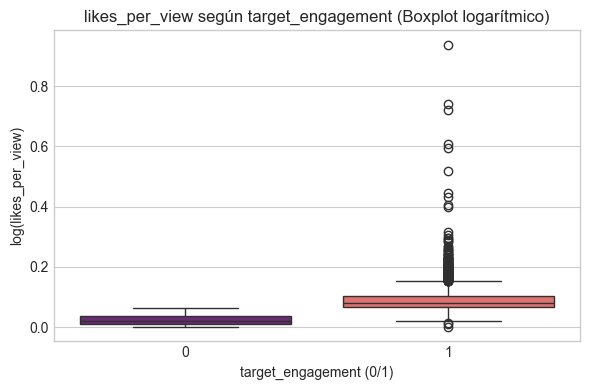

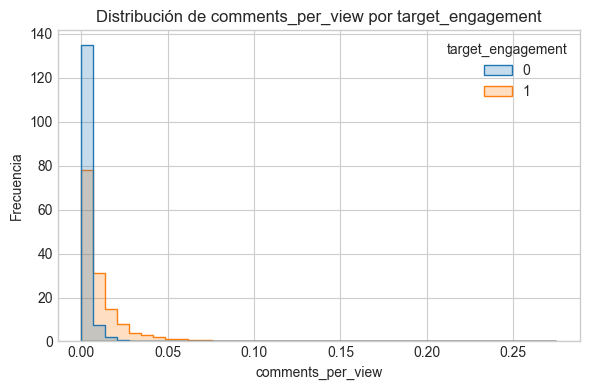

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=col, palette="viridis")


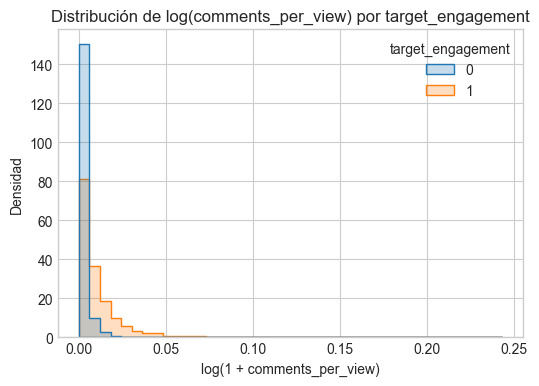

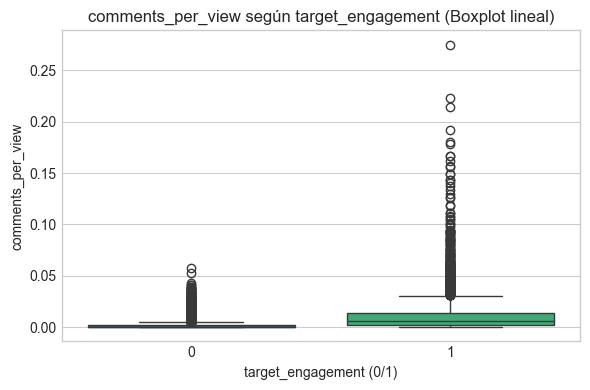

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/1099841440.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_engagement', y=log_col, palette="magma")


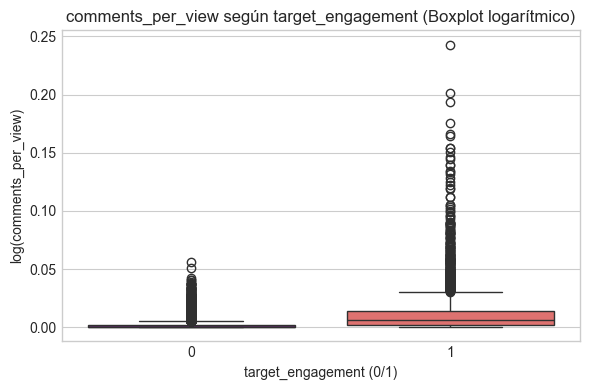

<Figure size 600x400 with 0 Axes>

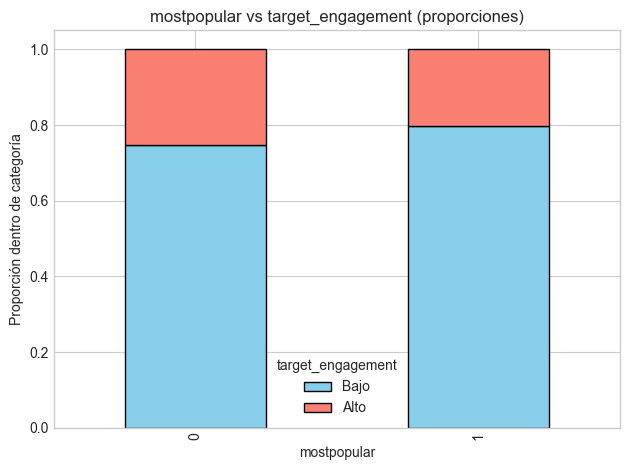

In [20]:
plt.style.use("seaborn-v0_8-whitegrid")

# 1) Lista base (sin incluir la meta)
num_cols_sin_target_engagement = [
    'duration_minutes', 'likes', 'comments', 'tags_count',
    'views_per_day', 'subscriber_count', 'channel_video_count',
    'channel_views', 'channel_age_days', 'efficiency',
    'engagement_subscribers', 'frecuencia_videos', 'views_rate_video',
    'likes_per_view', 'comments_per_view', 'mostpopular'  # binaria
]

# 2) Asegura tipos numéricos y crea versión log para CONTINUAS
df = df.copy()
df['target_engagement'] = pd.to_numeric(df['target_engagement'], errors='coerce').fillna(0).astype(int)
binarias = {'mostpopular'}  # aquí pon otras binarias si las añades


for col in num_cols_sin_target_engagement:
    if col not in binarias:
        s = pd.to_numeric(df[col], errors='coerce').clip(lower=0)
        df[f'{col}_log'] = np.log1p(s)

# 3) Visualizaciones por variable
for col in num_cols_sin_target_engagement:

    if col in binarias:
        # ----- Caso binario: barras de proporciones por target -----
        plt.figure(figsize=(6,4))
        prop = (pd.crosstab(df[col], df['target_engagement'], normalize='index')
                  .rename(columns={0:'Bajo', 1:'Alto'}))
        prop.plot(kind='bar', stacked=True, color=['skyblue','salmon'], edgecolor='black')
        plt.title(f"{col} vs target_engagement (proporciones)")
        plt.xlabel(col)
        plt.ylabel("Proporción dentro de categoría")
        plt.legend(title='target_engagement')
        plt.tight_layout()
        plt.show()
        continue

    # ----- 1) Histograma por grupos (lineal) -----
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='target_engagement',
                 element='step', stat='density', common_norm=False, bins=40)
    plt.title(f"Distribución de {col} por target_engagement")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()


    # ----- 1) Histograma por grupos (lineal) -----
    log_col = f'{col}_log'
    plt.figure(figsize=(6,4))
    sns.histplot(
        data=df,
        x=log_col,                     # 👈 el log va en X
        hue='target_engagement',
        element='step',
        stat='density',
        common_norm=False,
        bins=40
    )
    plt.title(f"Distribución de log({col}) por target_engagement")
    plt.xlabel(f"log(1 + {col})")
    plt.ylabel("Densidad")
    plt.tight_layout

    # ----- 2) Boxplot (lineal) -----
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='target_engagement', y=col, palette="viridis")
    plt.title(f"{col} según target_engagement (Boxplot lineal)")
    plt.xlabel("target_engagement (0/1)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

    # ----- 3) Boxplot (logarítmico) -----
 
    if log_col in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df, x='target_engagement', y=log_col, palette="magma")
        plt.title(f"{col} según target_engagement (Boxplot logarítmico)")
        plt.xlabel("target_engagement (0/1)")
        plt.ylabel(f"log({col})")
        plt.tight_layout()
        plt.show()

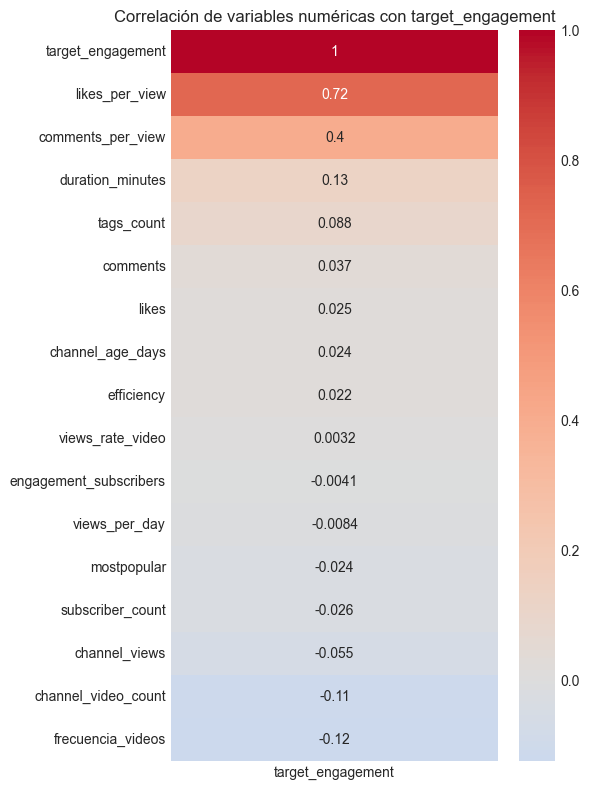

In [21]:
corr = df[num_cols_sin_target_engagement + ['target_engagement']].corr()

# Ordenamos las correlaciones con respecto a la meta
corr_target = corr[['target_engagement']].sort_values(by='target_engagement', ascending=False)

# Visualizamos con un heatmap
plt.figure(figsize=(6,8))
sns.heatmap(corr_target, annot=True, cmap='coolwarm', center=0)
plt.title("Correlación de variables numéricas con target_engagement")
plt.tight_layout()
plt.show()

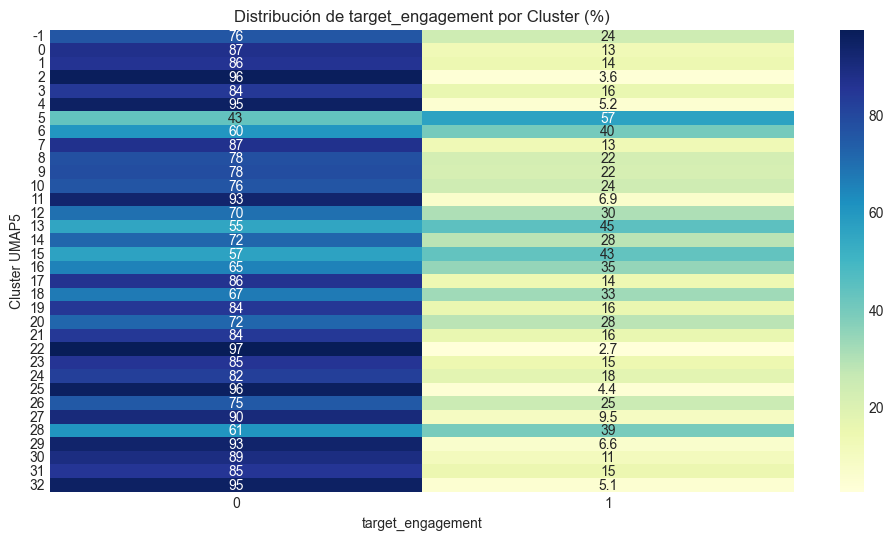

In [22]:
ct_target_engagement = pd.crosstab(df["cluster_umap5"], df["target_engagement"], normalize="index")*100

plt.figure(figsize=(12,6))
sns.heatmap(ct_target_engagement, annot=True, cmap="YlGnBu")
plt.title("Distribución de target_engagement por Cluster (%)")
plt.xlabel("target_engagement")
plt.ylabel("Cluster UMAP5")

# Forzar todos los labels de eje y como strings
plt.yticks(ticks=np.arange(len(ct_target_engagement.index))+0.5,
           labels=[str(x) for x in ct_target_engagement.index],
           rotation=0)

plt.show()

### 2.2.3 Mostpopular

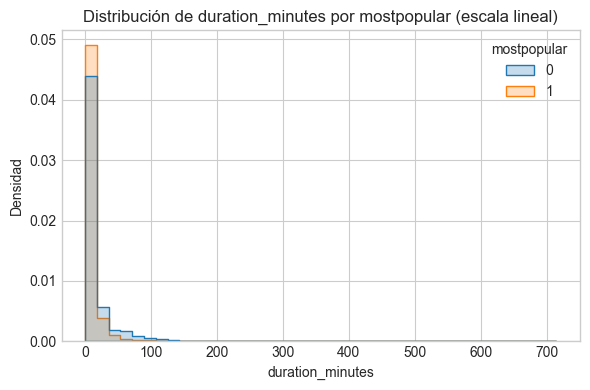

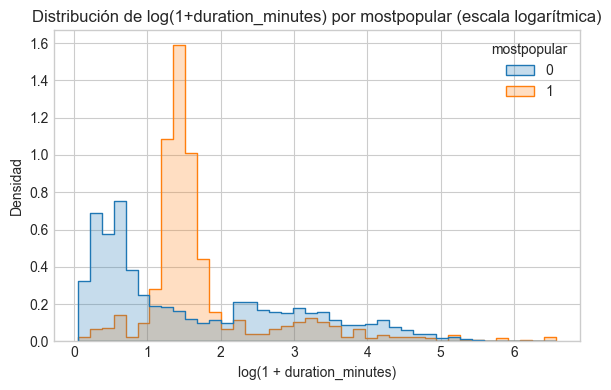

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=col, palette="viridis")


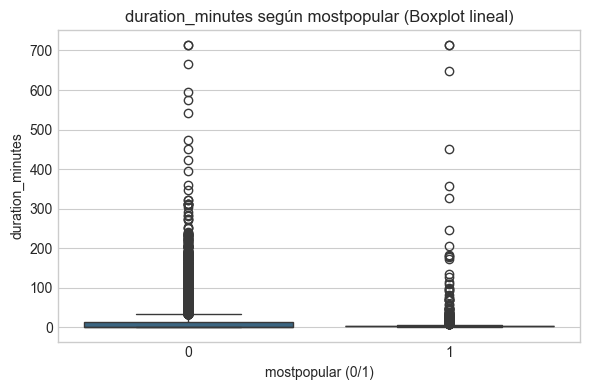

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=log_col, palette="magma")


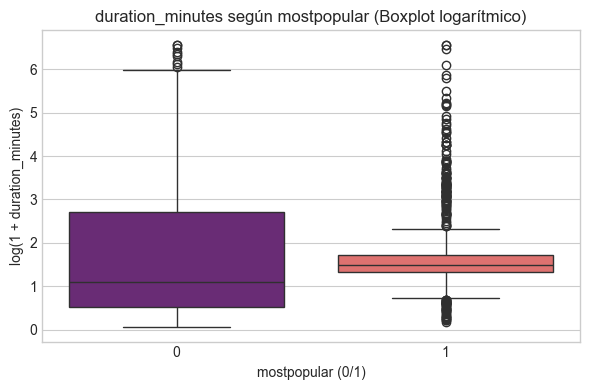

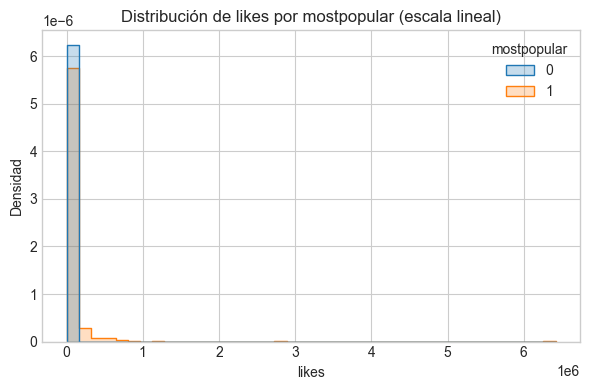

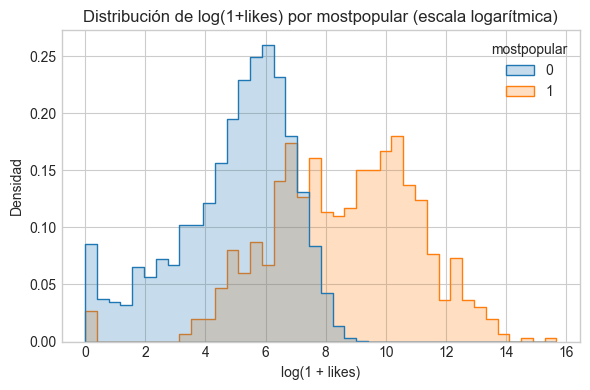

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=col, palette="viridis")


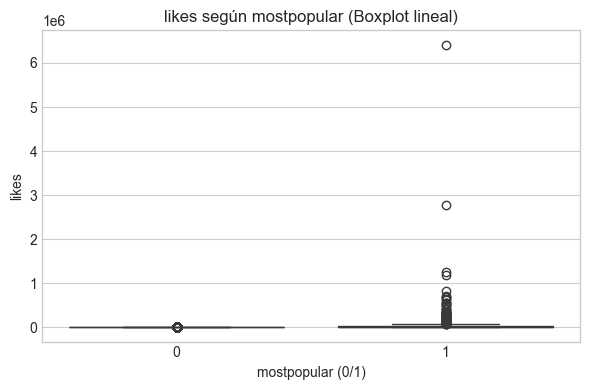

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=log_col, palette="magma")


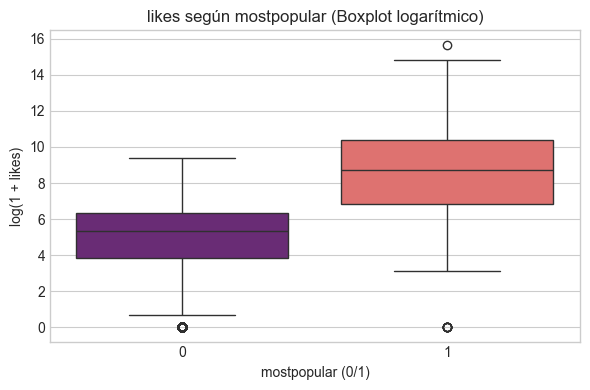

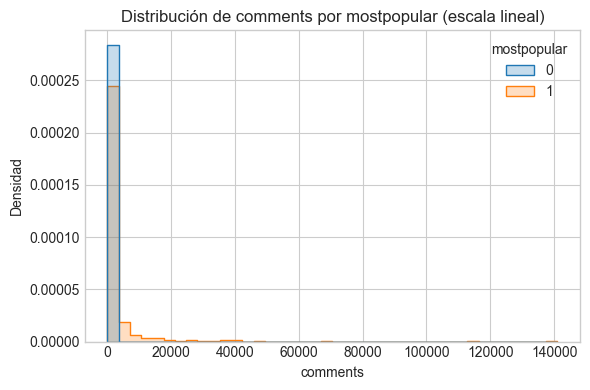

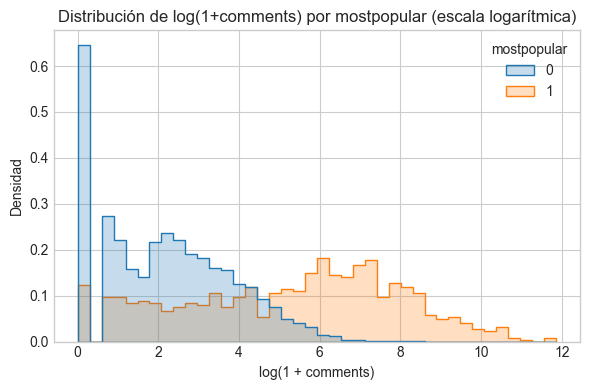

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=col, palette="viridis")


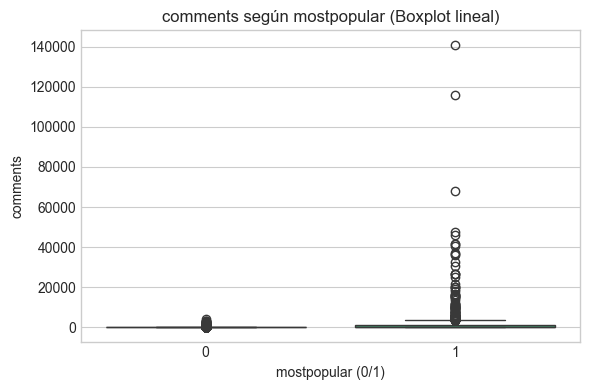

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=log_col, palette="magma")


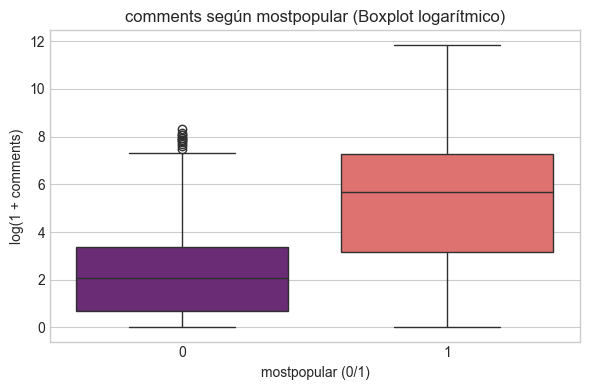

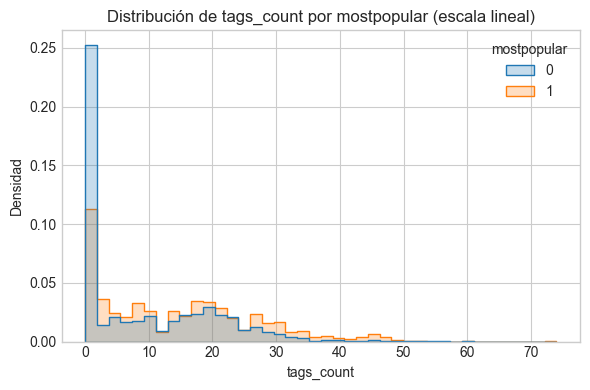

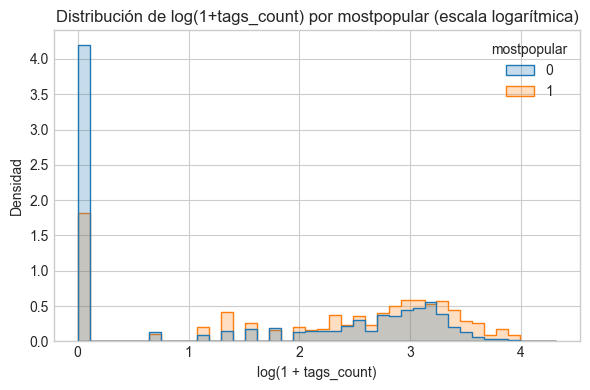

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=col, palette="viridis")


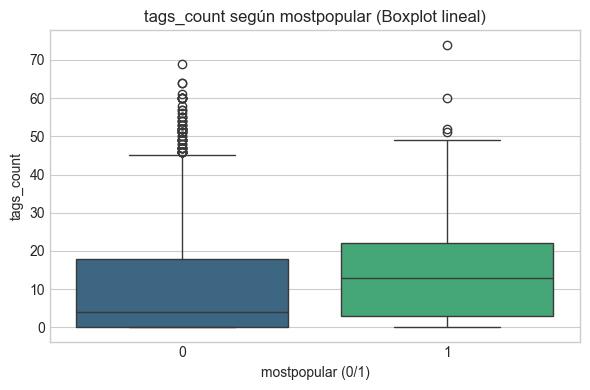

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=log_col, palette="magma")


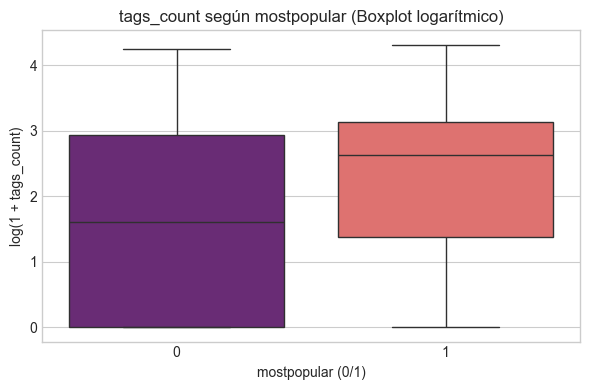

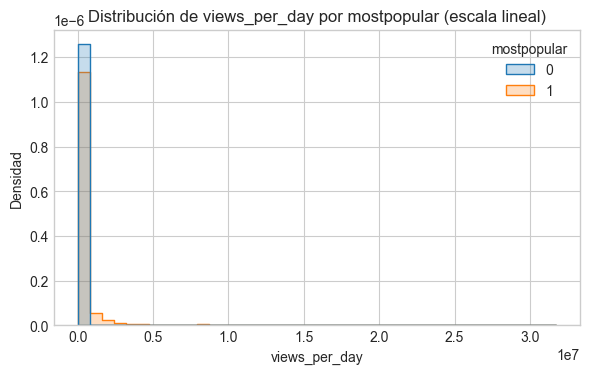

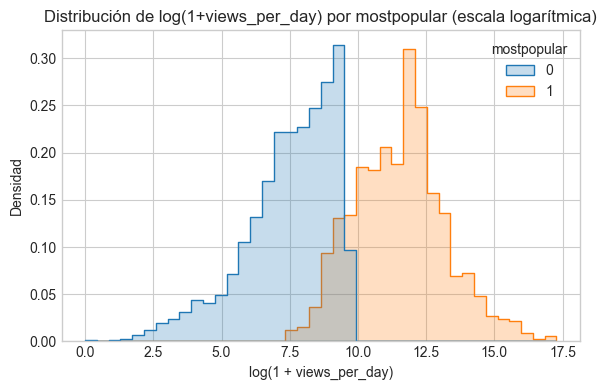

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=col, palette="viridis")


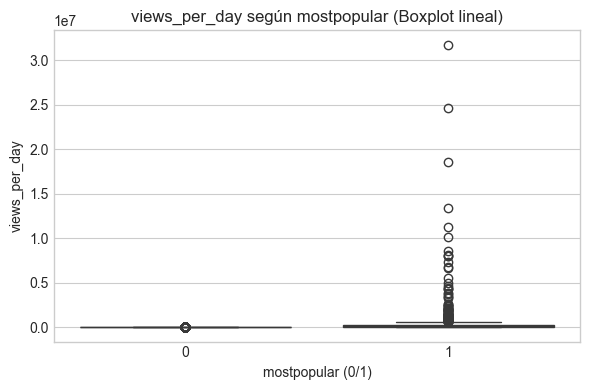

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=log_col, palette="magma")


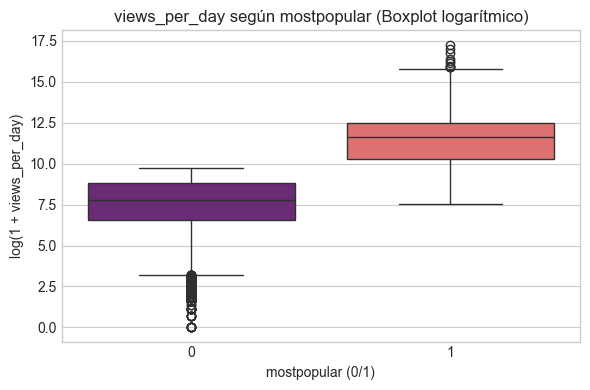

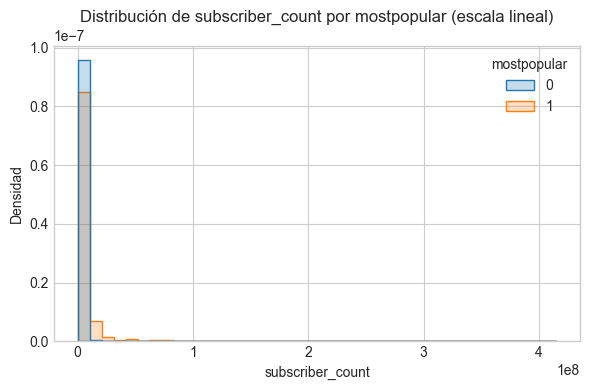

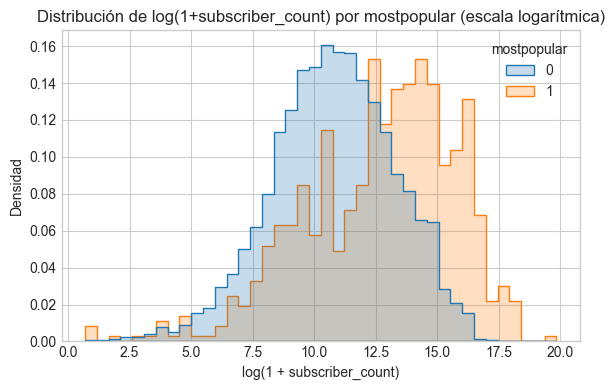

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=col, palette="viridis")


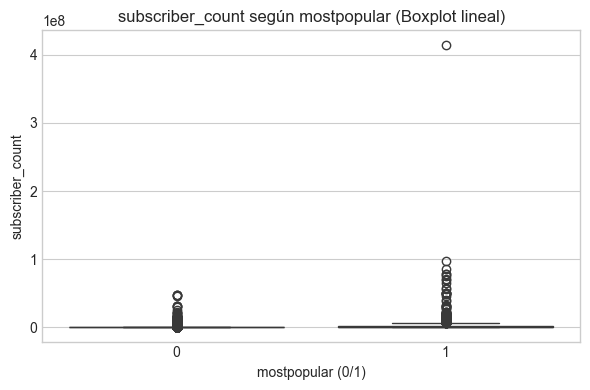

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=log_col, palette="magma")


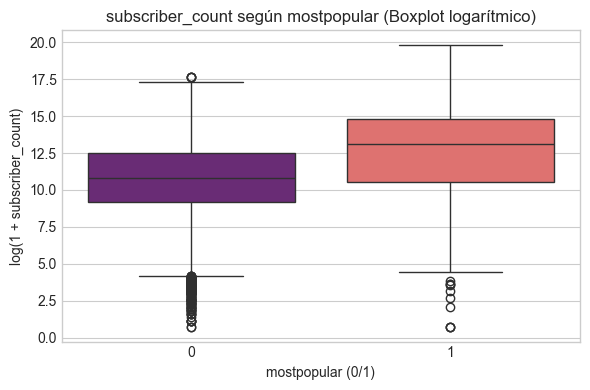

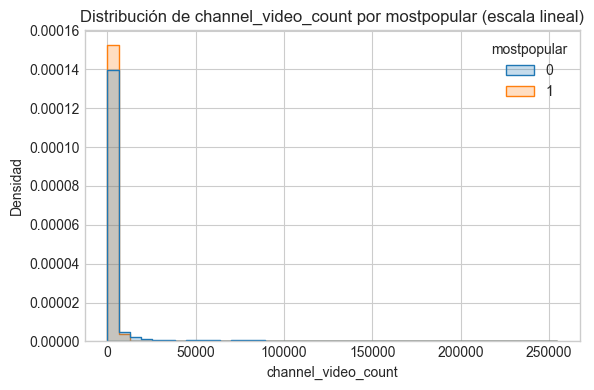

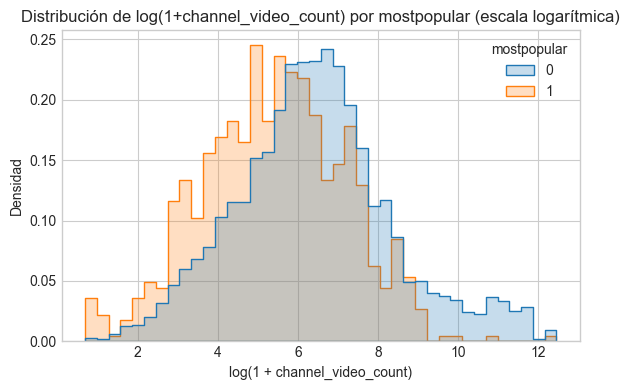

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=col, palette="viridis")


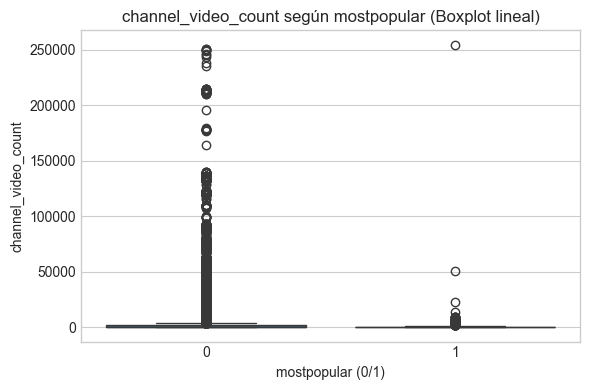

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=log_col, palette="magma")


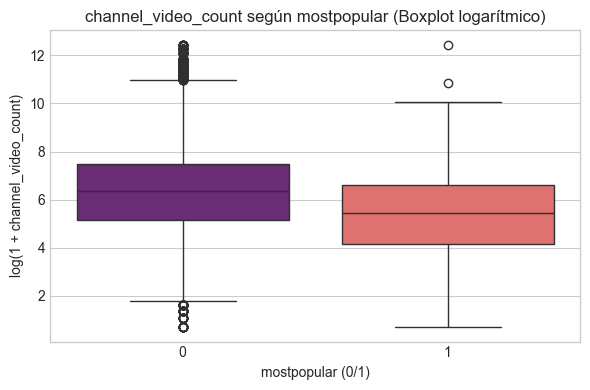

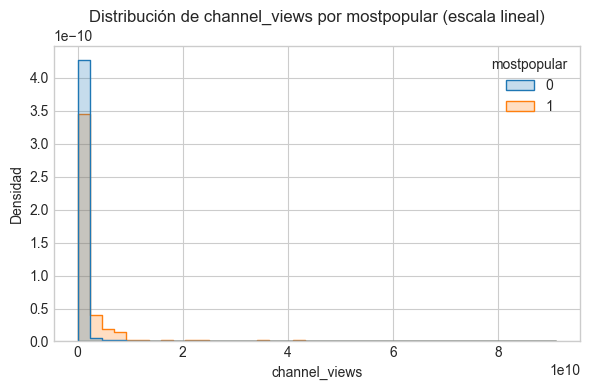

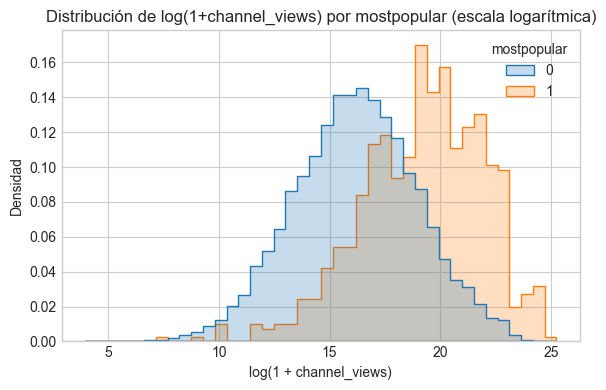

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=col, palette="viridis")


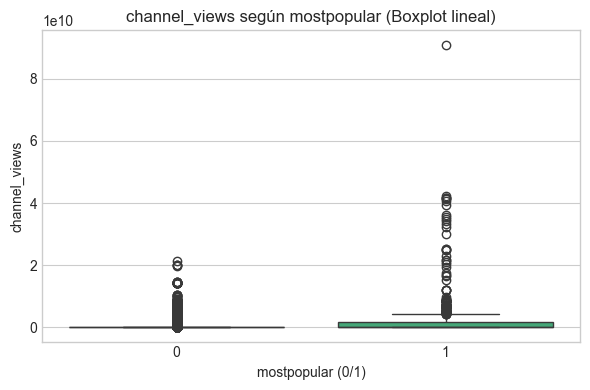

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=log_col, palette="magma")


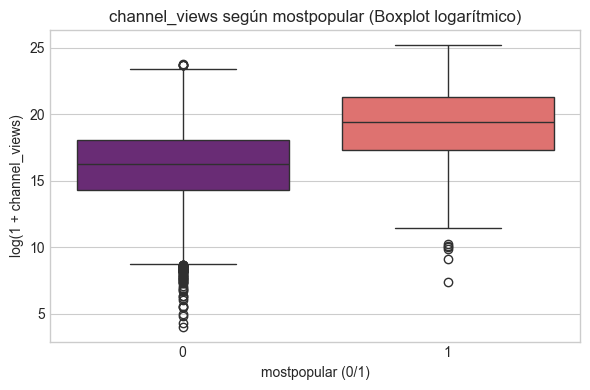

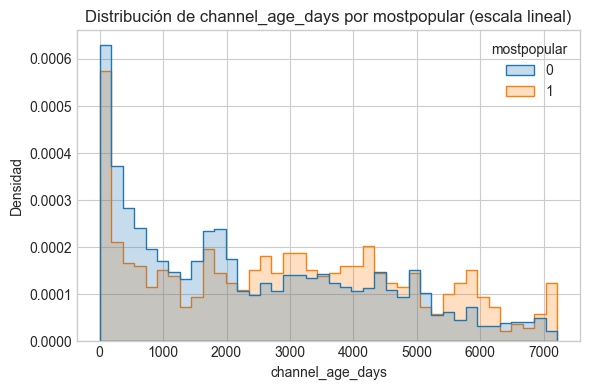

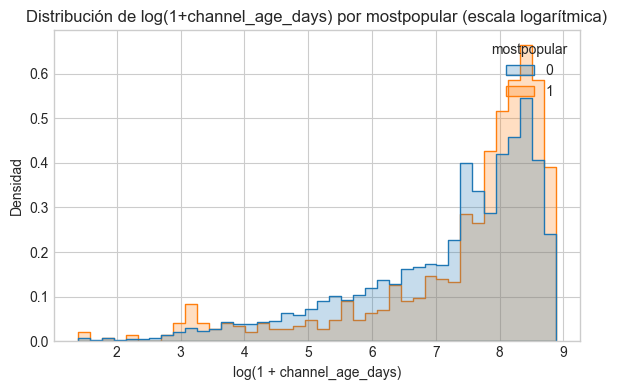

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=col, palette="viridis")


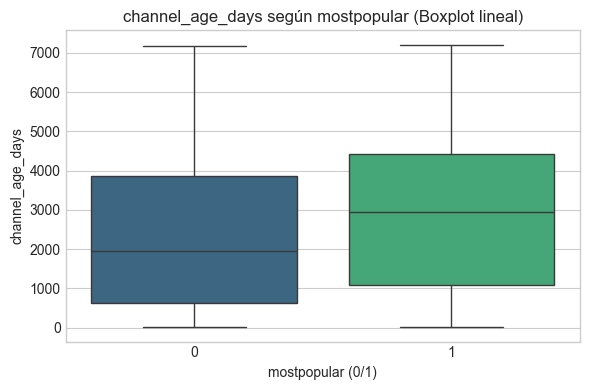

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=log_col, palette="magma")


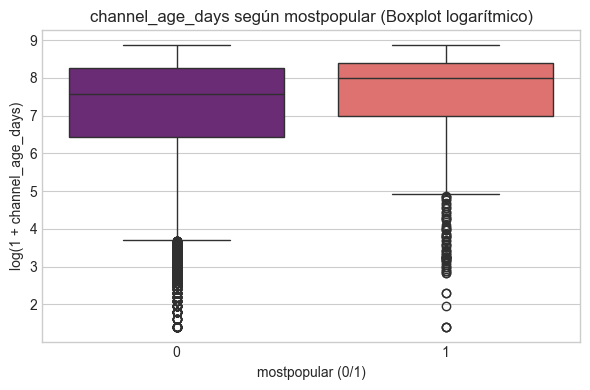

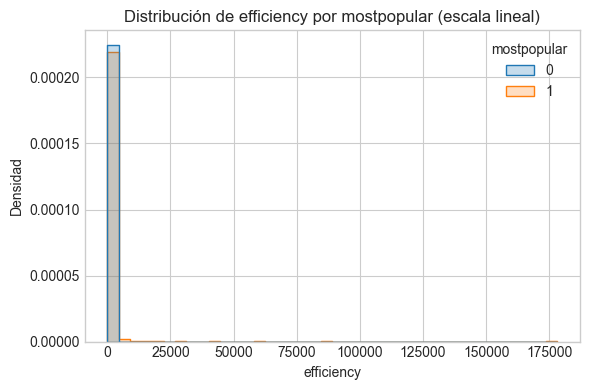

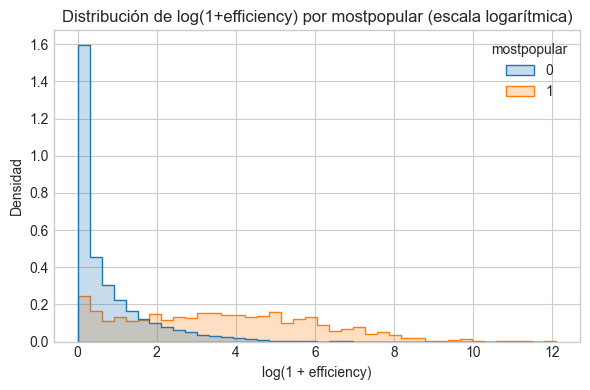

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=col, palette="viridis")


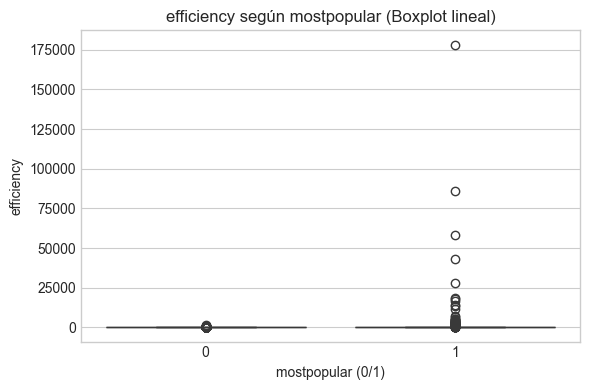

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=log_col, palette="magma")


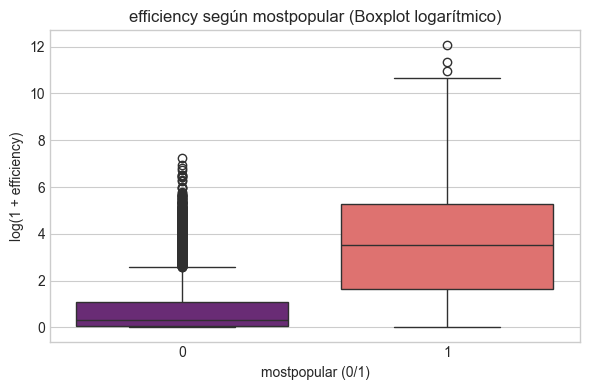

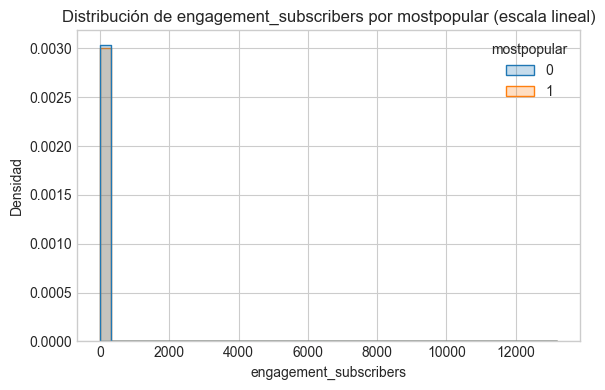

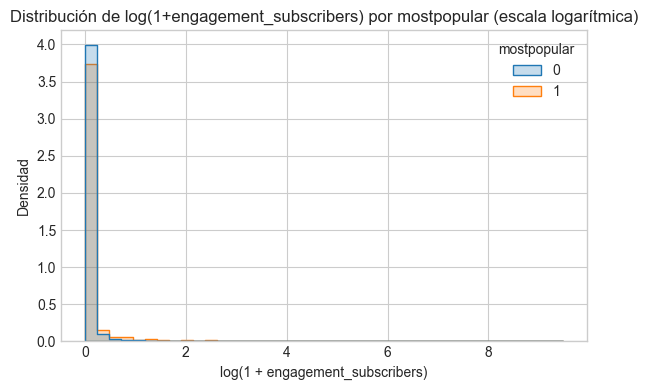

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=col, palette="viridis")


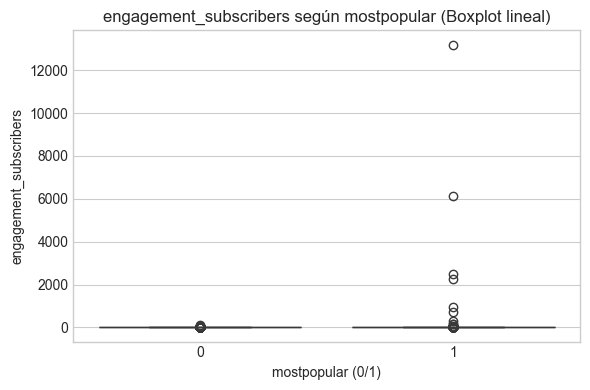

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=log_col, palette="magma")


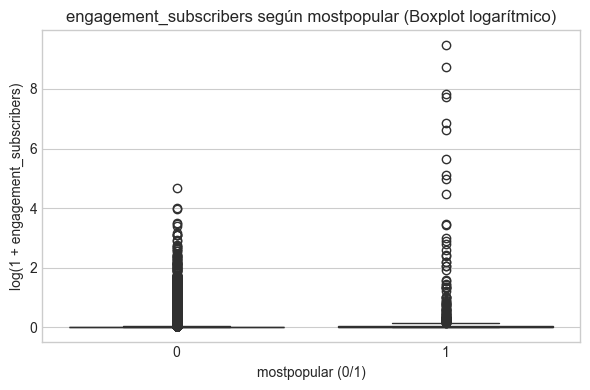

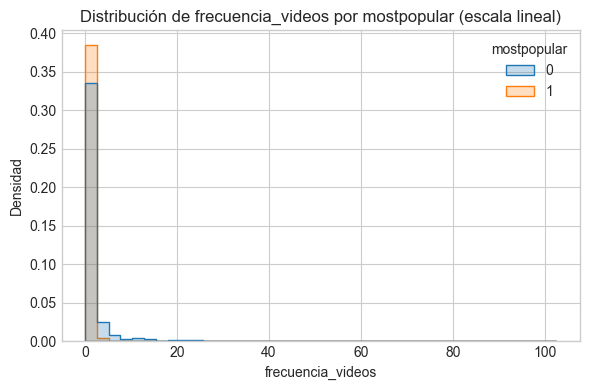

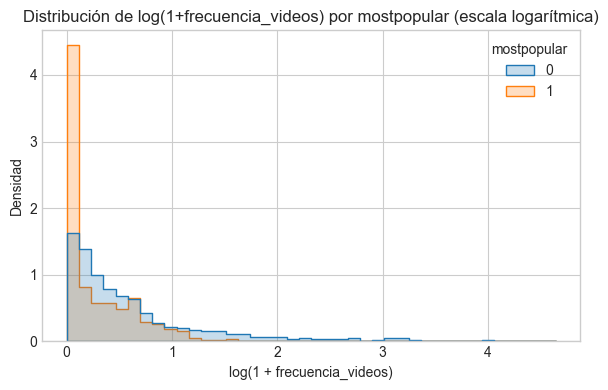

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=col, palette="viridis")


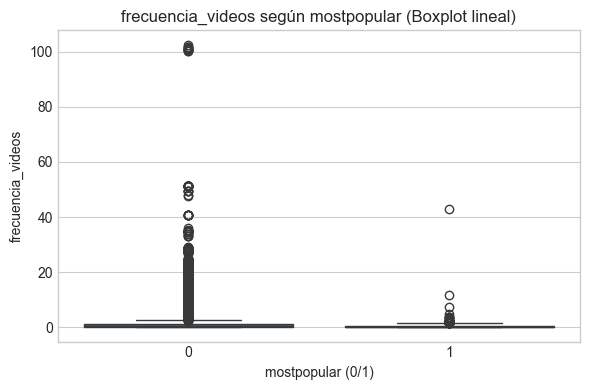

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=log_col, palette="magma")


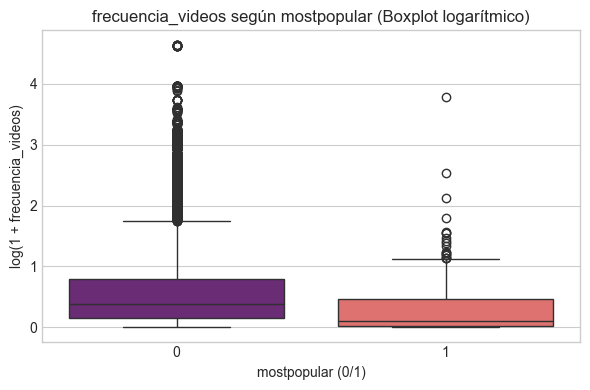

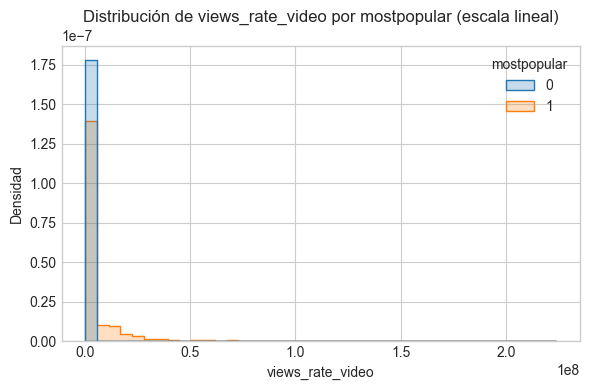

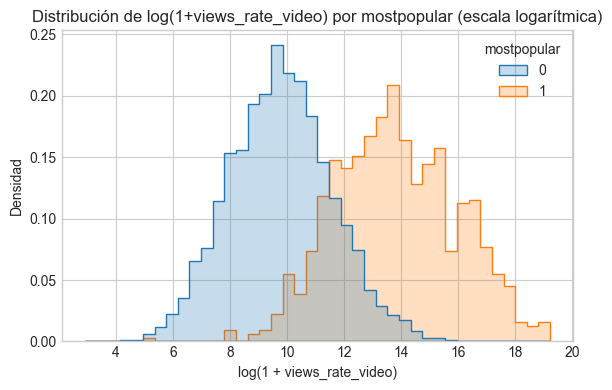

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=col, palette="viridis")


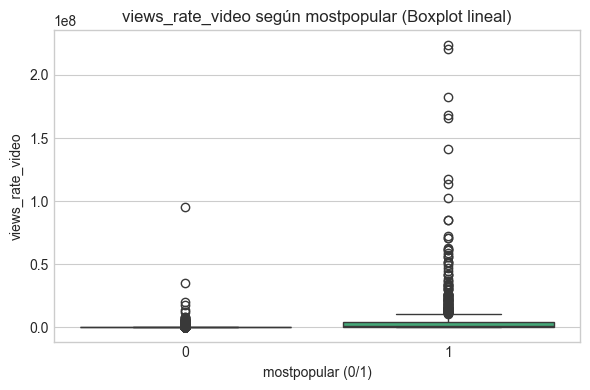

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=log_col, palette="magma")


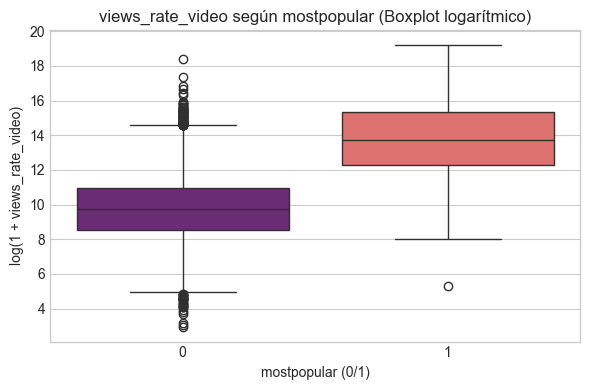

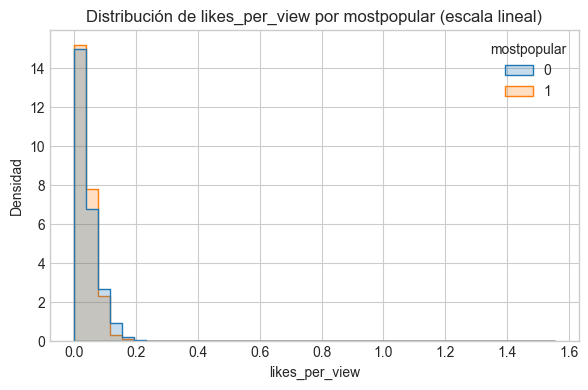

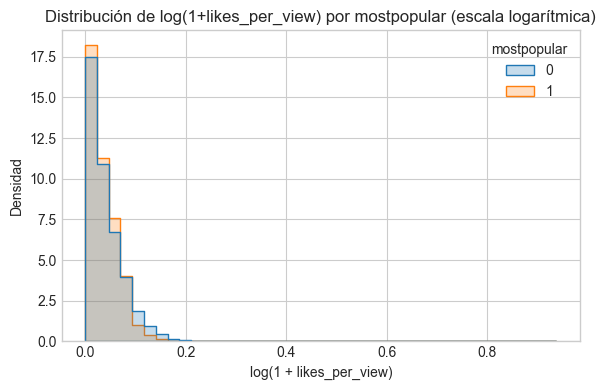

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=col, palette="viridis")


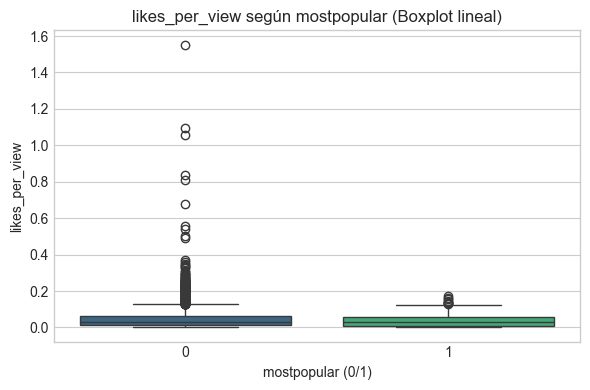

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=log_col, palette="magma")


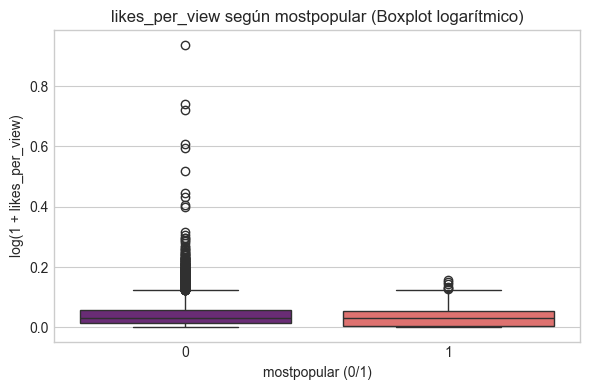

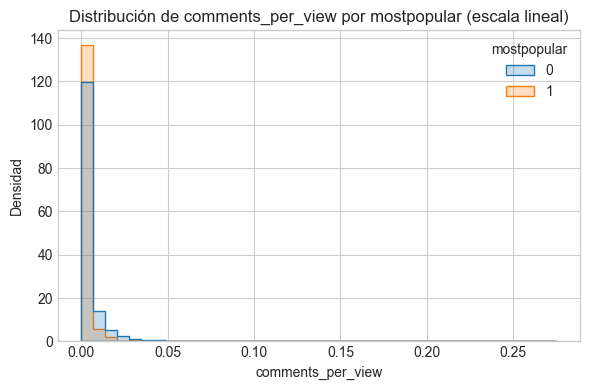

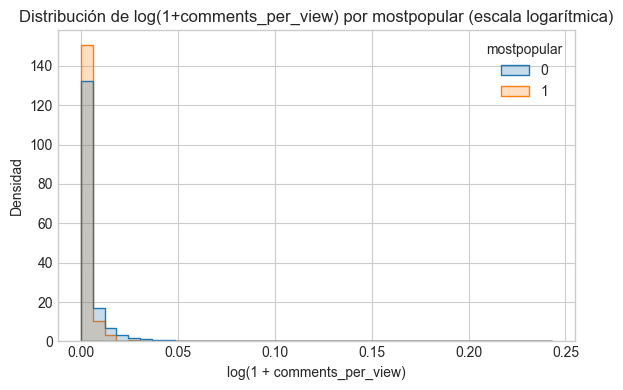

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=col, palette="viridis")


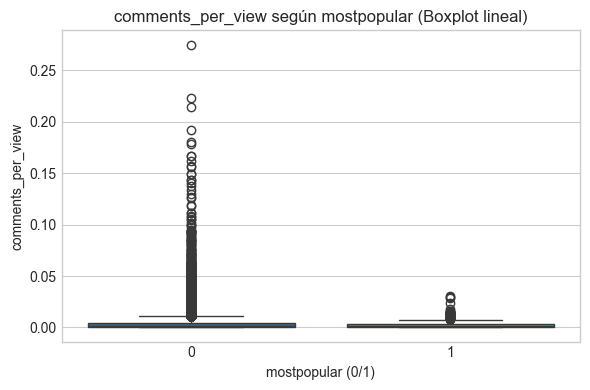

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_264/3214696724.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mostpopular', y=log_col, palette="magma")


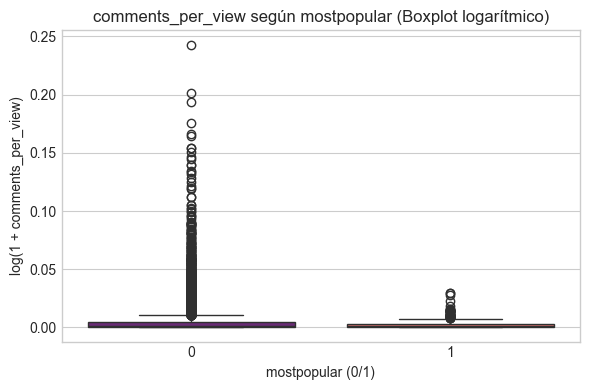

<Figure size 600x400 with 0 Axes>

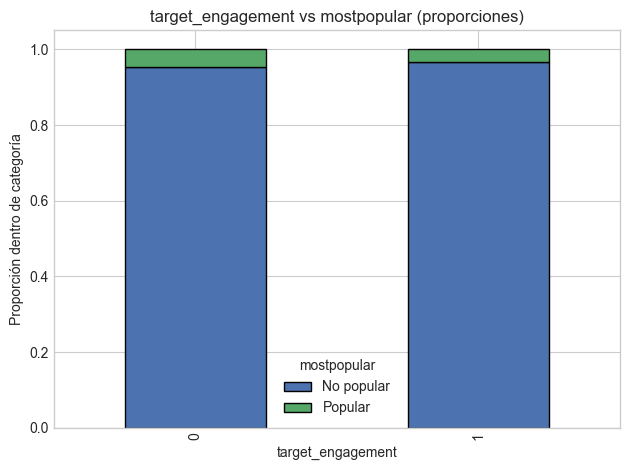

In [23]:
plt.style.use("seaborn-v0_8-whitegrid")

# 1) Lista de predictoras (SIN incluir la meta 'mostpopular')
num_cols_sin_mostpopular = [
    'duration_minutes', 'likes', 'comments', 'tags_count',
    'views_per_day', 'subscriber_count', 'channel_video_count',
    'channel_views', 'channel_age_days', 'efficiency',
    'engagement_subscribers', 'frecuencia_videos', 'views_rate_video',
    'likes_per_view', 'comments_per_view', 'target_engagement'  # binaria como predictora
]

# 2) Asegura tipos y crea versión log SOLO para continuas# 2) Limpieza y creación de variables logarítmicas
df = df.copy()
df['mostpopular'] = pd.to_numeric(df['mostpopular'], errors='coerce').fillna(0).astype(int)
df['target_engagement'] = pd.to_numeric(df['target_engagement'], errors='coerce').fillna(0).astype(int)

# Variables binarias (no se transforman en log)
binarias_pred = {'target_engagement'}

for col in num_cols_sin_mostpopular:
    if col not in binarias_pred:
        s = pd.to_numeric(df[col], errors='coerce').clip(lower=0)
        df[f'{col}_log'] = np.log1p(s)

# 3) Visualizaciones por variable
for col in num_cols_sin_mostpopular:

    if col in binarias_pred:
        # --- Gráfico de proporciones para variables binarias ---
        plt.figure(figsize=(6,4))
        prop = (
            pd.crosstab(df[col], df['mostpopular'], normalize='index')
            .rename(columns={0:'No popular', 1:'Popular'})
        )
        prop.plot(
            kind='bar', stacked=True,
            color=['#4C72B0', '#55A868'],  # azul / verde
            edgecolor='black'
        )
        plt.title(f"{col} vs mostpopular (proporciones)")
        plt.xlabel(col)
        plt.ylabel("Proporción dentro de categoría")
        plt.legend(title='mostpopular', labels=['No popular', 'Popular'])
        plt.tight_layout()
        plt.show()
        continue

    # --- (1) Histograma lineal ---
    plt.figure(figsize=(6,4))
    sns.histplot(
        data=df,
        x=col,
        hue='mostpopular',
        element='step',
        stat='density',
        common_norm=False,
        bins=40
    )
    plt.title(f"Distribución de {col} por mostpopular (escala lineal)")
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.tight_layout()
    plt.show()

    # --- (2) Histograma logarítmico ---
    log_col = f'{col}_log'
    if log_col in df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(
            data=df,
            x=log_col,
            hue='mostpopular',
            element='step',
            stat='density',
            common_norm=False,
            bins=40
        )
        plt.title(f"Distribución de log(1+{col}) por mostpopular (escala logarítmica)")
        plt.xlabel(f"log(1 + {col})")
        plt.ylabel("Densidad")
        plt.tight_layout()
        plt.show()

    # --- (3) Boxplot lineal ---
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='mostpopular', y=col, palette="viridis")
    plt.title(f"{col} según mostpopular (Boxplot lineal)")
    plt.xlabel("mostpopular (0/1)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

    # --- (4) Boxplot logarítmico ---
    if log_col in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df, x='mostpopular', y=log_col, palette="magma")
        plt.title(f"{col} según mostpopular (Boxplot logarítmico)")
        plt.xlabel("mostpopular (0/1)")
        plt.ylabel(f"log(1 + {col})")
        plt.tight_layout()
        plt.show()

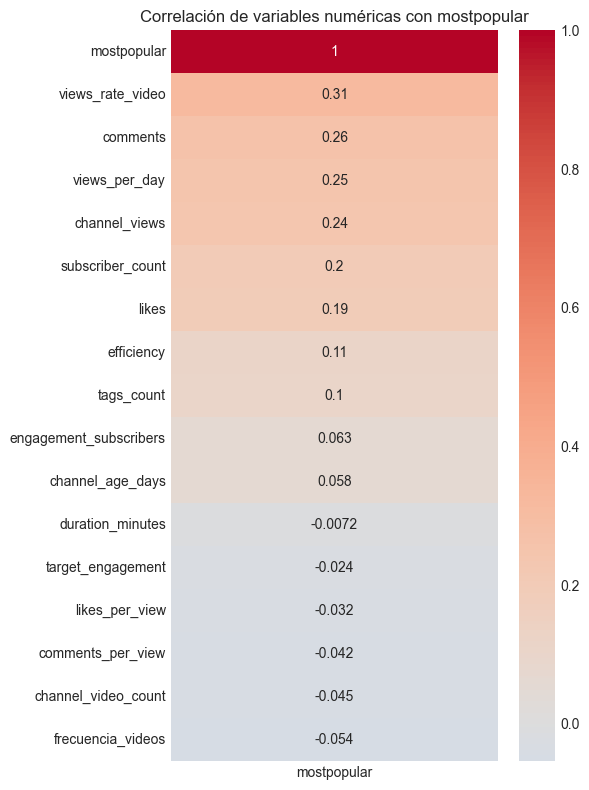

In [24]:
# Extraemos y ordenamos las correlaciones con respecto a 'mostpopular'
corr_target = corr[['mostpopular']].sort_values(by='mostpopular', ascending=False)

# Visualización con heatmap
plt.figure(figsize=(6,8))
sns.heatmap(corr_target, annot=True, cmap='coolwarm', center=0)
plt.title("Correlación de variables numéricas con mostpopular")
plt.tight_layout()
plt.show()

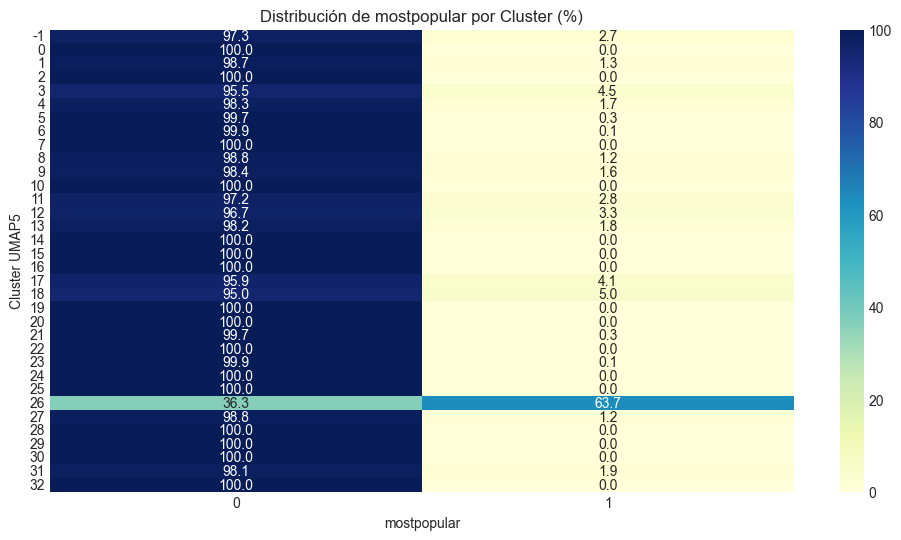

In [25]:
ct_mostpopular = pd.crosstab(df["cluster_umap5"], df["mostpopular"], normalize="index")*100

plt.figure(figsize=(12,6))
sns.heatmap(ct_mostpopular, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Distribución de mostpopular por Cluster (%)")
plt.xlabel("mostpopular")
plt.ylabel("Cluster UMAP5")
plt.yticks(ticks=np.arange(len(ct_mostpopular.index))+0.5, labels=ct_mostpopular.index, rotation=0)

plt.show()

### 2.2.4. Correlacion de variables meta con variables categóricas

In [26]:
def chi_square_categoricas(df, cat_cols, target_col):
    resultados = []
    for col in cat_cols:
        # Tabla de contingencia
        tabla = pd.crosstab(df[col], df[target_col])
        chi2, p, dof, ex = chi2_contingency(tabla)
        resultados.append({
            "Variable": col,
            "Chi2": chi2,
            "p-value": p,
            "Significativo (p<0.05)": p < 0.05
        })
    res = pd.DataFrame(resultados).sort_values("p-value")
    print(f"\n📊 Resultado Chi²: {target_col}\n")
    display(res)
    return res

In [27]:
df['views_quartile'] = pd.qcut(df['views'], q=4, labels=['Q1','Q2','Q3','Q4'])
res_views = chi_square_categoricas(df, cat_cols, 'views_quartile')


📊 Resultado Chi²: views_quartile



Variable         Chi2        p-value  Significativo (p<0.05)
4        mostpopular  2053.914054   0.000000e+00                    True
3      category_name  1569.010946  6.465434e-302                    True
5  target_engagement   362.382097   3.107738e-78                    True
1   licensed_content   111.429154   5.404461e-24                    True
0         definition    41.838101   4.342395e-09                    True
2        has_caption    10.005383   1.852043e-02                    True

In [28]:
res_eng = chi_square_categoricas(df, cat_cols, 'target_engagement')


📊 Resultado Chi²: target_engagement



Variable          Chi2       p-value  Significativo (p<0.05)
5  target_engagement  17819.667664  0.000000e+00                    True
3      category_name    442.328448  1.487455e-85                    True
1   licensed_content     74.955288  4.814959e-18                    True
2        has_caption     10.978617  9.216921e-04                    True
4        mostpopular      9.732672  1.810212e-03                    True
0         definition      1.905117  1.675067e-01                   False

In [29]:
res_pop = chi_square_categoricas(df, cat_cols, 'mostpopular')


📊 Resultado Chi²: mostpopular



Variable          Chi2       p-value  Significativo (p<0.05)
3      category_name   6761.922587  0.000000e+00                    True
4        mostpopular  17800.632401  0.000000e+00                    True
2        has_caption    188.045737  8.490158e-43                    True
1   licensed_content    105.313003  1.042895e-24                    True
5  target_engagement      9.732672  1.810212e-03                    True
0         definition      5.219496  2.233502e-02                    True

In [30]:
def plot_categoricas_vs_target(df, cat_cols, target_col):
    for col in cat_cols:
        plt.figure(figsize=(6,4))
        prop = pd.crosstab(df[col], df[target_col], normalize='index')
        
        ax = prop.plot(
            kind='bar', stacked=True,
            figsize=(6,4)
        )
        
        plt.title(f"{col} vs {target_col}")
        plt.xlabel(col)
        plt.ylabel("Proporción dentro de categoría")
        
        # Mover leyenda fuera del gráfico (derecha)
        plt.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.tight_layout()
        plt.show()

<Figure size 600x400 with 0 Axes>

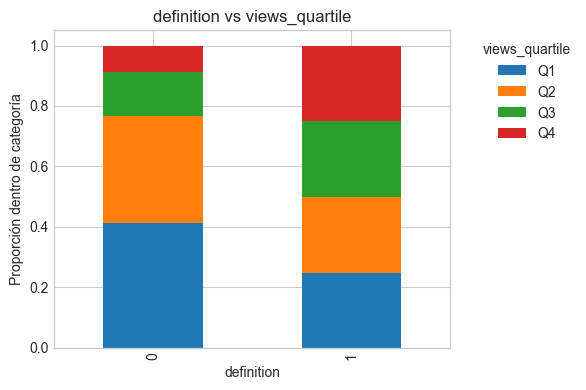

<Figure size 600x400 with 0 Axes>

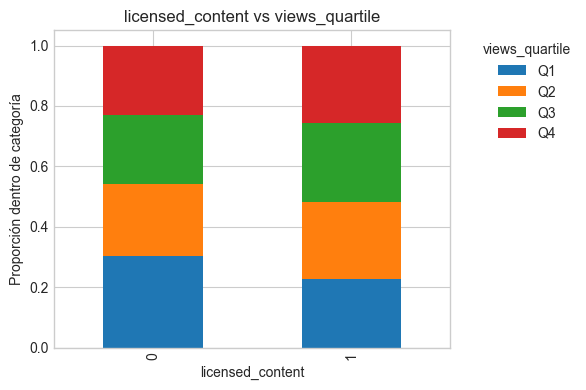

<Figure size 600x400 with 0 Axes>

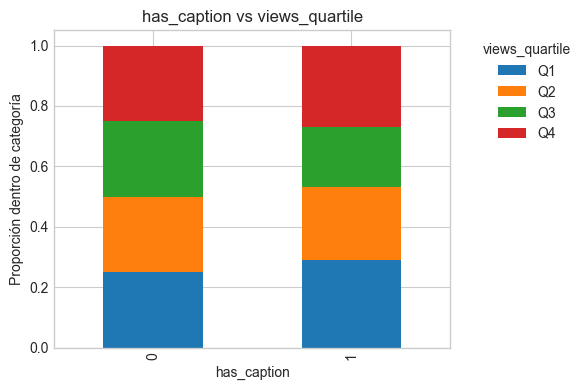

<Figure size 600x400 with 0 Axes>

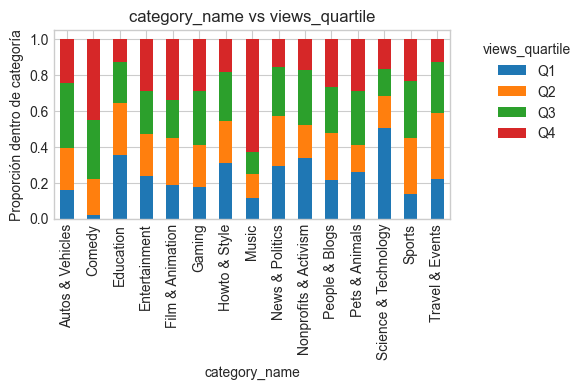

<Figure size 600x400 with 0 Axes>

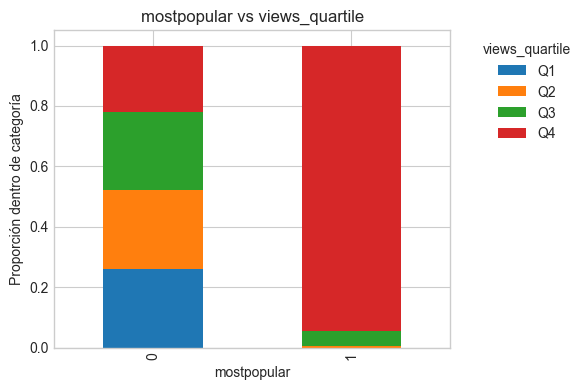

<Figure size 600x400 with 0 Axes>

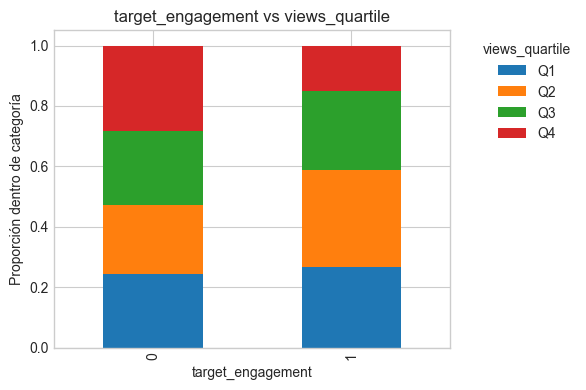

<Figure size 600x400 with 0 Axes>

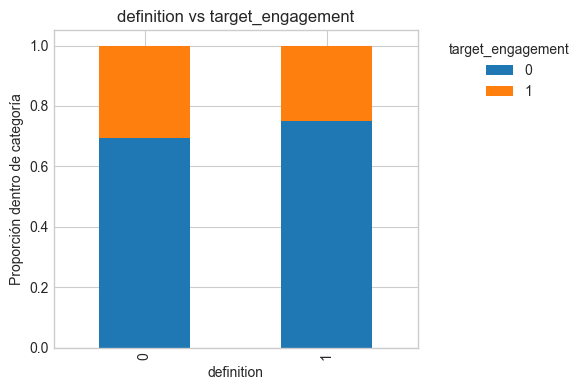

<Figure size 600x400 with 0 Axes>

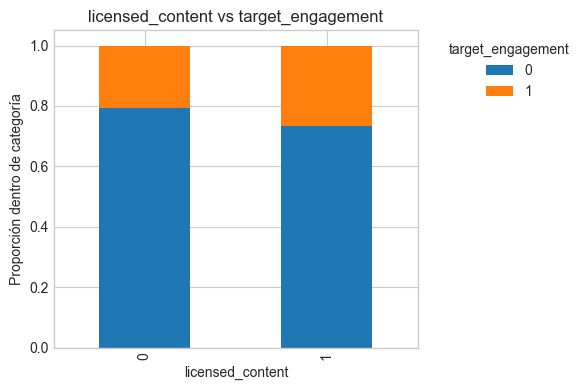

<Figure size 600x400 with 0 Axes>

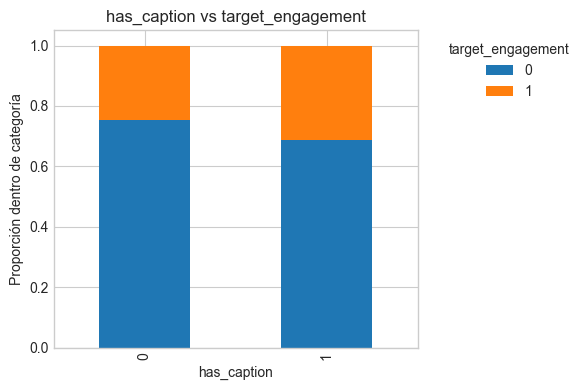

<Figure size 600x400 with 0 Axes>

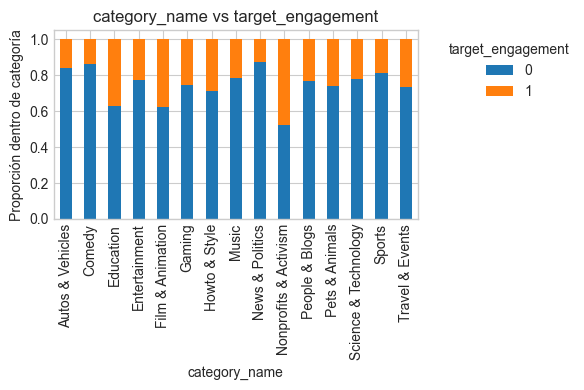

<Figure size 600x400 with 0 Axes>

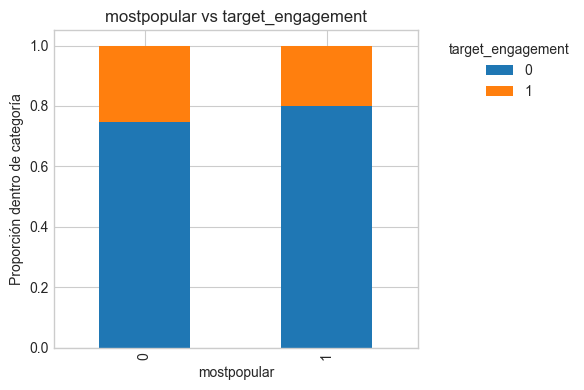

<Figure size 600x400 with 0 Axes>

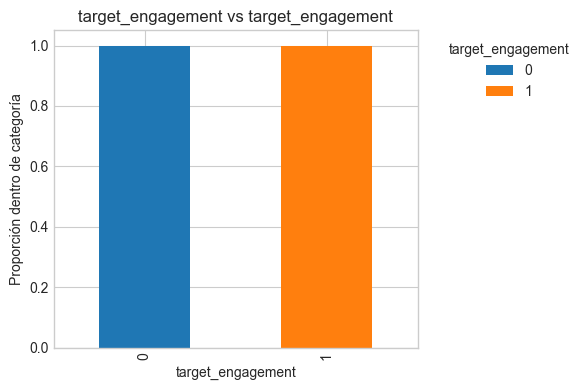

<Figure size 600x400 with 0 Axes>

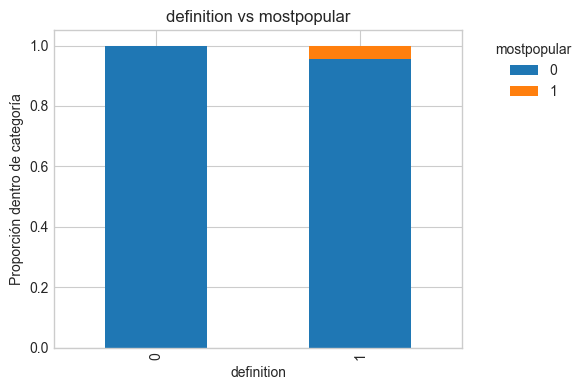

<Figure size 600x400 with 0 Axes>

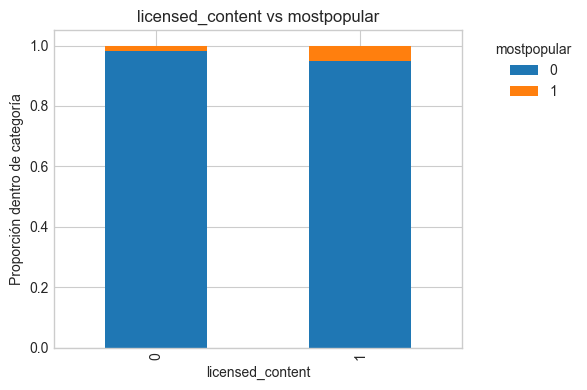

<Figure size 600x400 with 0 Axes>

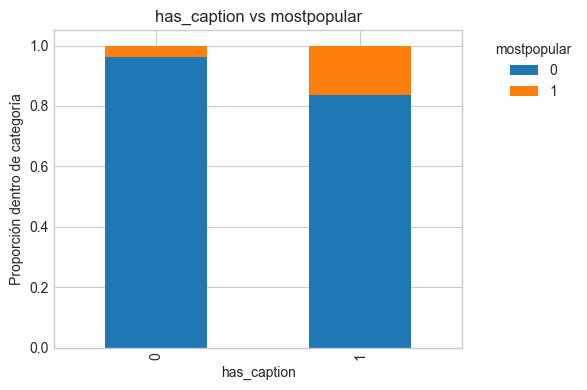

<Figure size 600x400 with 0 Axes>

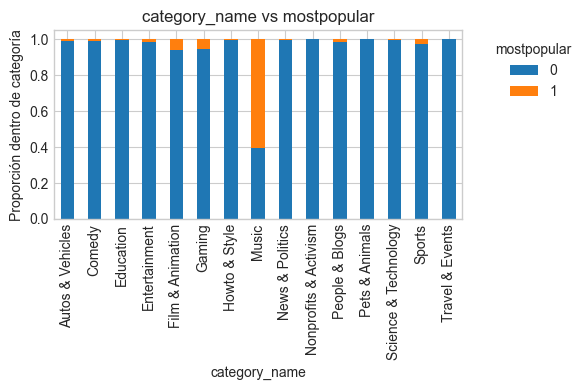

<Figure size 600x400 with 0 Axes>

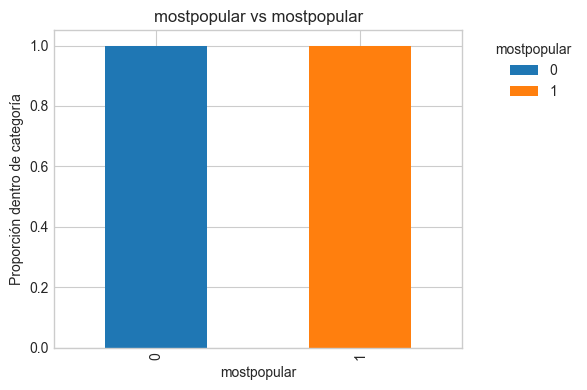

<Figure size 600x400 with 0 Axes>

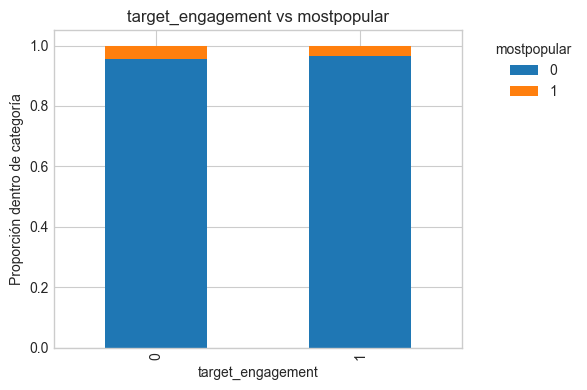

In [31]:
plot_categoricas_vs_target(df, cat_cols, 'views_quartile')
plot_categoricas_vs_target(df, cat_cols, 'target_engagement')
plot_categoricas_vs_target(df, cat_cols, 'mostpopular')

### Conclusiones del EDA

A partir del análisis exploratorio de los vídeos se identifican varias características relevantes:

#### 1. Distribución de variables y outliers
- Las métricas numéricas presentan **valores muy dispersos**, incluso en escala logarítmica (`log1p`), evidenciando que **unos pocos vídeos concentran la mayoría de views y likes**.

- Esta dispersión refuerza la necesidad de aplicar **normalización y manejo de outliers** antes del modelado predictivo.

<img src="IMAGENES/BOXPLOT_LOG_FR.png" alt="UMAP" width="300">

#### 2. Correlaciones y selección de variables
- Se detecta una **alta correlación (97%)** entre `engagement_rate` y `likes_per_view`, ambas derivadas de métricas nativas de YouTube.
- Para optimizar el modelo y evitar redundancia, se utilizarán únicamente variables **nativas**, obtenidas directamente de la interacción de usuarios:
  - `likes`, `comments`, `views`, `channel_video_count`, `subscriber_count`, `channel_views`, `channel_age_days`.

 <img src="IMAGENES/HEATMAP_COR_VAR_NUM.png" alt="UMAP" width="300">

- Todas las variables derivadas de estas métricas serán filtradas.
- Dada la fuerte correlación entre `subscriber_count` y `channel_views`, se creó una **variable derivada** a partir de su cociente.
- La variable `definition` se elimina en los modelos cuyo target es `target_engagement`, debido a su **escasa correlación**.

 <img src="IMAGENES/HEATMAP_COR_VAR_CAT.png" alt="UMAP" width="300">

#### 3. Relaciones categóricas y semánticas
- Se observan **clusters semánticos** en el espacio reducido UMAP, agrupando vídeos según similitud textual (`title`, `description`, `tags`).
- Se identifican clusters densos y ruido, información que será cruzada con métricas de engagement y categorías temáticas en la fase de modelado.
- Destaca la relación entre `mostpopular` y la categoría `Music`, indicando un patrón de alto engagement que será explorado con los modelos predictivos.

<div style="display: flex; align-items: center; gap: 20px;">
    <img src="IMAGENES/CLUSTERS_COLOREADO.png" alt="UMAP 1" width="500">
    <img src="IMAGENES/CLUSTER_26_LETRAS.png" alt="UMAP 1" width="300">
    <img src="IMAGENES/CLUSTERS_MOSTPOPULAR.png" alt="Heatmap 1" width="300">
</div>

#### 4. Implicaciones para el modelado
- El EDA permite preparar los datos para la construcción de **modelos predictivos**, definiendo variables relevantes, filtrando derivadas y manejando outliers.
- Los insights semánticos servirán para incluir **información de clusters y relaciones textuales**, optimizando la predicción de `target_engagement` y `mostpopular`.

